In [127]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import math
import statistics

import numpy as np 
from scipy.stats import t

np.set_printoptions(precision=3, suppress=True)
from matplotlib.gridspec import GridSpec

In [2]:
device = [1, 2, 3, 4, 5, 6, 7, 8]

In [3]:
selection_type =  ['Single-try', 'Single-pass', 'Two-pass', 'Affinity-only']
selection_type_data =  ['Single-try', 'Single-pass', 'Two-pass', 'Affinity-only', 'Data-reuse', 'No-Mig']
New_Colors = ['teal','darkgreen','darkred','navy', 'black']


In [4]:

skew_sparse_GEMM_gflops_NoMig        = [71.631449, 73.953181, 123.836501, 175.337443, 219.097254, 276.235186, 299.818384, 232.865471]
skew_sparse_GEMM_gflops_Mig_chunk_1  = [72.730796, 130.896802, 193.558134, 198.576083, 272.110046, 319.120137, 337.953093, 245.226618]

In [5]:
#No-Mig

sparse_GEMM_gflops_NoMig = [78.390170, 94.514309, 156.404213, 201.507496, 213.717272, 266.753832, 276.343182, 221.003573]


In [6]:
#No-Mig with completion delegation

#sparse_GEMM_gflops_NoMig_compl_del = [94.168474, 153.744696, 224.347564, 226.891591, 279.404243, 280.787628, 324.452214, 235.838286]

sparse_GEMM_gflops_NoMig_compl_del = [90.481300, 96.064217, 157.329105, 229.990664, 265.573533, 324.925522, 329.834348, 338.242770]

In [7]:
# Mig

sparse_GEMM_gflops_Mig = [91.408421, 133.481430, 211.491832, 232.551881, 249.489873, 300.877953, 290.271085, 241.875460]


In [8]:
#Mig with completion delegation

sparse_GEMM_gflops_Mig_compl_del = [93.017752, 153.415029, 231.151657, 245.822365, 333.874452, 340.052401, 374.468933, 359.549822]


In [9]:
#Mig with completion and migration delegation

sparse_GEMM_gflops_Mig_compl_del_mig_del = [91.390223, 142.084341, 212.775112, 284.951979, 330.535656, 314.133703, 346.195988, 331.573913]


In [10]:
# speedup with respect to MIG with no completion delegation
speedup_NoMig_compl_del_wrt_NoMig = [a/b for a,b in zip(sparse_GEMM_gflops_NoMig_compl_del, sparse_GEMM_gflops_NoMig)]

speedup_Mig_wrt_NoMig = [a/b for a,b in zip(sparse_GEMM_gflops_Mig, sparse_GEMM_gflops_NoMig)]

speedup_Mig_compl_del_wrt_NoMig = [a/b for a,b in zip(sparse_GEMM_gflops_Mig_compl_del, sparse_GEMM_gflops_NoMig)]

speedup_Mig_compl_del_mig_del_wrt_NoMig = [a/b for a,b in zip(sparse_GEMM_gflops_Mig_compl_del_mig_del, sparse_GEMM_gflops_NoMig)]

In [11]:
# speedup with respect to MIG with completion delegation

speedup_Mig_compl_del_wrt_NoMig_compl_del = [a/b for a,b in zip(sparse_GEMM_gflops_Mig_compl_del, sparse_GEMM_gflops_NoMig_compl_del)]

speedup_Mig_compl_del_mig_del_wrt_NoMig_compl_del = [a/b for a,b in zip(sparse_GEMM_gflops_Mig_compl_del_mig_del, sparse_GEMM_gflops_NoMig_compl_del)]

In [12]:
sparse_GEMM_data_new = {
                    'device': device,
                    'sparse_GEMM_gflops_NoMig':sparse_GEMM_gflops_NoMig,
                    'sparse_GEMM_gflops_NoMig_compl_del':sparse_GEMM_gflops_NoMig_compl_del,
                    'sparse_GEMM_gflops_Mig': sparse_GEMM_gflops_Mig,
                    'sparse_GEMM_gflops_Mig_compl_del': sparse_GEMM_gflops_Mig_compl_del,
                    'sparse_GEMM_gflops_Mig_compl_del_mig_del':sparse_GEMM_gflops_Mig_compl_del_mig_del,
                    'speedup_NoMig_compl_del_wrt_NoMig':speedup_NoMig_compl_del_wrt_NoMig,
                    'speedup_Mig_wrt_NoMig':speedup_Mig_wrt_NoMig,
                    'speedup_Mig_compl_del_wrt_NoMig':speedup_Mig_compl_del_wrt_NoMig,
                    'speedup_Mig_compl_del_mig_del_wrt_NoMig':speedup_Mig_compl_del_mig_del_wrt_NoMig,
                    'speedup_Mig_compl_del_wrt_NoMig_compl_del': speedup_Mig_compl_del_wrt_NoMig_compl_del,
                    'speedup_Mig_compl_del_mig_del_wrt_NoMig_compl_del':speedup_Mig_compl_del_mig_del_wrt_NoMig_compl_del
                   
                   }

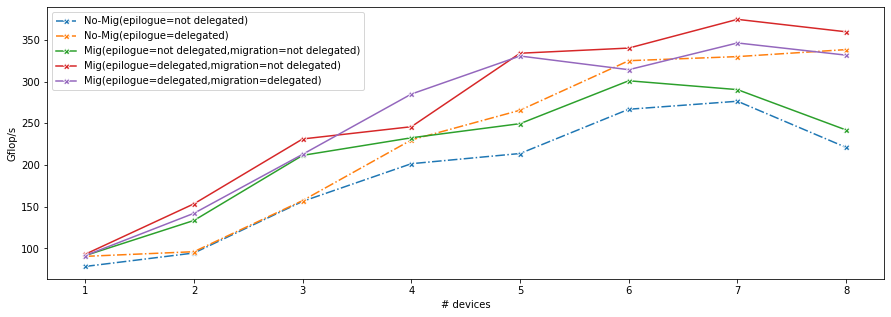

In [13]:
fig,ax = plt.subplots( figsize=(15, 5))


boxplot = sns.lineplot(data=sparse_GEMM_data_new, x="device", y="sparse_GEMM_gflops_NoMig", ax=ax, marker="X", label='No-Mig(epilogue=not delegated)', linestyle='-.')

boxplot = sns.lineplot(data=sparse_GEMM_data_new, x="device", y="sparse_GEMM_gflops_NoMig_compl_del", marker="X", ax=ax, label='No-Mig(epilogue=delegated)', linestyle='-.')

boxplot = sns.lineplot(data=sparse_GEMM_data_new, x="device", y="sparse_GEMM_gflops_Mig", marker="X", ax=ax, label='Mig(epilogue=not delegated,migration=not delegated)')

boxplot = sns.lineplot(data=sparse_GEMM_data_new, x="device", y="sparse_GEMM_gflops_Mig_compl_del", marker="X", ax=ax, label='Mig(epilogue=delegated,migration=not delegated)')

boxplot = sns.lineplot(data=sparse_GEMM_data_new, x="device", y="sparse_GEMM_gflops_Mig_compl_del_mig_del", marker="X", ax=ax, label='Mig(epilogue=delegated,migration=delegated)')


#ax.set_xticklabels(['All tasks'])
ax.set_xlabel('# devices')
ax.set_ylabel('Gflop/s')
#ax.set_title('SPARSE GEMM (M=20000, N=800000, K=20000, m=n=k=100, selection=single-pass, chunk=1)')


plt.savefig('SPARSE_GEMM_delagation_gflops.jpeg', dpi=300)


In [14]:
device = [1, 2, 3, 4, 5, 6, 7, 8]

sparse_GEMM_gflops_NoMig_min = [78.369548, 79.006139, 138.16195,   185.058955, 234.950544, 230.143469, 231.234735, 222.369834]
sparse_GEMM_gflops_NoMig_max = [92.54485,  94.667888, 159.362428,  235.927368, 297.367079, 322.126292, 336.722495, 320.653993]
sparse_GEMM_gflops_NoMig_avg = [87.91717,  91.612945, 154.3190997, 215.840499, 263.153500, 277.145535, 273.345186, 263.296506]


sparse_GEMM_gflops_NoMig_coml_del_min = [70.111676,  81.061932, 142.186539,  168.633606,  215.388356,  198.887829, 200.970181, 241.218456]
sparse_GEMM_gflops_NoMig_coml_del_max = [95.546776,  96.268092, 158.801746,  237.682819,  306.44422,   333.843842, 331.806227, 355.666336]
sparse_GEMM_gflops_NoMig_coml_del_avg = [83.3668557, 93.116839, 154.1781002, 208.0643317, 266.6633124, 268.3845238, 284.75654, 295.325031]

sparse_GEMM_gflops_Mig_min = [80.385587, 125.45845, 210.247415, 192.818949, 223.113075, 224.257027, 223.777859, 230.176999]
sparse_GEMM_gflops_Mig_max = [94.799024, 137.0738 , 218.534907, 282.955744, 314.102225, 358.186556, 308.146343, 355.79107]
sparse_GEMM_gflops_Mig_avg = [89.417865, 134.11057, 215.125804, 240.783806, 275.073944, 287.846896, 262.217039, 295.100957]

sparse_GEMM_gflops_Mig_coml_del_mig_del_min = [80.622167, 213.879873064, 188.081659, 189.384271, 208.99826, 264.705208, 245.70928, 334.634589]
sparse_GEMM_gflops_Mig_coml_del_mig_del_max = [95.116753, 223.383265041, 233.818055, 260.248469, 346.23395, 367.176218, 387.11639, 381.440492]
sparse_GEMM_gflops_Mig_coml_del_mig_del_avg = [89.990095, 216.469731077, 216.907354, 229.064260, 297.75828, 334.490656, 304.65414, 360.5608894]


speedup = [a/b for a,b in zip(sparse_GEMM_gflops_Mig_coml_del_mig_del_avg, sparse_GEMM_gflops_NoMig_avg)]




In [15]:
sparse_GEMM_nbmig_Mig_coml_del_mig_del_min = [0, 17984.0, 10806.0, 8762.0, 6811.0, 5802.0, 5546.0, 4582.0]
sparse_GEMM_nbmig_Mig_coml_del_mig_del_max = [0, 19306.0, 11808.0, 9489.0, 8820.0, 6882.0, 7524.0, 5760.0]
sparse_GEMM_nbmig_Mig_coml_del_mig_del_avg = [0, 18771.8, 11263.0, 9172.4, 7614.2, 6370.5, 6510.8, 4927.0]

sparse_GEMM_nbmig_Mig_compl_delegate_min = [0, 16620.0, 11219.0, 8138.0, 6616.0, 5404.0, 5045.0, 4451.0]
sparse_GEMM_nbmig_Mig_compl_delegate_max = [0, 17528.0, 11654.0, 9045.0, 8381.0, 6702.0, 6843.0, 5391.0]
sparse_GEMM_nbmig_Mig_compl_delegate_avg = [0, 16897.3, 11395.5, 8732.1, 7261.9, 6098.8, 5706.6, 5028.5]



In [16]:
sparse_GEMM_data_range = {
                    'device': device,
                    'sparse_GEMM_gflops_NoMig_min':sparse_GEMM_gflops_NoMig_min,
                    'sparse_GEMM_gflops_NoMig_max':sparse_GEMM_gflops_NoMig_max,
                    'sparse_GEMM_gflops_NoMig_avg':sparse_GEMM_gflops_NoMig_avg, 
    
                    'sparse_GEMM_gflops_NoMig_coml_del_min':sparse_GEMM_gflops_NoMig_coml_del_min,
                    'sparse_GEMM_gflops_NoMig_coml_del_max':sparse_GEMM_gflops_NoMig_coml_del_max,
                    'sparse_GEMM_gflops_NoMig_coml_del_avg':sparse_GEMM_gflops_NoMig_coml_del_avg,
                    
                    'sparse_GEMM_gflops_Mig_min':sparse_GEMM_gflops_Mig_min,
                    'sparse_GEMM_gflops_Mig_max':sparse_GEMM_gflops_Mig_max,
                    'sparse_GEMM_gflops_Mig_avg':sparse_GEMM_gflops_Mig_avg,
    
                    'sparse_GEMM_gflops_Mig_coml_del_mig_del_min': sparse_GEMM_gflops_Mig_coml_del_mig_del_min,
                    'sparse_GEMM_gflops_Mig_coml_del_mig_del_max': sparse_GEMM_gflops_Mig_coml_del_mig_del_max,
                    'sparse_GEMM_gflops_Mig_coml_del_mig_del_avg': sparse_GEMM_gflops_Mig_coml_del_mig_del_avg,
    
                    'speedup': speedup,
    
                    'sparse_GEMM_nbmig_Mig_coml_del_mig_del_min':sparse_GEMM_nbmig_Mig_coml_del_mig_del_min,
                    'sparse_GEMM_nbmig_Mig_coml_del_mig_del_max':sparse_GEMM_nbmig_Mig_coml_del_mig_del_max,
                    'sparse_GEMM_nbmig_Mig_coml_del_mig_del_avg':sparse_GEMM_nbmig_Mig_coml_del_mig_del_avg,
    
                    'sparse_GEMM_nbmig_Mig_compl_delegate_min':sparse_GEMM_nbmig_Mig_compl_delegate_min,
                    'sparse_GEMM_nbmig_Mig_compl_delegate_max':sparse_GEMM_nbmig_Mig_compl_delegate_max,
                    'sparse_GEMM_nbmig_Mig_compl_delegate_avg':sparse_GEMM_nbmig_Mig_compl_delegate_avg
    
    
                   
                   }

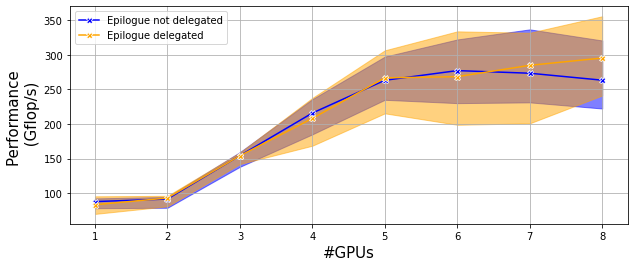

In [17]:
fig,ax = plt.subplots( figsize=(10, 4))


boxplot = sns.lineplot(data=sparse_GEMM_data_range, x="device", y="sparse_GEMM_gflops_NoMig_avg", ax=ax, marker="X", label='Epilogue not delegated', linestyle='-', color = 'blue')
ax.fill_between(device, sparse_GEMM_data_range['sparse_GEMM_gflops_NoMig_min'], sparse_GEMM_data_range['sparse_GEMM_gflops_NoMig_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_data_range, x="device", y="sparse_GEMM_gflops_NoMig_coml_del_avg", ax=ax, marker="X", label='Epilogue delegated', linestyle='-', color = 'orange')
ax.fill_between(device, sparse_GEMM_data_range['sparse_GEMM_gflops_NoMig_coml_del_min'], sparse_GEMM_data_range['sparse_GEMM_gflops_NoMig_coml_del_max'], color = 'orange', alpha = 0.5)



ax.set_xlabel('#GPUs', fontsize=15)
ax.set_ylabel('Performance \n (Gflop/s)', fontsize=15)
#ax.set_title('SPARSE GEMM (M=20000, N=800000, K=20000, m=n=k=100, selection=single-pass, chunk=1)')
#ax.set_title('Without task migration')

plt.legend(loc='upper left')
ax.grid()
# Set the axes title font size
#plt.rc('axes', titlesize=2)

plt.savefig('SPARSE_GEMM_gflops_range_nomig.jpeg', dpi=300)


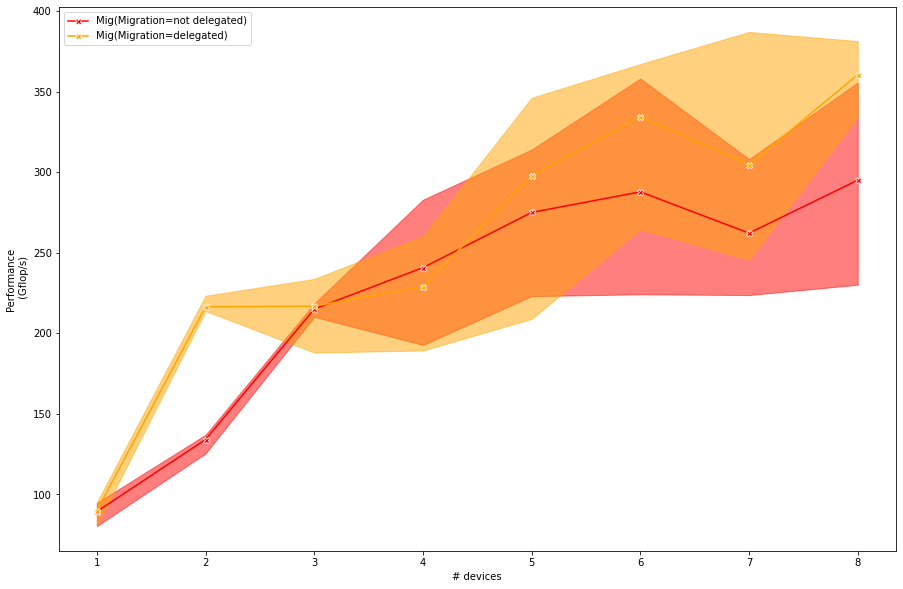

In [18]:
fig,ax = plt.subplots( figsize=(15, 10))


boxplot = sns.lineplot(data=sparse_GEMM_data_range, x="device", y="sparse_GEMM_gflops_Mig_avg", ax=ax, marker="X", label='Mig(Migration=not delegated)', linestyle='-', color = 'red')
ax.fill_between(device, sparse_GEMM_data_range['sparse_GEMM_gflops_Mig_min'], sparse_GEMM_data_range['sparse_GEMM_gflops_Mig_max'], color = 'red', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_data_range, x="device", y="sparse_GEMM_gflops_Mig_coml_del_mig_del_avg", ax=ax, marker="X", label='Mig(Migration=delegated)', linestyle='-', color = 'orange')
ax.fill_between(device, sparse_GEMM_data_range['sparse_GEMM_gflops_Mig_coml_del_mig_del_min'], sparse_GEMM_data_range['sparse_GEMM_gflops_Mig_coml_del_mig_del_max'], color = 'orange', alpha = 0.5)


ax.set_xlabel('# devices')
ax.set_ylabel('Performance \n (Gflop/s)')
#ax.set_title('SPARSE GEMM (M=20000, N=800000, K=20000, m=n=k=100, selection=single-pass, chunk=1)')

plt.legend(loc='upper left')

#plt.savefig('SPARSE_GEMM_gflops_range.jpeg', dpi=300)


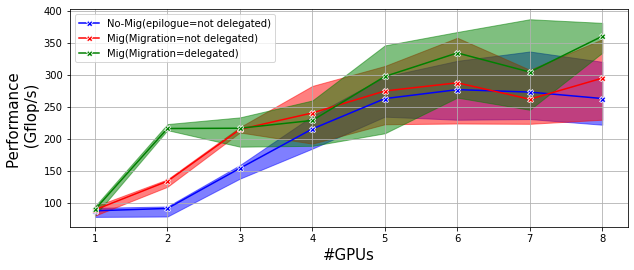

In [19]:
fig,ax = plt.subplots( figsize=(10, 4))

boxplot = sns.lineplot(data=sparse_GEMM_data_range, x="device", y="sparse_GEMM_gflops_NoMig_avg", ax=ax, marker="X", label='No-Mig(epilogue=not delegated)', linestyle='-', color = 'blue')
ax.fill_between(device, sparse_GEMM_data_range['sparse_GEMM_gflops_NoMig_min'], sparse_GEMM_data_range['sparse_GEMM_gflops_NoMig_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_data_range, x="device", y="sparse_GEMM_gflops_Mig_avg", ax=ax, marker="X", label='Mig(Migration=not delegated)', linestyle='-', color = 'red')
ax.fill_between(device, sparse_GEMM_data_range['sparse_GEMM_gflops_Mig_min'], sparse_GEMM_data_range['sparse_GEMM_gflops_Mig_max'], color = 'red', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_data_range, x="device", y="sparse_GEMM_gflops_Mig_coml_del_mig_del_avg", ax=ax, marker="X", label='Mig(Migration=delegated)', linestyle='-', color = 'green')
ax.fill_between(device, sparse_GEMM_data_range['sparse_GEMM_gflops_Mig_coml_del_mig_del_min'], sparse_GEMM_data_range['sparse_GEMM_gflops_Mig_coml_del_mig_del_max'], color = 'green', alpha = 0.5)


ax.set_xlabel('#GPUs', fontsize=15)
ax.set_ylabel('Performance \n (Gflop/s)', fontsize=15)
#ax.set_title('SPARSE GEMM (M=20000, N=800000, K=20000, m=n=k=100, selection=single-pass, chunk=1)')
ax.grid()


plt.legend(loc='upper left')

plt.savefig('SPARSE_GEMM_gflops_range.jpeg', dpi=300)


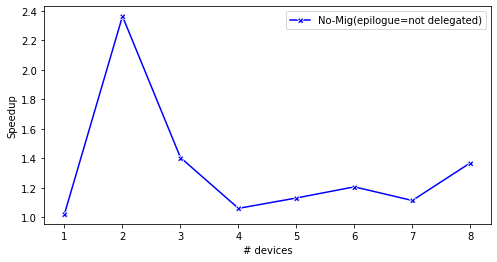

In [20]:
fig,ax = plt.subplots( figsize=(8, 4))


boxplot = sns.lineplot(data=sparse_GEMM_data_range, x="device", y="speedup", ax=ax, marker="X", label='No-Mig(epilogue=not delegated)', linestyle='-', color = 'blue')


ax.set_xlabel('# devices')
ax.set_ylabel('Speedup')
#ax.set_title('SPARSE GEMM (M=20000, N=800000, K=20000, m=n=k=100, selection=single-pass, chunk=1)')

plt.legend(loc='upper right')

plt.savefig('SPARSE_GEMM_speedup.jpeg', dpi=300)


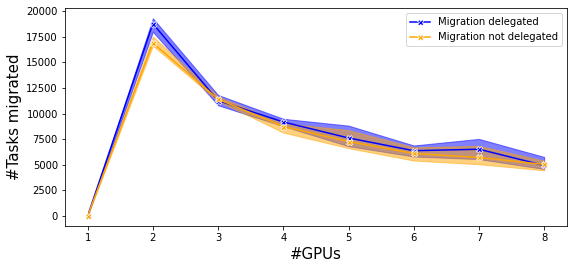

In [21]:


fig,ax = plt.subplots( figsize=(9, 4))


boxplot = sns.lineplot(data=sparse_GEMM_data_range, x="device", y="sparse_GEMM_nbmig_Mig_coml_del_mig_del_avg", ax=ax, marker="X", label='Migration delegated', linestyle='-', color = 'blue')
ax.fill_between(device, sparse_GEMM_data_range['sparse_GEMM_nbmig_Mig_coml_del_mig_del_min'], sparse_GEMM_data_range['sparse_GEMM_nbmig_Mig_coml_del_mig_del_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_data_range, x="device", y="sparse_GEMM_nbmig_Mig_compl_delegate_avg", ax=ax, marker="X", label='Migration not delegated', linestyle='-', color = 'orange')
ax.fill_between(device, sparse_GEMM_data_range['sparse_GEMM_nbmig_Mig_compl_delegate_min'], sparse_GEMM_data_range['sparse_GEMM_nbmig_Mig_compl_delegate_max'], color = 'orange', alpha = 0.5)



ax.set_xlabel('#GPUs', fontsize=15)
ax.set_ylabel('#Tasks migrated', fontsize=15)

plt.legend(loc='upper right')
plt.savefig('SPARSE_GEMM_nbmigrated.jpeg', dpi=300)


In [22]:
device_without_1_GPU = device[1:]
nbmig_Mig_coml_del_mig_del_avg = sparse_GEMM_data_range['sparse_GEMM_nbmig_Mig_coml_del_mig_del_avg'][1:]
nbmig_Mig_compl_delegate_avg = sparse_GEMM_data_range['sparse_GEMM_nbmig_Mig_compl_delegate_avg'][1:]

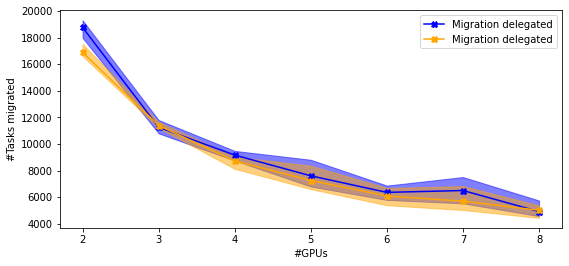

In [23]:


fig,ax = plt.subplots( figsize=(9, 4))


ax.plot(device_without_1_GPU, nbmig_Mig_coml_del_mig_del_avg, marker="X", color = 'blue', label='Migration delegated')
ax.fill_between(device_without_1_GPU, sparse_GEMM_data_range['sparse_GEMM_nbmig_Mig_coml_del_mig_del_min'][1:], sparse_GEMM_data_range['sparse_GEMM_nbmig_Mig_coml_del_mig_del_max'][1:], color = 'blue', alpha = 0.5)


#boxplot = sns.lineplot(data=sparse_GEMM_data_range, x="device", y="sparse_GEMM_nbmig_Mig_compl_delegate_avg", ax=ax, marker="X", label='Migration not delegated', linestyle='-', color = 'orange')
ax.plot(device_without_1_GPU, nbmig_Mig_compl_delegate_avg, marker="X", color = 'orange', label='Migration delegated')
ax.fill_between(device_without_1_GPU, sparse_GEMM_data_range['sparse_GEMM_nbmig_Mig_compl_delegate_min'][1:], sparse_GEMM_data_range['sparse_GEMM_nbmig_Mig_compl_delegate_max'][1:], color = 'orange', alpha = 0.5)



ax.set_xlabel('#GPUs')
ax.set_ylabel('#Tasks migrated')

plt.legend(loc='upper right')
plt.savefig('SPARSE_GEMM_nbmigrated.jpeg', dpi=300)


## Variation in migrated tasks wrt  runs

In [24]:
runs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sparse_GEMM_nbmig_runs = [8720, 8897, 7672, 8586, 7882, 7483, 8214, 8560, 8559, 8496]

sparse_GEMM_nb_mig_runs = {
                    'runs': runs,
                    'sparse_GEMM_nbmig_runs':sparse_GEMM_nbmig_runs
}

## Side-effects of migration

In [25]:
dev0_nomig = 39600
dev1_nomig = 796

dev0_mig = 23535
dev1_mig = 16861

migrated = 16065

side_effect = 16861 - 796 
print(side_effect)




16065


## Thrashing

In [26]:
device = [1, 2, 3, 4, 5, 6, 7, 8]

thrashing_nomig_min = [1020.0, 1324.0, 1737.0, 1045.0, 837.0 , 631.0, 464.0, 380.0]
thrashing_nomig_max = [1084.0, 1738.0, 2313.0, 1239.0, 1200.0, 779.0, 652.0, 558.0]
thrashing_nomig_avg = [1051.7, 1537.5, 2051.7, 1147.4, 1007.1, 708.1, 569.5, 443.0]

thrashing_mig_min = [1250.0, 1994.0, 1602.0, 1021.0, 1110.0, 940.0,   956.0,  0]
thrashing_mig_max = [2050.0, 2512.0, 2306.0, 1873.0, 1546.0, 1463.0, 1280.0, 1135.0]
thrashing_mig_avg = [1692.3, 2216.7, 2029.1, 1410.5, 1335.0, 1118.5, 1067.9, 623.1]


In [27]:
sparse_GEMM_thrashing = {
                    'device': device,
                    'thrashing_nomig_min':thrashing_nomig_min,
                    'thrashing_nomig_max':thrashing_nomig_max,
                    'thrashing_nomig_avg':thrashing_nomig_avg, 
    
                    'thrashing_mig_min':thrashing_mig_min,
                    'thrashing_mig_max':thrashing_mig_max,
                    'thrashing_mig_avg':thrashing_mig_avg
                   }

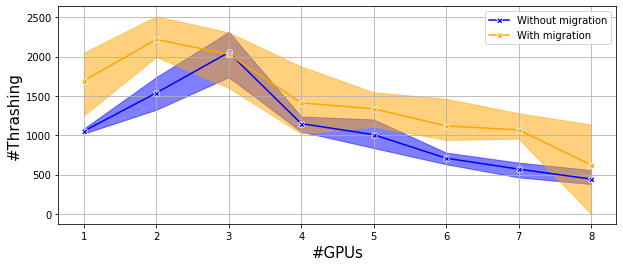

In [28]:
fig = plt.figure(figsize=(10, 4))
gs = GridSpec(nrows=1, ncols=1)

ax0 = fig.add_subplot(gs[0, 0])


boxplot = sns.lineplot(data=sparse_GEMM_thrashing, x="device", y="thrashing_nomig_avg", ax=ax0, marker="X", label='Without migration', linestyle='-', color = 'blue')
ax0.fill_between(device, sparse_GEMM_thrashing['thrashing_nomig_min'], sparse_GEMM_thrashing['thrashing_nomig_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_thrashing, x="device", y="thrashing_mig_avg", ax=ax0, marker="X", label='With migration', linestyle='-', color = 'orange')
ax0.fill_between(device, sparse_GEMM_thrashing['thrashing_mig_min'], sparse_GEMM_thrashing['thrashing_mig_max'], color = 'orange', alpha = 0.5)


ax0.set_xlabel('#GPUs', fontsize=15)
ax0.set_ylabel('#Thrashing', fontsize=15)

ax0.grid()


#plt.legend(loc='upper right')
plt.savefig('SPARSE_GEMM_thrashing_count.jpeg', dpi=300)

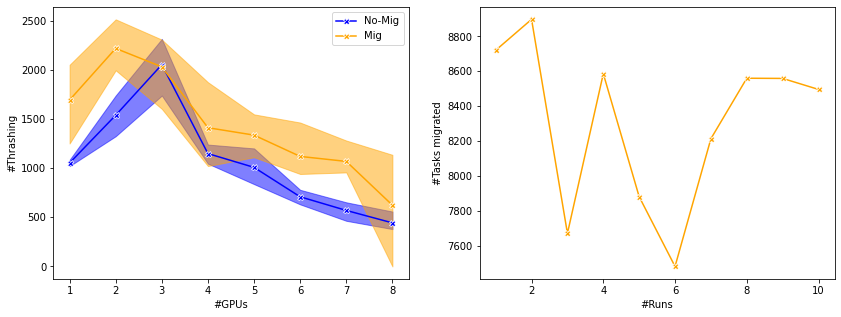

In [29]:
fig = plt.figure(figsize=(14, 5))
gs = GridSpec(nrows=1, ncols=2)

ax0 = fig.add_subplot(gs[0, 0])


boxplot = sns.lineplot(data=sparse_GEMM_thrashing, x="device", y="thrashing_nomig_avg", ax=ax0, marker="X", label='No-Mig', linestyle='-', color = 'blue')
ax0.fill_between(device, sparse_GEMM_thrashing['thrashing_nomig_min'], sparse_GEMM_thrashing['thrashing_nomig_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_thrashing, x="device", y="thrashing_mig_avg", ax=ax0, marker="X", label='Mig', linestyle='-', color = 'orange')
ax0.fill_between(device, sparse_GEMM_thrashing['thrashing_mig_min'], sparse_GEMM_thrashing['thrashing_mig_max'], color = 'orange', alpha = 0.5)


ax0.set_xlabel('#GPUs')
ax0.set_ylabel('#Thrashing')

ax1 = fig.add_subplot(gs[0, 1])

boxplot = sns.lineplot(data=sparse_GEMM_nb_mig_runs, x="runs", y="sparse_GEMM_nbmig_runs", ax=ax1, marker="X", label='Mig', linestyle='-', color = 'orange')
ax1.set_xlabel('#Runs')
ax1.set_ylabel('#Tasks migrated')
ax1.legend([],[], frameon=False)


#plt.legend(loc='upper right')
plt.savefig('SPARSE_GEMM_thrashing_count.jpeg', dpi=300)

## Selction policies

In [30]:
device = [1, 2, 3, 4, 5, 6, 7, 8]

#GFLOPS

single_try_gflops_Mig_min = [79.686764, 138.173292, 198.21464, 220.068069, 217.844821, 240.819254, 243.104773, 230.812433]
single_try_gflops_Mig_max = [94.149605, 141.025875, 206.80913, 275.032148, 339.99947 , 345.996059, 375.813692, 374.910353]
single_try_gflops_Mig_avg = [84.272560, 139.749796, 202.98769, 259.49213 , 287.802470, 299.813577, 311.472207, 302.7720155]

single_pass_gflops_Mig_min = [80.385587, 125.45845, 210.247415, 192.818949, 223.113075, 224.257027, 223.777859, 230.176999]
single_pass_gflops_Mig_max = [94.799024, 137.0738 , 218.534907, 282.955744, 314.102225, 358.186556, 308.146343, 355.79107]
single_pass_gflops_Mig_avg = [89.417865, 134.11057, 215.125804, 240.783806, 275.073944, 287.846896, 262.217039, 295.100957]

two_pass_gflops_Mig_min = [80.012329, 123.263964, 187.167256, 177.781308, 217.89706 , 262.345812, 222.491092, 232.557562]
two_pass_gflops_Mig_max = [93.912431, 139.405393, 215.01443 , 279.113204, 332.992511, 341.536517, 361.245416, 317.376451]
two_pass_gflops_Mig_avg = [87.582844, 136.670304, 208.449445, 230.418297, 277.958130, 303.074952, 291.979350, 271.0796959]

aff_only_gflops_Mig_min = [81.197539, 123.696008, 181.594522, 195.163954, 225.678531, 246.779493, 248.679175, 245.496596]
aff_only_gflops_Mig_max = [94.608515, 139.61041 , 217.940233, 282.135177, 337.340536, 351.088182, 351.281154, 331.901234]
aff_only_gflops_Mig_avg = [87.759031, 136.144715, 206.141079, 250.139561, 277.090371, 296.194208, 296.150724, 289.986167]

data_reuse_gflops_Mig_min = [76.699806, 135.579141, 205.977417, 189.128638, 228.60675 , 214.097511, 220.66889 , 239.501201]
data_reuse_gflops_Mig_max = [90.906775, 139.552483, 215.059431, 280.591337, 292.319124, 332.294058, 336.270914, 337.045424]
data_reuse_gflops_Mig_avg = [83.145796, 137.583728, 210.924969, 234.190352, 260.375625, 271.197346, 272.965248, 279.6863283]

#EVICTIONS

single_try_evictions_Mig_min = [42474.0, 47666.0, 39759.0, 37700.0, 34318.0, 17109.0, 11261.0, 6856.0]
single_try_evictions_Mig_max = [55513.0, 50637.0, 44755.0, 42958.0, 37863.0, 20794.0, 11560.0, 7111.0]
single_try_evictions_Mig_avg = [48484.9, 49829.8, 42909.7, 40040.5, 36031.1, 18176.2, 11381.8, 6964.1]

single_pass_evictions_Mig_min = [41688.0, 55091.0, 39590.0, 31545.0, 25711.0, 15336.0, 10593.0, 6356.0]
single_pass_evictions_Mig_max = [53824.0, 58545.0, 43622.0, 36427.0, 30198.0, 15820.0, 10742.0, 6738.0]
single_pass_evictions_Mig_avg = [46365.5, 57350.0, 42347.9, 34195.0, 27352.5, 15535.1, 10663.1, 6490.4]
    
two_pass_evictions_Mig_min = [42066.0, 53512.0, 39566.0, 32810.0, 24496.0, 15435.0, 10609.0, 6305.0]
two_pass_evictions_Mig_max = [52877.0, 57272.0, 44577.0, 36024.0, 28531.0, 15661.0, 10797.0, 6985.0]
two_pass_evictions_Mig_avg = [45638.2, 55180.0, 41483.2, 34585.5, 26332.2, 15517.5, 10682.6, 6591.7]
    
aff_only_evictions_Mig_min = [40887.0, 53201.0, 39681.0, 31859.0, 24198.0, 15469.0, 10596.0, 6351.0]
aff_only_evictions_Mig_max = [48303.0, 56387.0, 45005.0, 37268.0, 32028.0, 15671.0, 10784.0, 6773.0]
aff_only_evictions_Mig_avg = [43277.8, 54705.9, 42265.8, 34554.5, 26955.5, 15559.5, 10682.6, 6527.0]
    
data_reuse_evictions_Mig_min = [42219.0, 55103.0, 39598.0, 31753.0, 25302.0, 15388.0, 10652.0, 6419.0]
data_reuse_evictions_Mig_max = [48144.0, 58525.0, 45011.0, 39227.0, 28923.0, 15911.0, 10837.0, 6899.0]
data_reuse_evictions_Mig_avg = [44856.8, 56396.4, 42486.3, 34242.6, 27141.4, 15528.0, 10725.2, 6632.7]

nomig_evictions_min = [50241.0, 49801.0, 46271.0, 38363.0, 31570.0, 15652.0, 10540.0, 5624.0]
nomig_evictions_max = [53124.0, 58560.0, 51117.0, 44394.0, 39690.0, 15919.0, 10572.0, 5627.0]
nomig_evictions_avg = [52202.0, 53443.5, 48633.1, 41119.9, 35516.0, 15776.8, 10558.9, 5626.4]

#STAGE-IN

single_try_stagein_Mig_min = [46835.0, 54456.0, 48500.0, 49769.0, 49254.0, 43561.0, 42312.0, 42361.0]
single_try_stagein_Mig_max = [58923.0, 57082.0, 52726.0, 53263.0, 51480.0, 44744.0, 42427.0, 42395.0]
single_try_stagein_Mig_avg = [52465.1, 56383.8, 51298.8, 51228.1, 50342.4, 43932.8, 42346.1, 42377.9]

single_pass_stagein_Mig_min = [46108.0, 60132.0, 50858.0, 47588.0, 45832.0, 42493.0, 42457.0, 42610.0]
single_pass_stagein_Mig_max = [57469.0, 63827.0, 54330.0, 50683.0, 48831.0, 42963.0, 42553.0, 42720.0]
single_pass_stagein_Mig_avg = [50497.9, 62497.2, 53094.3, 49122.1, 46984.7, 42697.4, 42502.5, 42643.1]

two_pass_stagein_Mig_min = [46428.0, 58705.0, 50531.0, 47721.0, 44913.0, 42613.0, 42473.0, 42599.0]
two_pass_stagein_Mig_max = [56078.0, 62367.0, 53974.0, 49806.0, 47722.0, 42828.0, 42649.0, 42742.0]
two_pass_stagein_Mig_avg = [49754.9, 60385.1, 52090.6, 48869.5, 46461.8, 42682.7, 42526.6, 42661.6]

aff_only_stagein_Mig_min = [45322.0, 58536.0, 50656.0, 47497.0, 45658.0, 42628.0, 42467.0, 42600.0]
aff_only_stagein_Mig_max = [52219.0, 61364.0, 53583.0, 50363.0, 48406.0, 42840.0, 42583.0, 42680.0]
aff_only_stagein_Mig_avg = [47575.2, 59869.6, 52210.4, 49204.3, 46952.4, 42726.9, 42514.1, 42635.6]

data_reuse_stagein_Mig_min = [46577.0, 60148.0, 50748.0, 47722.0, 45545.0, 42571.0, 42486.0, 42616.0]
data_reuse_stagein_Mig_max = [51881.0, 63804.0, 54896.0, 50994.0, 47693.0, 42839.0, 42597.0, 42789.0]
data_reuse_stagein_Mig_avg = [49044.4, 61715.9, 53038.6, 49202.6, 46820.5, 42673.6, 42531.6, 42691.5]

nomig_stagein_Mig_min = []
nomig_stagein_Mig_max = []
nomig_stagein_Mig_avg = []

#NB_DEALS

single_try_nbdeals_Mig_min = [0, 20534.0, 25349.0, 26640.0, 19957.0, 15558.0, 13055.0, 11741.0]
single_try_nbdeals_Mig_max = [0, 20699.0, 28157.0, 29030.0, 24216.0, 18101.0, 15803.0, 13843.0]
single_try_nbdeals_Mig_avg = [0, 20616.0, 27459.3, 27564.0, 22951.1, 16931.0, 14023.9, 12627.9]

single_pass_nbdeals_Mig_min = [0, 16490.0, 11363.0, 8403.0, 6971.0, 6319.0, 5755.0, 5410.0]
single_pass_nbdeals_Mig_max = [0, 17016.0, 12278.0, 9649.0, 8617.0, 7903.0, 7052.0, 6612.0]
single_pass_nbdeals_Mig_avg = [0, 16770.1, 11704.6, 9047.5, 7647.2, 7121.5, 6261.3, 5827.7]

two_pass_nbdeals_Mig_min = [0, 16758.0, 10953.0, 8213.0, 6998.0, 6300.0, 5773.0, 5334.0]
two_pass_nbdeals_Mig_max = [0, 17705.0, 11957.0, 9825.0, 8237.0, 7461.0, 7800.0, 7187.0]
two_pass_nbdeals_Mig_avg = [0, 17114.4, 11427.5, 9124.2, 7780.7, 6783.5, 6482.2, 6186.1]

aff_only_nbdeals_Mig_min = [0, 16866.0, 11202.0, 8081.0, 7206.0, 6118.0, 6191.0, 5248.0]
aff_only_nbdeals_Mig_max = [0, 17567.0, 12363.0, 9529.0, 8651.0, 7538.0, 6900.0, 6861.0]
aff_only_nbdeals_Mig_avg = [0, 17115.8, 11602.4, 8694.9, 7767.0, 6635.5, 6464.3, 5885.3]

data_reuse_nbdeals_Mig_min = [0, 16490.0, 11363.0, 8403.0, 6971.0, 6319.0, 5755.0, 5410.0]
data_reuse_nbdeals_Mig_max = [0, 17016.0, 12278.0, 9649.0, 8617.0, 7903.0, 7052.0, 6612.0]
data_reuse_nbdeals_Mig_avg = [0, 16770.1, 11704.6, 9047.5, 7647.2, 7121.5, 6261.3, 5827.7]

#SUCC_DEALS

single_try_succdeals_Mig_min = [0, 8953.0, 5482.0, 3969.0, 3607.0, 3322.0, 2899.0, 2577.0]
single_try_succdeals_Mig_max = [0, 9099.0, 5780.0, 4698.0, 4800.0, 4168.0, 3830.0, 3680.0]
single_try_succdeals_Mig_avg = [0, 9032.0, 5669.0, 4197.7, 4167.3, 3667.5, 3389.2, 3243.0]

single_pass_succdeals_Mig_min = [0, 16435.0, 10964.0, 8065.0, 6971.0, 5645.0, 4752.0, 4589.0]
single_pass_succdeals_Mig_max = [0, 16981.0, 11881.0, 9149.0, 8617.0, 7056.0, 6091.0, 5687.0]
single_pass_succdeals_Mig_avg = [0, 16712.1, 11307.6, 8644.8, 7647.2, 6295.3, 5340.5, 4917.8]

two_pass_succdeals_Mig_min = [0, 16705.0, 10727.0, 7866.0, 6594.0, 5616.0, 4981.0, 4502.0]
two_pass_succdeals_Mig_max = [0, 17664.0, 11610.0, 9320.0, 7698.0, 6639.0, 6680.0, 6130.0]
two_pass_succdeals_Mig_avg = [0, 17065.2, 11111.3, 8723.7, 7291.2, 5982.3, 5591.5, 5214.2]

aff_only_succdeals_Mig_min = [0, 16748.0, 10880.0, 7769.0, 6751.0, 5388.0, 5285.0, 4393.0]
aff_only_succdeals_Mig_max = [0, 17342.0, 11828.0, 9147.0, 7996.0, 6728.0, 6246.0, 5860.0]
aff_only_succdeals_Mig_avg = [0, 17003.5, 11249.0, 8326.6, 7271.4, 5820.2, 5610.6, 4949.3]

data_reuse_succdeals_Mig_min = [0, 16655.0, 10793.0, 8079.0, 6797.0, 5462.0, 5165.0, 4478.0]
data_reuse_succdeals_Mig_max = [0, 16872.0, 11427.0, 9398.0, 9157.0, 6918.0, 6510.0, 6121.0]
data_reuse_succdeals_Mig_avg = [0, 16754.5, 11137.9, 8733.6, 7884.9, 6151.6, 5762.7, 5306.6]








In [31]:
sparse_GEMM_selection = {
                    'device': device,
    
                    'single_try_gflops_Mig_min':single_try_gflops_Mig_min,
                    'single_try_gflops_Mig_max':single_try_gflops_Mig_max,
                    'single_try_gflops_Mig_avg':single_try_gflops_Mig_avg, 
    
                    'single_pass_gflops_Mig_min':single_pass_gflops_Mig_min,
                    'single_pass_gflops_Mig_max':single_pass_gflops_Mig_max,
                    'single_pass_gflops_Mig_avg':single_pass_gflops_Mig_avg,
    
                    'two_pass_gflops_Mig_min':two_pass_gflops_Mig_min,
                    'two_pass_gflops_Mig_max':two_pass_gflops_Mig_max,
                    'two_pass_gflops_Mig_avg':two_pass_gflops_Mig_avg,
    
                    'aff_only_gflops_Mig_min':aff_only_gflops_Mig_min,
                    'aff_only_gflops_Mig_max':aff_only_gflops_Mig_max,
                    'aff_only_gflops_Mig_avg':aff_only_gflops_Mig_avg,
    
                    'data_reuse_gflops_Mig_min':data_reuse_gflops_Mig_min,
                    'data_reuse_gflops_Mig_max':data_reuse_gflops_Mig_max,
                    'data_reuse_gflops_Mig_avg':data_reuse_gflops_Mig_avg,
    
                    'single_try_evictions_Mig_min':single_try_evictions_Mig_min,
                    'single_try_evictions_Mig_max':single_try_evictions_Mig_max,
                    'single_try_evictions_Mig_avg':single_try_evictions_Mig_avg,
    
                    'single_pass_evictions_Mig_min':single_pass_evictions_Mig_min,
                    'single_pass_evictions_Mig_max':single_pass_evictions_Mig_max,
                    'single_pass_evictions_Mig_avg':single_pass_evictions_Mig_avg,
    
                    'two_pass_evictions_Mig_min':two_pass_evictions_Mig_min,
                    'two_pass_evictions_Mig_max':two_pass_evictions_Mig_max,
                    'two_pass_evictions_Mig_avg':two_pass_evictions_Mig_avg,
    
                    'aff_only_evictions_Mig_min':aff_only_evictions_Mig_min,
                    'aff_only_evictions_Mig_max':aff_only_evictions_Mig_max,
                    'aff_only_evictions_Mig_avg':aff_only_evictions_Mig_avg,
    
                    'data_reuse_evictions_Mig_min':data_reuse_evictions_Mig_min,
                    'data_reuse_evictions_Mig_max':data_reuse_evictions_Mig_max,
                    'data_reuse_evictions_Mig_avg':data_reuse_evictions_Mig_avg,
                    
                    'nomig_evictions_min': nomig_evictions_min,
                    'nomig_evictions_max': nomig_evictions_max,
                    'nomig_evictions_avg': nomig_evictions_avg,
    
                    'single_try_stagein_Mig_min':single_try_stagein_Mig_min,
                    'single_try_stagein_Mig_max':single_try_stagein_Mig_max,
                    'single_try_stagein_Mig_avg':single_try_stagein_Mig_avg,
    
                    'single_pass_stagein_Mig_min':single_pass_stagein_Mig_min,
                    'single_pass_stagein_Mig_max':single_pass_stagein_Mig_max,
                    'single_pass_stagein_Mig_avg':single_pass_stagein_Mig_avg,
    
                    'two_pass_stagein_Mig_min':two_pass_stagein_Mig_min,
                    'two_pass_stagein_Mig_max':two_pass_stagein_Mig_max,
                    'two_pass_stagein_Mig_avg':two_pass_stagein_Mig_avg,
    
                    'aff_only_stagein_Mig_min':aff_only_stagein_Mig_min,
                    'aff_only_stagein_Mig_max':aff_only_stagein_Mig_max,
                    'aff_only_stagein_Mig_avg':aff_only_stagein_Mig_avg,
    
                    'data_reuse_stagein_Mig_min':data_reuse_stagein_Mig_min,
                    'data_reuse_stagein_Mig_max':data_reuse_stagein_Mig_max,
                    'data_reuse_stagein_Mig_avg':data_reuse_stagein_Mig_avg,
    
    
                    'single_try_nbdeals_Mig_min':single_try_nbdeals_Mig_min,
                    'single_try_nbdeals_Mig_max':single_try_nbdeals_Mig_max,
                    'single_try_nbdeals_Mig_avg':single_try_nbdeals_Mig_avg,
        
                    'single_pass_nbdeals_Mig_min':single_pass_nbdeals_Mig_min,
                    'single_pass_nbdeals_Mig_max':single_pass_nbdeals_Mig_max,
                    'single_pass_nbdeals_Mig_avg':single_pass_nbdeals_Mig_avg,
    
                    'two_pass_nbdeals_Mig_min':two_pass_nbdeals_Mig_min,
                    'two_pass_nbdeals_Mig_max':two_pass_nbdeals_Mig_max,
                    'two_pass_nbdeals_Mig_avg':two_pass_nbdeals_Mig_avg,
    
                    'aff_only_nbdeals_Mig_min':aff_only_nbdeals_Mig_min,
                    'aff_only_nbdeals_Mig_max':aff_only_nbdeals_Mig_max,
                    'aff_only_nbdeals_Mig_avg':aff_only_nbdeals_Mig_avg,
    
                    'data_reuse_nbdeals_Mig_min':data_reuse_nbdeals_Mig_min,
                    'data_reuse_nbdeals_Mig_max':data_reuse_nbdeals_Mig_max,
                    'data_reuse_nbdeals_Mig_avg':data_reuse_nbdeals_Mig_avg,
                    
                    'single_try_succdeals_Mig_min':single_try_succdeals_Mig_min,
                    'single_try_succdeals_Mig_max':single_try_succdeals_Mig_max,
                    'single_try_succdeals_Mig_avg':single_try_succdeals_Mig_avg,
    
                    'single_pass_succdeals_Mig_min':single_pass_succdeals_Mig_min,
                    'single_pass_succdeals_Mig_max':single_pass_succdeals_Mig_max,
                    'single_pass_succdeals_Mig_avg':single_pass_succdeals_Mig_avg,
    
                    'two_pass_succdeals_Mig_min':two_pass_succdeals_Mig_min,
                    'two_pass_succdeals_Mig_max':two_pass_succdeals_Mig_max,
                    'two_pass_succdeals_Mig_avg':two_pass_succdeals_Mig_avg,
    
                    'aff_only_succdeals_Mig_min':aff_only_succdeals_Mig_min,
                    'aff_only_succdeals_Mig_max':aff_only_succdeals_Mig_max,
                    'aff_only_succdeals_Mig_avg':aff_only_succdeals_Mig_avg,
    
                    'data_reuse_succdeals_Mig_min':data_reuse_succdeals_Mig_min,
                    'data_reuse_succdeals_Mig_max':data_reuse_succdeals_Mig_max,
                    'data_reuse_succdeals_Mig_avg':data_reuse_succdeals_Mig_avg,
                   
                   }


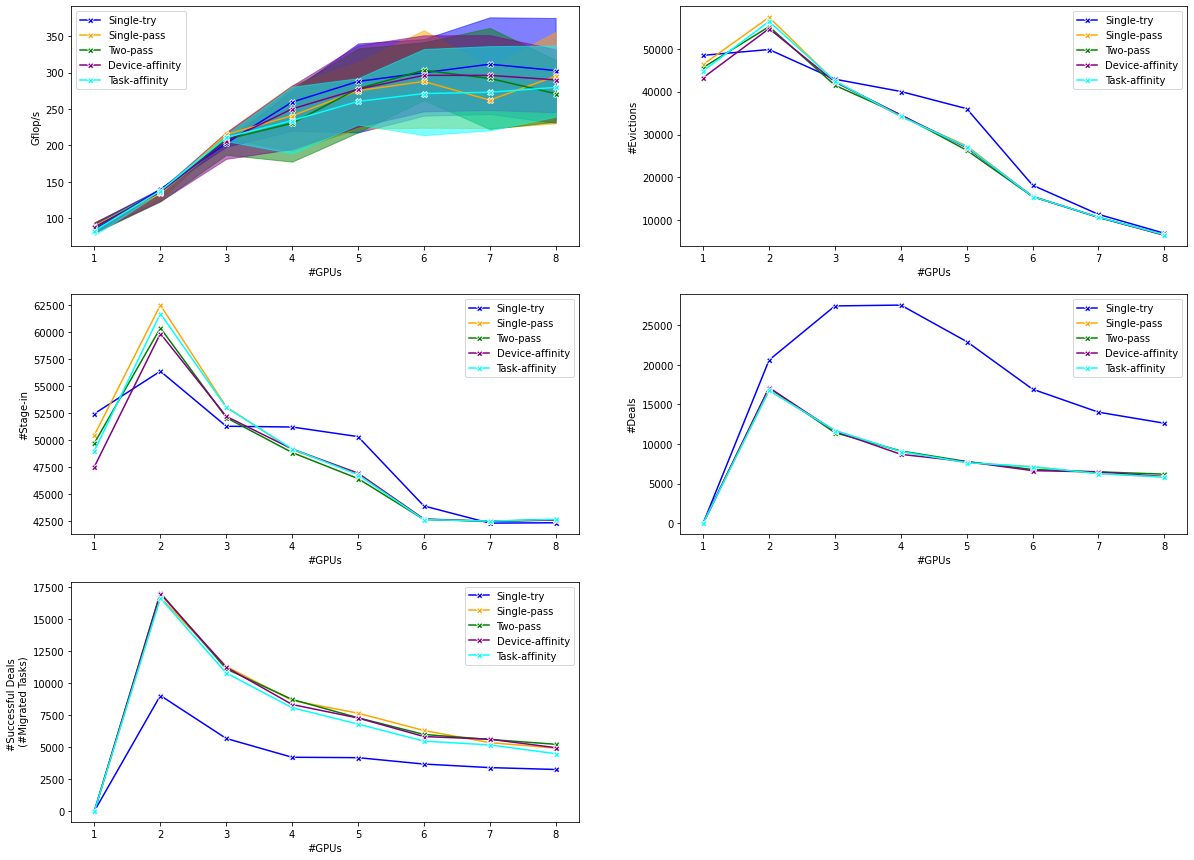

In [32]:
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(nrows=3, ncols=2)

ax0 = fig.add_subplot(gs[0, 0])


boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="single_try_gflops_Mig_avg", ax=ax0, marker="X", label='Single-try', linestyle='-', color = 'blue')
ax0.fill_between(device, sparse_GEMM_selection['single_try_gflops_Mig_min'], sparse_GEMM_selection['single_try_gflops_Mig_max'], color = 'blue', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="single_pass_gflops_Mig_avg", ax=ax0, marker="X", label='Single-pass', linestyle='-', color = 'orange')
ax0.fill_between(device, sparse_GEMM_selection['single_pass_gflops_Mig_min'], sparse_GEMM_selection['single_pass_gflops_Mig_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="two_pass_gflops_Mig_avg", ax=ax0, marker="X", label='Two-pass', linestyle='-', color = 'green')
ax0.fill_between(device, sparse_GEMM_selection['two_pass_gflops_Mig_min'], sparse_GEMM_selection['two_pass_gflops_Mig_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="aff_only_gflops_Mig_avg", ax=ax0, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
ax0.fill_between(device, sparse_GEMM_selection['aff_only_gflops_Mig_min'], sparse_GEMM_selection['aff_only_gflops_Mig_max'], color = 'purple', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="data_reuse_gflops_Mig_avg", ax=ax0, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
ax0.fill_between(device, sparse_GEMM_selection['data_reuse_gflops_Mig_min'], sparse_GEMM_selection['data_reuse_gflops_Mig_max'], color = 'cyan', alpha = 0.5)

ax0.set_xlabel('#GPUs')
ax0.set_ylabel('Gflop/s')

ax1 = fig.add_subplot(gs[0, 1])

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="single_try_evictions_Mig_avg", ax=ax1, marker="X", label='Single-try', linestyle='-', color = 'blue')
#ax1.fill_between(device, sparse_GEMM_selection['single_try_evictions_Mig_min'], sparse_GEMM_selection['single_try_evictions_Mig_max'], color = 'blue', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="single_pass_evictions_Mig_avg", ax=ax1, marker="X", label='Single-pass', linestyle='-', color = 'orange')
#ax1.fill_between(device, sparse_GEMM_selection['single_pass_evictions_Mig_min'], sparse_GEMM_selection['single_pass_evictions_Mig_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="two_pass_evictions_Mig_avg", ax=ax1, marker="X", label='Two-pass', linestyle='-', color = 'green')
#ax1.fill_between(device, sparse_GEMM_selection['two_pass_evictions_Mig_min'], sparse_GEMM_selection['two_pass_evictions_Mig_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="aff_only_evictions_Mig_avg", ax=ax1, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
#ax1.fill_between(device, sparse_GEMM_selection['aff_only_evictions_Mig_min'], sparse_GEMM_selection['aff_only_evictions_Mig_max'], color = 'purple', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="data_reuse_evictions_Mig_avg", ax=ax1, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
#ax1.fill_between(device, sparse_GEMM_selection['data_reuse_evictions_Mig_min'], sparse_GEMM_selection['data_reuse_evictions_Mig_max'], color = 'cyan', alpha = 0.5)

#boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="nomig_evictions_avg", ax=ax1, marker="X", label='No-Mig', linestyle='-', color = 'lightcoral')
#ax1.fill_between(device, sparse_GEMM_selection['nomig_evictions_min'], sparse_GEMM_selection['nomig_evictions_max'], color = 'lightcoral', alpha = 0.5)

ax1.set_xlabel('#GPUs')
ax1.set_ylabel('#Evictions')

ax2 = fig.add_subplot(gs[1, 0])

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="single_try_stagein_Mig_avg", ax=ax2, marker="X", label='Single-try', linestyle='-', color = 'blue')
#ax2.fill_between(device, sparse_GEMM_selection['single_try_stagein_Mig_min'], sparse_GEMM_selection['single_try_stagein_Mig_max'], color = 'blue', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="single_pass_stagein_Mig_avg", ax=ax2, marker="X", label='Single-pass', linestyle='-', color = 'orange')
#ax2.fill_between(device, sparse_GEMM_selection['single_pass_stagein_Mig_min'], sparse_GEMM_selection['single_pass_stagein_Mig_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="two_pass_stagein_Mig_avg", ax=ax2, marker="X", label='Two-pass', linestyle='-', color = 'green')
#ax2.fill_between(device, sparse_GEMM_selection['two_pass_stagein_Mig_min'], sparse_GEMM_selection['two_pass_stagein_Mig_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="aff_only_stagein_Mig_avg", ax=ax2, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
#ax2.fill_between(device, sparse_GEMM_selection['aff_only_stagein_Mig_min'], sparse_GEMM_selection['aff_only_stagein_Mig_max'], color = 'purple', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="data_reuse_stagein_Mig_avg", ax=ax2, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
#ax2.fill_between(device, sparse_GEMM_selection['data_reuse_stagein_Mig_min'], sparse_GEMM_selection['data_reuse_stagein_Mig_max'], color = 'cyan', alpha = 0.5)


ax2.set_xlabel('#GPUs')
ax2.set_ylabel('#Stage-in')

ax3 = fig.add_subplot(gs[1, 1])

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="single_try_nbdeals_Mig_avg", ax=ax3, marker="X", label='Single-try', linestyle='-', color = 'blue')
#ax3.fill_between(device, sparse_GEMM_selection['single_try_nbdeals_Mig_min'], sparse_GEMM_selection['single_try_nbdeals_Mig_max'], color = 'blue', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="single_pass_nbdeals_Mig_avg", ax=ax3, marker="X", label='Single-pass', linestyle='-', color = 'orange')
#ax3.fill_between(device, sparse_GEMM_selection['single_pass_nbdeals_Mig_min'], sparse_GEMM_selection['single_pass_nbdeals_Mig_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="two_pass_nbdeals_Mig_avg", ax=ax3, marker="X", label='Two-pass', linestyle='-', color = 'green')
#ax3.fill_between(device, sparse_GEMM_selection['two_pass_nbdeals_Mig_min'], sparse_GEMM_selection['two_pass_nbdeals_Mig_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="aff_only_nbdeals_Mig_avg", ax=ax3, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
#ax3.fill_between(device, sparse_GEMM_selection['aff_only_nbdeals_Mig_min'], sparse_GEMM_selection['aff_only_nbdeals_Mig_max'], color = 'purple', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="data_reuse_nbdeals_Mig_avg", ax=ax3, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
#ax3.fill_between(device, sparse_GEMM_selection['data_reuse_nbdeals_Mig_min'], sparse_GEMM_selection['data_reuse_nbdeals_Mig_max'], color = 'cyan', alpha = 0.5)

ax3.set_xlabel('#GPUs')
ax3.set_ylabel('#Deals')

ax4 = fig.add_subplot(gs[2, 0])

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="single_try_succdeals_Mig_avg", ax=ax4, marker="X", label='Single-try', linestyle='-', color = 'blue')
#ax4.fill_between(device, sparse_GEMM_selection['single_try_succdeals_Mig_min'], sparse_GEMM_selection['single_try_succdeals_Mig_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="single_pass_succdeals_Mig_avg", ax=ax4, marker="X", label='Single-pass', linestyle='-', color = 'orange')
#ax4.fill_between(device, sparse_GEMM_selection['single_pass_succdeals_Mig_min'], sparse_GEMM_selection['single_pass_succdeals_Mig_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="two_pass_succdeals_Mig_avg", ax=ax4, marker="X", label='Two-pass', linestyle='-', color = 'green')
#ax4.fill_between(device, sparse_GEMM_selection['two_pass_succdeals_Mig_min'], sparse_GEMM_selection['two_pass_succdeals_Mig_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="aff_only_succdeals_Mig_avg", ax=ax4, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
#ax4.fill_between(device, sparse_GEMM_selection['aff_only_succdeals_Mig_min'], sparse_GEMM_selection['aff_only_succdeals_Mig_max'], color = 'purple', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="data_reuse_succdeals_Mig_min", ax=ax4, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
#ax4.fill_between(device, sparse_GEMM_selection['data_reuse_succdeals_Mig_min'], sparse_GEMM_selection['data_reuse_succdeals_Mig_min'], color = 'cyan', alpha = 0.5)


ax4.set_xlabel('#GPUs')
ax4.set_ylabel('#Successful Deals \n (#Migrated Tasks)')


plt.legend(loc='upper right')

plt.savefig('SPARSE_GEMM_selection.jpeg', dpi=300)


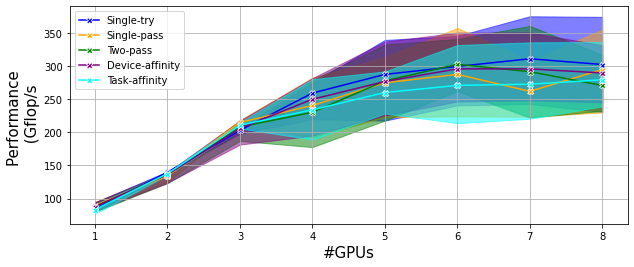

In [33]:
fig = plt.figure(figsize=(10, 4))
gs = GridSpec(nrows=1, ncols=1)

ax0 = fig.add_subplot(gs[0, 0])


boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="single_try_gflops_Mig_avg", ax=ax0, marker="X", label='Single-try', linestyle='-', color = 'blue')
ax0.fill_between(device, sparse_GEMM_selection['single_try_gflops_Mig_min'], sparse_GEMM_selection['single_try_gflops_Mig_max'], color = 'blue', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="single_pass_gflops_Mig_avg", ax=ax0, marker="X", label='Single-pass', linestyle='-', color = 'orange')
ax0.fill_between(device, sparse_GEMM_selection['single_pass_gflops_Mig_min'], sparse_GEMM_selection['single_pass_gflops_Mig_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="two_pass_gflops_Mig_avg", ax=ax0, marker="X", label='Two-pass', linestyle='-', color = 'green')
ax0.fill_between(device, sparse_GEMM_selection['two_pass_gflops_Mig_min'], sparse_GEMM_selection['two_pass_gflops_Mig_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="aff_only_gflops_Mig_avg", ax=ax0, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
ax0.fill_between(device, sparse_GEMM_selection['aff_only_gflops_Mig_min'], sparse_GEMM_selection['aff_only_gflops_Mig_max'], color = 'purple', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection, x="device", y="data_reuse_gflops_Mig_avg", ax=ax0, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
ax0.fill_between(device, sparse_GEMM_selection['data_reuse_gflops_Mig_min'], sparse_GEMM_selection['data_reuse_gflops_Mig_max'], color = 'cyan', alpha = 0.5)

ax0.set_xlabel('#GPUs', fontsize=15)
ax0.set_ylabel('Performance \n (Gflop/s', fontsize=15)
ax0.grid()


plt.legend(loc='upper left')

plt.savefig('SPARSE_GEMM_selection.jpeg', dpi=300)


In [34]:
#remove device 1

single_try_succdeals_Mig_min = [8953.0, 5482.0, 3969.0, 3607.0, 3322.0, 2899.0, 2577.0]
single_try_succdeals_Mig_max = [9099.0, 5780.0, 4698.0, 4800.0, 4168.0, 3830.0, 3680.0]
single_try_succdeals_Mig_avg = [9032.0, 5669.0, 4197.7, 4167.3, 3667.5, 3389.2, 3243.0]

single_pass_succdeals_Mig_min = [ 16435.0, 10964.0, 8065.0, 6971.0, 5645.0, 4752.0, 4589.0]
single_pass_succdeals_Mig_max = [ 16981.0, 11881.0, 9149.0, 8617.0, 7056.0, 6091.0, 5687.0]
single_pass_succdeals_Mig_avg = [16712.1, 11307.6, 8644.8, 7647.2, 6295.3, 5340.5, 4917.8]

two_pass_succdeals_Mig_min = [ 16705.0, 10727.0, 7866.0, 6594.0, 5616.0, 4981.0, 4502.0]
two_pass_succdeals_Mig_max = [ 17664.0, 11610.0, 9320.0, 7698.0, 6639.0, 6680.0, 6130.0]
two_pass_succdeals_Mig_avg = [ 17065.2, 11111.3, 8723.7, 7291.2, 5982.3, 5591.5, 5214.2]

aff_only_succdeals_Mig_min = [ 16748.0, 10880.0, 7769.0, 6751.0, 5388.0, 5285.0, 4393.0]
aff_only_succdeals_Mig_max = [ 17342.0, 11828.0, 9147.0, 7996.0, 6728.0, 6246.0, 5860.0]
aff_only_succdeals_Mig_avg = [ 17003.5, 11249.0, 8326.6, 7271.4, 5820.2, 5610.6, 4949.3]

data_reuse_succdeals_Mig_min = [ 16655.0, 10793.0, 8079.0, 6797.0, 5462.0, 5165.0, 4478.0]
data_reuse_succdeals_Mig_max = [ 16872.0, 11427.0, 9398.0, 9157.0, 6918.0, 6510.0, 6121.0]
data_reuse_succdeals_Mig_avg = [ 16754.5, 11137.9, 8733.6, 7884.9, 6151.6, 5762.7, 5306.6]

In [35]:
device = [2, 3, 4, 5, 6, 7, 8]
sparse_GEMM_selection_deals = {
                    'device': device,
    
                    
                    'single_try_succdeals_Mig_min':single_try_succdeals_Mig_min,
                    'single_try_succdeals_Mig_max':single_try_succdeals_Mig_max,
                    'single_try_succdeals_Mig_avg':single_try_succdeals_Mig_avg,
    
                    'single_pass_succdeals_Mig_min':single_pass_succdeals_Mig_min,
                    'single_pass_succdeals_Mig_max':single_pass_succdeals_Mig_max,
                    'single_pass_succdeals_Mig_avg':single_pass_succdeals_Mig_avg,
    
                    'two_pass_succdeals_Mig_min':two_pass_succdeals_Mig_min,
                    'two_pass_succdeals_Mig_max':two_pass_succdeals_Mig_max,
                    'two_pass_succdeals_Mig_avg':two_pass_succdeals_Mig_avg,
    
                    'aff_only_succdeals_Mig_min':aff_only_succdeals_Mig_min,
                    'aff_only_succdeals_Mig_max':aff_only_succdeals_Mig_max,
                    'aff_only_succdeals_Mig_avg':aff_only_succdeals_Mig_avg,
    
                    'data_reuse_succdeals_Mig_min':data_reuse_succdeals_Mig_min,
                    'data_reuse_succdeals_Mig_max':data_reuse_succdeals_Mig_max,
                    'data_reuse_succdeals_Mig_avg':data_reuse_succdeals_Mig_avg,
                   
                   }


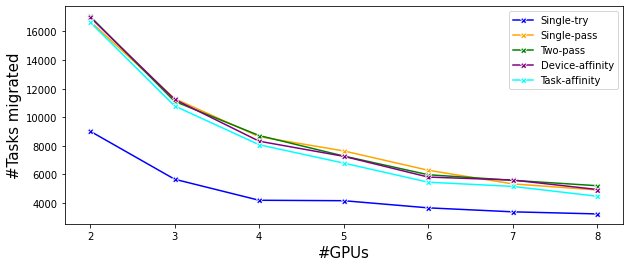

In [36]:
fig = plt.figure(figsize=(10, 4))
gs = GridSpec(nrows=1, ncols=1)

ax0 = fig.add_subplot(gs[0, 0])

boxplot = sns.lineplot(data=sparse_GEMM_selection_deals, x="device", y="single_try_succdeals_Mig_avg", ax=ax0, marker="X", label='Single-try', linestyle='-', color = 'blue')
#ax0.fill_between(device, sparse_GEMM_selection['single_try_succdeals_Mig_min'], sparse_GEMM_selection['single_try_succdeals_Mig_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection_deals, x="device", y="single_pass_succdeals_Mig_avg", ax=ax0, marker="X", label='Single-pass', linestyle='-', color = 'orange')
#ax0.fill_between(device, sparse_GEMM_selection['single_pass_succdeals_Mig_min'], sparse_GEMM_selection['single_pass_succdeals_Mig_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_deals, x="device", y="two_pass_succdeals_Mig_avg", ax=ax0, marker="X", label='Two-pass', linestyle='-', color = 'green')
#ax0.fill_between(device, sparse_GEMM_selection['two_pass_succdeals_Mig_min'], sparse_GEMM_selection['two_pass_succdeals_Mig_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_deals, x="device", y="aff_only_succdeals_Mig_avg", ax=ax0, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
#ax0.fill_between(device, sparse_GEMM_selection['aff_only_succdeals_Mig_min'], sparse_GEMM_selection['aff_only_succdeals_Mig_max'], color = 'purple', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection_deals, x="device", y="data_reuse_succdeals_Mig_min", ax=ax0, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
#ax0.fill_between(device, sparse_GEMM_selection['data_reuse_succdeals_Mig_min'], sparse_GEMM_selection['data_reuse_succdeals_Mig_min'], color = 'cyan', alpha = 0.5)


ax0.set_xlabel('#GPUs', fontsize=15)
ax0.set_ylabel('#Tasks migrated', fontsize=15)

plt.savefig('SPARSE_GEMM_selection_deals.jpeg', dpi=300)



In [37]:
dev_1 = [40396]
dev_2 = [39600, 796]
dev_3 = [19600, 20000, 796]
dev_4 = [13200, 13200, 13200, 796]
dev_5 = [9600, 10000, 10000, 10000, 796]
dev_6 = [7600, 8000, 8000, 8000, 8000, 796]
dev_7 = [6400, 6400, 6400, 6800, 6800, 6800, 796]
dev_8 = [5600, 5600, 5600, 5600, 5600, 5600, 6000, 796]

In [38]:
total_tasks = 40396
stddev = [ np.std(dev_1), np.std(dev_2), np.std(dev_3), np.std(dev_4), 
          np.std(dev_5), np.std(dev_6), np.std(dev_7), np.std(dev_8)]
print(stddev)




[0.0, 19402.0, 8960.059722023187, 5371.089554271089, 3644.893765255717, 2658.9726503963057, 2039.4001519054166, 1612.9946528119676]


[40396.0, 20198.0, 13465.333333333334, 10099.0, 8079.2, 6732.666666666667, 5770.857142857143, 5049.5]


Text(0.5, 1.0, '')

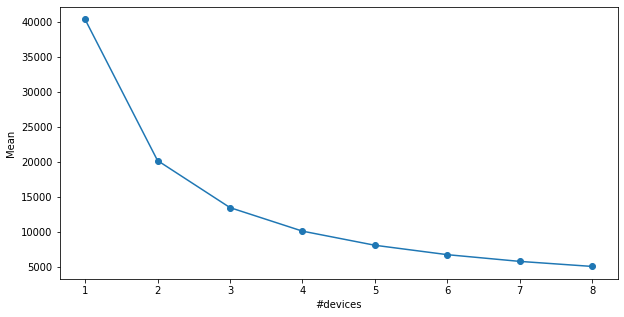

In [39]:
mean_ = [ np.mean(dev_1), np.mean(dev_2), np.mean(dev_3), np.mean(dev_4), 
          np.mean(dev_5),np.mean(dev_6), np.mean(dev_7), np.mean(dev_8)]
device = [1, 2, 3, 4, 5, 6, 7, 8]

print(mean_)


fig,ax = plt.subplots( figsize=(10, 5))

ax.plot(device, mean_, marker='o')

ax.set_xlabel('#devices')
ax.set_ylabel('Mean ')
ax.set_title('')
#plt.savefig('Sparse_GEMM_imbalance_stddev.jpeg')


[0.0, 0.9605901574413308, 0.6654168523138321, 0.531843702769689, 0.45114538138128985, 0.3949360308539913, 0.3533964022016515, 0.3194365091220849]


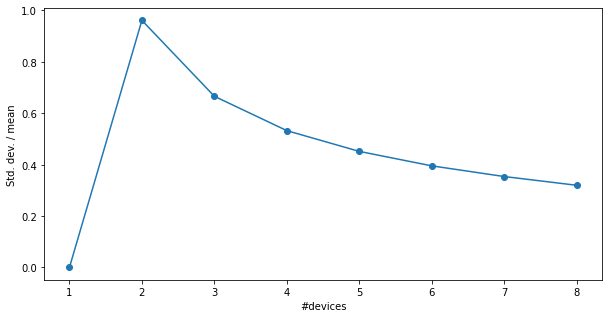

In [40]:
result = [a/b for a,b in zip(stddev,mean_)]
print(result)

fig,ax = plt.subplots( figsize=(10, 5))

ax.plot(device, result, marker='o')

ax.set_xlabel('#devices')
ax.set_ylabel('Std. dev. / mean')
ax.set_title('')
plt.savefig('Sparse_GEMM_imbalance_stddev.jpeg')

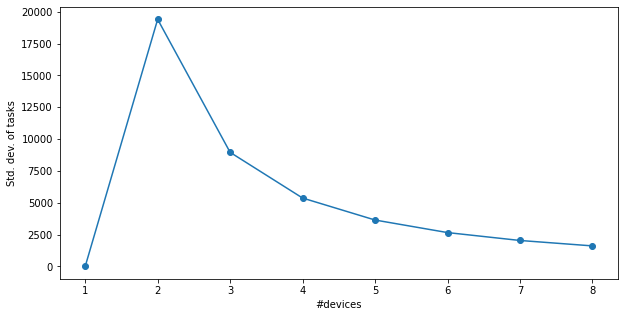

In [41]:
fig,ax = plt.subplots( figsize=(10, 5))

ax.plot(device, stddev, marker='o')

ax.set_xlabel('#devices')
ax.set_ylabel('Std. dev. of tasks')
ax.set_title('')
plt.savefig('Sparse_GEMM_imbalance_stddev.jpeg')

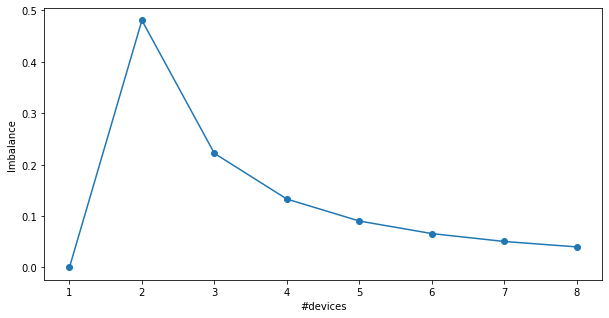

In [42]:
stddev_norm = [x/total_tasks for x in stddev]

fig,ax = plt.subplots( figsize=(10, 5))

ax.plot(device, stddev_norm, marker='o')

ax.set_xlabel('#devices')
ax.set_ylabel('Imbalance')
ax.set_title('')
plt.savefig('Sparse_GEMM_imbalance_stddev.jpeg')



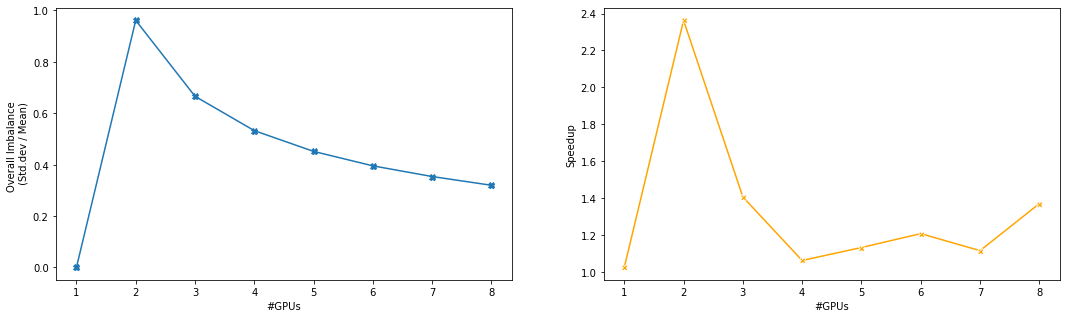

In [43]:


fig,ax = plt.subplots(1, 2, figsize=(18, 5))


ax[0].plot(device, result, marker="X")

ax[0].set_xlabel('#GPUs')
#ax[0].set_ylabel('Std. dev. / mean')
ax[0].set_ylabel('Overall Imbalance \n (Std.dev / Mean)')
ax[0].set_title('')



boxplot = sns.lineplot(data=sparse_GEMM_data_range, x="device", y="speedup", marker="X", ax=ax[1], color='orange')

ax[1].set_xlabel('#GPUs')
ax[1].set_ylabel('Speedup')




plt.savefig('SPARSE_GEMM_combined_speedup_imb.jpeg')


In [44]:
speedup_without_1_GPU = sparse_GEMM_data_range['speedup'][1:]
imbalance_without_1_GPU = result[1:]
device_without_1_GPU = device[1:]

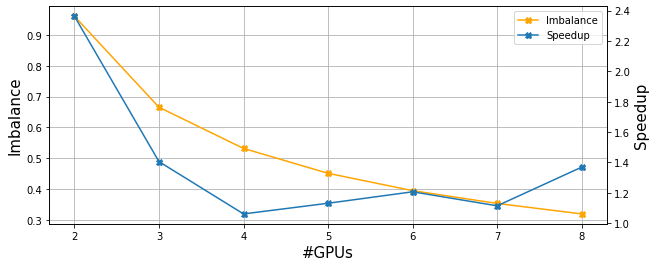

In [45]:
fig,ax = plt.subplots(1, 1, figsize=(10, 4))


lns1 = ax.plot(device_without_1_GPU, imbalance_without_1_GPU, marker="X", color='orange', label='Imbalance')

ax.set_xlabel('#GPUs', fontsize=15)
#ax.set_ylabel('Overall Imbalance \n (Std.dev / Mean)')
ax.set_ylabel('Imbalance', fontsize=15)
ax.set_title('')

ax2 = ax.twinx()

lns2 = ax2.plot(device_without_1_GPU, speedup_without_1_GPU, marker="X", label='Speedup')

ax2.set_ylabel('Speedup', fontsize=15)

#ax.figure.legend()
#plt.legend(loc='upper right')
ax.grid()

#ax2.legend(loc=0)
#ax.legend(loc=3)
#plt.tight_layout()

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)



plt.savefig('SPARSE_GEMM_combined_speedup_imb.jpeg', dpi=300)


## Weak scaling

In [46]:
device = [1, 2, 3, 4, 5, 6, 7, 8]

sparse_GEMM_gflops_weak_NoMig_min = [36.443788, 38.18248,  67.933798, 87.255548, 122.794698,  117.525743, 114.697189,  116.40986 ]
sparse_GEMM_gflops_weak_NoMig_max = [47.551358, 48.972025, 82.232816, 122.15024, 156.976157,  168.166208, 181.332913,  178.688188]
sparse_GEMM_gflops_weak_NoMig_avg = [40.752045, 46.337717, 73.817882, 109.78000, 144.6242243, 155.237797, 146.4621295, 148.106667]

sparse_GEMM_gflops_weak_NoMig_compl_not_dlgtd_min = [36.586339, 37.656327, 64.221725, 88.042275,  107.698147, 139.574016, 117.481534, 106.875499]
sparse_GEMM_gflops_weak_NoMig_compl_not_dlgtd_max = [46.848484, 48.757072, 82.385615, 116.845413, 142.172323, 168.118011, 175.472018, 174.867706]
sparse_GEMM_gflops_weak_NoMig_compl_not_dlgtd_avg = [41.576580, 41.111908, 72.102681, 97.3680198, 126.130072, 154.242590, 149.713309, 134.425157]


sparse_GEMM_gflops_weak_Mig_min = [35.848756, 62.93841 , 91.480189,   99.270527, 138.667093,  111.492415 , 129.754001, 116.573071]
sparse_GEMM_gflops_weak_Mig_max = [47.591815, 70.971137, 107.336022,  142.639367, 172.247346,  166.561745, 182.583403, 160.147193]
sparse_GEMM_gflops_weak_Mig_avg = [42.622664, 67.360527, 95.25563628, 118.169082, 155.4189283, 140.1614932, 147.88299, 132.4487695] 

sparse_GEMM_gflops_weak_Mig_delgtd_min = [38.039008, 74.348048 , 99.262232, 120.473339, 136.808937,  138.165965, 149.447758, 137.919854]
sparse_GEMM_gflops_weak_Mig_delgtd_max = [47.157687, 81.727031 , 123.98423, 152.816149, 168.337829,  186.237384, 191.760506, 170.260182]
sparse_GEMM_gflops_weak_Mig_delgtd_avg = [41.925496, 78.3025245, 113.00007, 137.692658, 152.2543542, 161.761003, 169.764679, 155.4398798] 





In [47]:
sparse_GEMM_data_weak = {
                    'device': device,
                    'sparse_GEMM_gflops_weak_NoMig_min':sparse_GEMM_gflops_weak_NoMig_min,
                    'sparse_GEMM_gflops_weak_NoMig_max':sparse_GEMM_gflops_weak_NoMig_max,
                    'sparse_GEMM_gflops_weak_NoMig_avg':sparse_GEMM_gflops_weak_NoMig_avg,
    
                    'sparse_GEMM_gflops_weak_NoMig_compl_not_dlgtd_min': sparse_GEMM_gflops_weak_NoMig_compl_not_dlgtd_min,
                    'sparse_GEMM_gflops_weak_NoMig_compl_not_dlgtd_max': sparse_GEMM_gflops_weak_NoMig_compl_not_dlgtd_max,
                    'sparse_GEMM_gflops_weak_NoMig_compl_not_dlgtd_avg': sparse_GEMM_gflops_weak_NoMig_compl_not_dlgtd_avg,
    
                    'sparse_GEMM_gflops_weak_Mig_min':sparse_GEMM_gflops_weak_Mig_min,
                    'sparse_GEMM_gflops_weak_Mig_max':sparse_GEMM_gflops_weak_Mig_max,
                    'sparse_GEMM_gflops_weak_Mig_avg':sparse_GEMM_gflops_weak_Mig_avg,
    
                    'sparse_GEMM_gflops_weak_Mig_delgtd_min':sparse_GEMM_gflops_weak_Mig_delgtd_min,
                    'sparse_GEMM_gflops_weak_Mig_delgtd_max':sparse_GEMM_gflops_weak_Mig_delgtd_max,
                    'sparse_GEMM_gflops_weak_Mig_delgtd_avg':sparse_GEMM_gflops_weak_Mig_delgtd_avg
                    
    
                   
                   }

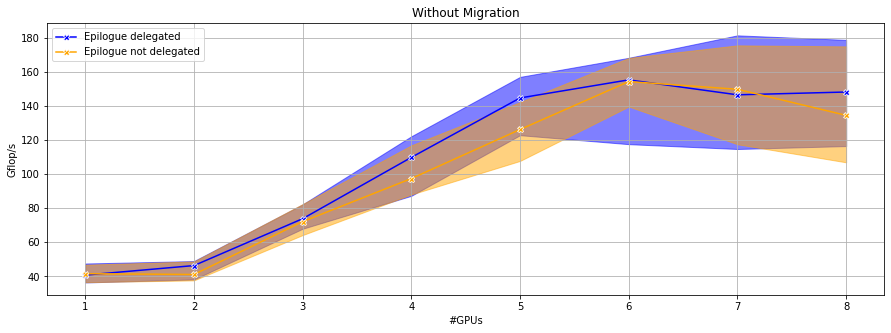

In [48]:
fig,ax = plt.subplots( figsize=(15, 5))


boxplot = sns.lineplot(data=sparse_GEMM_data_weak, x="device", y="sparse_GEMM_gflops_weak_NoMig_avg", ax=ax, marker="X", label='Epilogue delegated', linestyle='-', color = 'blue')
ax.fill_between(device, sparse_GEMM_data_weak['sparse_GEMM_gflops_weak_NoMig_min'], sparse_GEMM_data_weak['sparse_GEMM_gflops_weak_NoMig_max'], color = 'blue', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_data_weak, x="device", y="sparse_GEMM_gflops_weak_NoMig_compl_not_dlgtd_avg", ax=ax, marker="X", label='Epilogue not delegated', linestyle='-', color = 'orange')
ax.fill_between(device, sparse_GEMM_data_weak['sparse_GEMM_gflops_weak_NoMig_compl_not_dlgtd_min'], sparse_GEMM_data_weak['sparse_GEMM_gflops_weak_NoMig_compl_not_dlgtd_max'], color = 'orange', alpha = 0.5)


ax.set_xlabel('#GPUs')
ax.set_ylabel('Gflop/s')
ax.set_title('Without Migration')
ax.grid()

plt.legend(loc='upper left')

plt.savefig('SPARSE_GEMM_weak_scaling_nomig.jpeg', dpi=300)

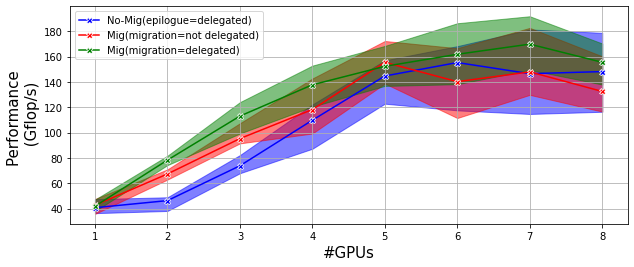

In [49]:
fig,ax = plt.subplots( figsize=(10, 4))


boxplot = sns.lineplot(data=sparse_GEMM_data_weak, x="device", y="sparse_GEMM_gflops_weak_NoMig_avg", ax=ax, marker="X", label='No-Mig(epilogue=delegated)', linestyle='-', color = 'blue')
ax.fill_between(device, sparse_GEMM_data_weak['sparse_GEMM_gflops_weak_NoMig_min'], sparse_GEMM_data_weak['sparse_GEMM_gflops_weak_NoMig_max'], color = 'blue', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_data_weak, x="device", y="sparse_GEMM_gflops_weak_Mig_avg", ax=ax, marker="X", label='Mig(migration=not delegated)', linestyle='-', color = 'red')
ax.fill_between(device, sparse_GEMM_data_weak['sparse_GEMM_gflops_weak_Mig_min'], sparse_GEMM_data_weak['sparse_GEMM_gflops_weak_Mig_max'], color = 'red', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_data_weak, x="device", y="sparse_GEMM_gflops_weak_Mig_delgtd_avg", ax=ax, marker="X", label='Mig(migration=delegated)', linestyle='-', color = 'green')
ax.fill_between(device, sparse_GEMM_data_weak['sparse_GEMM_gflops_weak_Mig_delgtd_min'], sparse_GEMM_data_weak['sparse_GEMM_gflops_weak_Mig_delgtd_max'], color = 'green', alpha = 0.5)


ax.set_xlabel('#GPUs', fontsize=15)
ax.set_ylabel('Performance \n (Gflop/s)', fontsize=15)
ax.grid()

plt.legend(loc='upper left')

plt.savefig('SPARSE_GEMM_weak_scaling.jpeg', dpi=300)

## effect of chunk size on migration

In [50]:

chunk = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

chunk_min  = [126.497931, 133.357977, 126.651875, 120.836004, 123.239242, 120.404292, 120.767855, 121.82087, 118.48675, 120.353895]
chunk_max  = [152.227839, 155.440935, 155.402592, 153.965034, 146.113358, 155.237918, 151.766178, 151.07525, 153.63041, 154.548556]
chunk_avg  = [141.831343, 145.892081, 142.912693, 138.167789, 134.649476, 135.201681, 134.940593, 138.26786, 138.81030, 137.8759343]

nb_deals_min = [1930950.0, 2791166.0, 4948493.0,  3084276.0, 4239975.0, 3385720.0, 3049729.0, 3549169.0, 5732054.0, 3908747.0]
nb_deals_max = [8080699.0, 7249304.0, 10214102.0, 7340937.0, 9769817.0, 8401335.0, 9554323.0, 7719726.0, 10504177.0, 9883061.0]
nb_deals_avg = [4613930.2, 4994725.9, 6929096.4,  5875913.7, 6351959.8, 5399144.8, 6231270.2, 5550558.8, 7449822.5, 6434328.5]

task_per_deal_min = [1, 1.9436601307189543, 2.843609610000651,  3.662012173290369, 4.462555066079295, 5.361214495592557, 5.9962067330488384, 6.893289328932894, 6.518686968558434, 7.793790275336848]
task_per_deal_max = [1, 1.9932426795695337, 2.974131198750488,  3.949504057709648, 4.862270450751252, 5.804867448935245, 6.704896221394359,  7.690237936402045, 8.67942874506229,  9.481263776634828]
task_per_deal_avg = [1, 1.9817713556292644, 2.9180215156500546, 3.881127354816116, 4.741019691022103, 5.650541738452307, 6.410713205706147,  7.400264965660149, 7.823043616449877, 8.499886361929608]

nb_succ_deals_min = [24497.0, 11987.0, 8549.0 , 6565.0, 4792.0, 4572.0, 3758.0, 3318.0, 2836.0, 2722.0]
nb_succ_deals_max = [33016.0, 22950.0, 15359.0, 8705.0, 6306.0, 6283.0, 4857.0, 5454.0, 5057.0, 3796.0]
nb_succ_deals_avg = [27132.9, 15064.6, 11210.6, 7325.8, 5622.1, 5132.6, 4210.2, 3886.9, 3641.0, 3183.4]

tasks_mig_min = [24497.0, 23893.0, 25389.0, 25647.0, 23300.0, 25944.0, 24530.0, 24887.0, 24516.0, 25343.0]
tasks_mig_max = [33016.0, 44607.0, 43675.0, 34290.0, 30587.0, 36417.0, 32493.0, 37596.0, 32965.0, 32785.0]
tasks_mig_avg = [27132.9, 29817.8, 32602.4, 28406.9, 26647.6, 28986.9, 26967.6, 28695.8, 28147.1, 26948.3]

perc_succ_deal_min = [0.3425693742583408, 0.1906590945290216, 0.0877369822767415, 0.0951016614721837, 0.06041054811978566, 0.05477700865398178, 0.04362423166978968, 0.046931717524689345, 0.030321271242858914, 0.03323868991600882]
perc_succ_deal_max = [1.3559128926176234, 0.5651401600621389, 0.2828517511707528, 0.2128538431709743, 0.14872729202412752, 0.15038338545394975, 0.12355196150215314, 0.12401189653817359,  0.07776789980381944,  0.0804093997385863]
perc_succ_deal_avg = [0.7017018813953017, 0.3228935959008455, 0.1727691615080349, 0.1329172712122783, 0.09654811014526106, 0.1050372257951453 , 0.07546170828084484, 0.07580575010356169,  0.05033072599021886,  0.05299564162043484]





In [51]:
sparse_GEMM_data_chunk = {
    'chunk': chunk,
    'chunk_min': chunk_min,
    'chunk_max': chunk_max,
    'chunk_avg': chunk_avg,
    
    'nb_deals_min':nb_deals_min,
    'nb_deals_max':nb_deals_max,
    'nb_deals_avg':nb_deals_avg,
    
    'nb_succ_deals_min':nb_succ_deals_min,
    'nb_succ_deals_max':nb_succ_deals_max,
    'nb_succ_deals_avg':nb_succ_deals_avg,
    
    'task_per_deal_min': task_per_deal_min,
    'task_per_deal_max': task_per_deal_max,
    'task_per_deal_avg': task_per_deal_avg,
    
    'tasks_mig_min':tasks_mig_min,
    'tasks_mig_max':tasks_mig_max,
    'tasks_mig_avg':tasks_mig_avg,
    
    'perc_succ_deal_min':perc_succ_deal_min,
    'perc_succ_deal_max':perc_succ_deal_max,
    'perc_succ_deal_avg':perc_succ_deal_avg
    
                   
    }

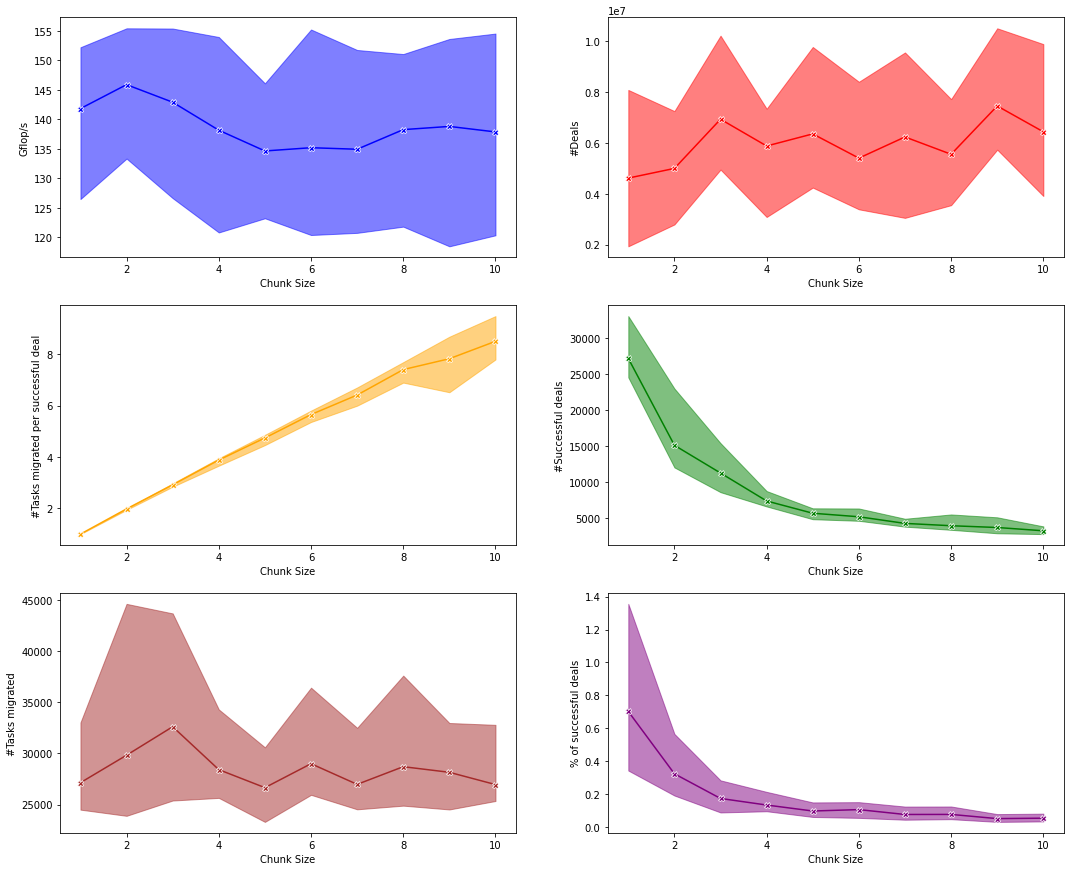

In [52]:



fig = plt.figure(figsize=(18, 15))
gs = GridSpec(nrows=3, ncols=2)

ax0 = fig.add_subplot(gs[0, 0])

boxplot = sns.lineplot(data=sparse_GEMM_data_chunk, x="chunk", y="chunk_avg", ax=ax0, marker="X", label='Single-try', linestyle='-', color = 'blue')
ax0.fill_between(chunk, sparse_GEMM_data_chunk['chunk_min'], sparse_GEMM_data_chunk['chunk_max'], color = 'blue', alpha = 0.5)



ax0.set_xlabel('Chunk Size')
ax0.set_ylabel('Gflop/s')
ax0.legend([],[], frameon=False)


ax1 = fig.add_subplot(gs[0, 1])
boxplot = sns.lineplot(data=sparse_GEMM_data_chunk, x="chunk", y="nb_deals_avg", ax=ax1, label='Chunk', marker="X", linestyle='-', color = 'red')
ax1.fill_between(chunk, sparse_GEMM_data_chunk['nb_deals_min'], sparse_GEMM_data_chunk['nb_deals_max'], color = 'red', alpha = 0.5)

ax1.set_xlabel('Chunk Size')
ax1.set_ylabel('#Deals')
ax1.legend([],[], frameon=False)

ax2 = fig.add_subplot(gs[1, 0])
boxplot = sns.lineplot(data=sparse_GEMM_data_chunk, x="chunk", y="task_per_deal_avg", ax=ax2, label='Chunk', marker="X", linestyle='-', color = 'orange')
ax2.fill_between(chunk, sparse_GEMM_data_chunk['task_per_deal_min'], sparse_GEMM_data_chunk['task_per_deal_max'], color = 'orange', alpha = 0.5)

ax2.set_xlabel('Chunk Size')
ax2.set_ylabel('#Tasks migrated per successful deal')
ax2.legend([],[], frameon=False)

ax3 = fig.add_subplot(gs[1, 1])
boxplot = sns.lineplot(data=sparse_GEMM_data_chunk, x="chunk", y="nb_succ_deals_avg", ax=ax3, label='Chunk', marker="X", linestyle='-', color = 'green')
ax3.fill_between(chunk, sparse_GEMM_data_chunk['nb_succ_deals_min'], sparse_GEMM_data_chunk['nb_succ_deals_max'], color = 'green', alpha = 0.5)

ax3.set_xlabel('Chunk Size')
ax3.set_ylabel('#Successful deals')
ax3.legend([],[], frameon=False)

ax4 = fig.add_subplot(gs[2, 0])
boxplot = sns.lineplot(data=sparse_GEMM_data_chunk, x="chunk", y="tasks_mig_avg", ax=ax4, label='Chunk', marker="X", linestyle='-', color = 'brown')
ax4.fill_between(chunk, sparse_GEMM_data_chunk['tasks_mig_min'], sparse_GEMM_data_chunk['tasks_mig_max'], color = 'brown', alpha = 0.5)


ax4.set_xlabel('Chunk Size')
ax4.set_ylabel('#Tasks migrated')
ax4.legend([],[], frameon=False)

ax5 = fig.add_subplot(gs[2, 1])
boxplot = sns.lineplot(data=sparse_GEMM_data_chunk, x="chunk", y="perc_succ_deal_avg", ax=ax5, label='Chunk', marker="X", linestyle='-', color = 'purple')
ax5.fill_between(chunk, sparse_GEMM_data_chunk['perc_succ_deal_min'], sparse_GEMM_data_chunk['perc_succ_deal_max'], color = 'purple', alpha = 0.5)


ax5.set_xlabel('Chunk Size')
ax5.set_ylabel('% of successful deals')
ax5.legend([],[], frameon=False)

plt.legend(loc='upper left')
plt.legend([],[], frameon=False)
plt.savefig('SPARSE_GEMM_chunk.jpeg', dpi=300)

## Effect of chunk on selection policies

In [141]:
chunk_size  = [1, 2, 3, 4, 5, 6, 7, 8]

######## GFlOPS ########

single_try_chunk_min  = [201.996425, 206.582814, 191.75752,  139.48495, 196.761935, 207.651608, 215.65821, 206.437924, ]
single_try_chunk_max  = [271.192676, 284.630885, 292.193449, 291.20905, 296.026378, 290.428673, 291.96614, 287.417451, ]
single_try_chunk_avg  = [231.596913, 248.032192, 227.611246, 243.33571, 243.082160, 252.887154, 259.68619, 256.406916, ]


single_pass_chunk_min = [201.23388, 177.497635, 192.63365,  180.322139, 182.338163, 179.466011, 171.449796, 182.158702, ]
single_pass_chunk_max = [283.42045, 288.653125, 283.387395, 282.473263, 284.10822,  288.391014, 281.655733, 283.249803, ]
single_pass_chunk_avg = [252.56093, 246.374635, 240.461163, 219.891902, 239.133453, 250.116892, 234.311011, 240.882118, ]

two_pass_chunk_min    = [190.74778, 195.996704, 206.31502, 178.443128, 188.351218, 195.254142, 169.261436, 179.141283, ]
two_pass_chunk_max    = [279.53684, 279.925331, 284.56778, 252.049401, 285.739081, 279.75998,  281.892313, 279.820502, ]
two_pass_chunk_avg    = [241.31626, 238.293856, 247.32909, 219.622604, 234.586891, 253.890222, 246.052326, 248.322942, ]

aff_only_chunk_min    = [192.256593, 210.077926, 207.276524, 180.1030, 230.590173, 200.645276, 182.698182, 211.328541, ]
aff_only_chunk_max    = [278.455268, 287.125955, 286.149599, 282.2443, 287.143762, 280.954612, 277.756518, 283.962329, ]
aff_only_chunk_avg    = [227.944516, 260.964569, 266.517505, 245.3841, 265.385745, 250.401238, 231.012743, 247.624013, ]

data_reuse_chunk_min  = [191.304033, 180.100261, 193.09664, 239.42839, 178.728386, 220.244543, 181.948919, 197.413234, ]
data_reuse_chunk_max  = [287.018303, 272.233873, 280.59018, 281.93435, 281.623948, 277.197046, 273.780491, 276.843204, ]
data_reuse_chunk_avg  = [239.033662, 220.621552, 230.74703, 261.73617, 224.959780, 245.688498, 223.695794, 226.915835, ]

######## NB DEALS ########

single_try_chunk_deal_min  = [26092.0,  5945.0, 3560.0, 2447.0, 2010.0, 1719.0, 1398.0, 1180.0]
single_try_chunk_deal_max  = [28229.0,  7383.0, 6363.0, 3537.0, 2753.0, 2776.0, 1922.0, 3442.0]
single_try_chunk_deal_avg  = [26997.3,  6694.2, 4254.4, 2891.9, 2296.5, 1969.3, 1601.3, 1601.2]


single_pass_chunk_deal_min = [8285.0, 4391.0, 2937.0, 2333.0, 1892.0, 1515.0, 1425.0, 1220.0]
single_pass_chunk_deal_max = [9646.0, 5248.0, 3674.0, 2935.0, 2387.0, 1986.0, 1792.0, 1788.0]
single_pass_chunk_deal_avg = [8801.5, 4797.6, 3259.9, 2679.6, 2194.6, 1750.2, 1611.2, 1448.9]

two_pass_chunk_deal_min    = [8201.0, 4244.0, 2940.0, 2524.0, 1921.0, 1570.0, 1432.0, 1182.0]
two_pass_chunk_deal_max    = [9876.0, 5229.0, 3714.0, 2825.0, 2478.0, 2128.0, 1808.0, 1595.0]
two_pass_chunk_deal_avg    = [9063.5, 4839.8, 3334.8, 2693.8, 2149.8, 1799.2, 1556.2, 1365.1]

aff_only_chunk_deal_min    = [8402.0, 4260.0, 2937.0, 2247.0, 1923.0, 1534.0, 1452.0, 1296.0]
aff_only_chunk_deal_max    = [9877.0, 5089.0, 3963.0, 2908.0, 2406.0, 2097.0, 1848.0, 1655.0]
aff_only_chunk_deal_avg    = [9223.4, 4614.7, 3276.0, 2571.6, 2108.4, 1800.4, 1618.3, 1496.4]

data_reuse_chunk_deal_min  = [26092.0, 5945.0, 3560.0, 2447.0, 2010.0, 1719.0, 1398.0, 1180.0]
data_reuse_chunk_deal_max  = [28229.0, 7383.0, 6363.0, 3537.0, 2753.0, 2776.0, 1922.0, 3442.0]
data_reuse_chunk_deal_avg  = [26997.3, 5513.0, 4254.4, 2891.9, 2296.5, 1969.3, 1601.3, 1601.2]

############## TASK MIGRATED PER SUCCESSFUL DEAL ############

single_try_task_per_deal_min = [1.0, 1.2473816197079215, 2.260968229954614, 3.122058236936577, 4.250472589792061, 5.208080808080808, 6.056357388316151, 6.990863787375416]
single_try_task_per_deal_max = [1.0, 1.3110666461443743, 2.334364454443194, 3.367194371152155, 4.366533864541832, 5.333333333333333, 6.353462157809984, 7.326829268292683]
single_try_task_per_deal_avg = [1.0, 1.2777102826189364, 2.302644677260370, 3.289593033710036, 4.306938869718595, 5.273060754709059, 6.249036754822792, 7.234052847865153]

single_pass_task_per_deal_min = [1.0, 1.9986675549633577, 2.996021220159151, 3.989644304367402, 4.985229759299781, 5.977749523204069, 6.982545454545455, 7.9698314108252]
single_pass_task_per_deal_max = [1.0, 1.9995777918513826, 2.99963476990504 , 3.998066698888351, 4.998887033945465, 5.99215965787598 , 6.994404476418865, 7.992359121298949]
single_pass_task_per_deal_avg = [1.0, 1.9990667350102787, 2.997901731638106, 3.993758833907655, 4.993402841111033, 5.986218922641197, 6.987598828417336, 7.980516975690098]

two_pass_task_per_deal_min = [1.0, 1.9987105093488071, 2.9959618208516887, 3.9920389208314906, 4.982720178372352,  5.968562874251497, 6.9731925264012995, 7.956685499058381]
two_pass_task_per_deal_max = [1.0, 1.9995420196931533, 2.9982155603140614, 3.997757847533632,  4.9974463738508685, 5.996610169491525, 6.99024024024024,   7.985849056603773]
two_pass_task_per_deal_avg = [1.0, 1.99913956395769,   2.996944479725067 , 3.9948631234109593, 4.991779801328332,  5.984560781450691, 6.981196288743057,  7.973698063279798]

aff_only_task_per_deal_min = [1, 1.998173515981735, 2.995525727069351, 3.9879285369386768, 4.985268120212139, 5.976190476190476, 6.96953125, 7.94]
aff_only_task_per_deal_max = [1, 1.999752903385223, 2.998284145504461, 3.9990978800180423, 4.996411483253588, 5.994634473507713, 6.99251870, 7.987654320987654]
aff_only_task_per_deal_avg = [1, 1.999011544676902, 2.997199667855261, 3.993557346034174,  4.990786878160446, 5.987005615298708, 6.98306885, 7.973363904759374]

data_reuse_task_per_deal_min = [1, 1.2725096422396596, 1.3849137931034483, 1.4890462856201614, 1.4856794637416209, 1.5465313028764804, 1.5473782480161817, 1.5512738853503185]
data_reuse_task_per_deal_max = [1, 1.345816733067729,  1.490117194332692,  1.5685446870985502, 1.62645765627987,   1.670905889258462,  1.6650466562986004, 1.6342426417803302]
data_reuse_task_per_deal_avg = [1, 1.3041743958992627, 1.41984776425957,   1.532334712709004,  1.567785125358364,  1.6204512352194844, 1.5968555414180972, 1.6012009968157241]

######## SUCCESS DEALS ########

single_try_chunk_succ_deal_min  = [3813.0, 5513.0, 3200.0, 2249.0, 1757.0, 1398.0, 1178.0, 1004.0]
single_try_chunk_succ_deal_max  = [4587.0, 6889.0, 3966.0, 2711.0, 2116.0, 1635.0, 1455.0, 1204.0]
single_try_chunk_succ_deal_avg  = [4348.4, 6277.6, 3639.5, 2458.6, 1920.0, 1552.5, 1288.8, 1115.0]


single_pass_chunk_succ_deal_min = [7912.0, 3995.0, 2687.0, 2069.0, 1655.0, 1365.0, 1201.0, 1022.0]
single_pass_chunk_succ_deal_max = [9229.0, 4737.0, 3168.0, 2386.0, 1911.0, 1583.0, 1406.0, 1276.0]
single_pass_chunk_succ_deal_avg = [8412.8, 4380.0, 2898.3, 2271.8, 1806.7, 1462.5, 1296.0, 1123.9]

two_pass_chunk_succ_deal_min    = [7933.0, 3942.0, 2721.0, 2156.0, 1680.0, 1336.0, 1191.0, 1041.0]
two_pass_chunk_succ_deal_max    = [9442.0, 4692.0, 3168.0, 2355.0, 1958.0, 1644.0, 1356.0, 1224.0]
two_pass_chunk_succ_deal_avg    = [8708.3, 4396.3, 2923.1, 2253.9, 1804.1, 1465.9, 1250.8, 1105.3]

aff_only_chunk_succ_deal_min    = [8074.0, 4002.0, 2674.0, 2029.0, 1672.0, 1339.0, 1203.0, 1050.0]
aff_only_chunk_succ_deal_max    = [9423.0, 4681.0, 3284.0, 2401.0, 1845.0, 1640.0, 1390.0, 1223.0]
aff_only_chunk_succ_deal_avg    = [8813.7, 4247.6, 2871.0, 2189.1, 1733.3, 1448.9, 1282.1, 1127.7]

data_reuse_chunk_succ_deal_min  = [7908.0, 6089.0, 5717.0, 5449.0, 5097.0, 5111.0, 5144.0, 5456.0]
data_reuse_chunk_succ_deal_max  = [9363.0, 7546.0, 6960.0, 6071.0, 6564.0, 6501.0, 6427.0, 6280.0]
data_reuse_chunk_succ_deal_avg  = [8666.4, 7010.8, 6466.8, 5778.9, 5828.7, 5636.6, 5858.2, 5879.1]


######## MIGRATED TASKS ########

single_try_chunk_mig_tasks_min  = [3813.0, 7122.0, 7455.0, 7433.0, 7672.0, 7456.0, 7380.0, 7353.0]
single_try_chunk_mig_tasks_max  = [4587.0, 8640.0, 8967.0, 8918.0, 8994.0, 8691.0, 8812.0, 8539.0]
single_try_chunk_mig_tasks_avg  = [4348.4, 8013.5, 8376.1, 8085.2, 8266.3, 8185.8, 8049.7, 8061.9]


single_pass_chunk_mig_tasks_min = [7912.0, 7987.0, 8055.0, 8272.0, 8265.0, 8173.0, 8390.0, 8153.0]
single_pass_chunk_mig_tasks_max = [9229.0, 9472.0, 9499.0, 9530.0, 9543.0, 9477.0, 9823.0, 10180.0]
single_pass_chunk_mig_tasks_avg = [8412.8, 8755.9, 8688.7, 9073.0, 9021.5, 8754.6, 9055.9, 8969.2]

two_pass_chunk_mig_tasks_min    = [7933.0, 7880.0, 8153.0, 8602.0, 8383.0, 7974.0, 8313.0, 8306.0]
two_pass_chunk_mig_tasks_max    = [9442.0, 9380.0, 9494.0, 9369.0, 9785.0, 9855.0, 9460.0, 9749.0]
two_pass_chunk_mig_tasks_avg    = [8708.3, 8788.8, 8760.4, 8978.5, 9005.7, 8772.9, 8732.1, 8813.2]

aff_only_chunk_mig_tasks_min    = [8074.0, 7999.0, 8014.0, 8100.0, 8354.0, 8006.0, 8412.0, 8337.0]
aff_only_chunk_mig_tasks_max    = [9423.0, 9359.0, 9844.0, 9584.0, 9210.0, 9820.0, 9702.0, 9761.0]
aff_only_chunk_mig_tasks_avg    = [8813.7, 8491.0, 8605.0, 8742.4, 8650.5, 8674.8, 8952.8, 8991.6]

data_reuse_chunk_mig_tasks_min  = [7908.0, 8149.0, 8519.0, 8547.0, 8285.0, 8540.0,  8565.0, 8901.0]
data_reuse_chunk_mig_tasks_max  = [9363.0, 9711.0, 9639.0, 9109.0, 9752.0, 10054.0, 9945.0, 9834.0]
data_reuse_chunk_mig_tasks_avg  = [8666.4, 9132.9, 9170.9, 8851.0, 9114.0, 9120.8,  9340.4, 9407.7]

######## PERC SUCCESS ########

single_try_chunk_perc_succ_min  = [14.123791532392488, 92.73338940285954, 62.32909005186232, 70.87927622278767, 76.86160552124954, 58.285302593659935, 75.70239334027055, 34.97966298663568]
single_try_chunk_perc_succ_max  = [17.02054269507895,  94.58838963594621, 91.39091418956814, 91.90845933796486, 87.4129353233831,  86.11867174741427,  85.55078683834049, 85.08474576271186]
single_try_chunk_perc_succ_avg  = [16.111289989359072, 93.76496933482034, 86.95035596985751, 85.54177376452466, 83.79197026302174, 79.8481098630352,   80.8603758124776,  75.01877469668663]


single_pass_chunk_perc_succ_min = [94.87870619946092, 88.48006164515508, 86.06423516603158, 80.85178875638842, 77.91986359761296, 79.20443101711983, 75.39543057996485, 71.32911392405063]
single_pass_chunk_perc_succ_max = [96.04761354443545, 93.58771731767894, 92.53126056100034, 88.6840977282469,  89.58773784355179, 90.0990099009901,  86.68478260869566, 83.77049180327869]
single_pass_chunk_perc_succ_avg = [95.58902274766044, 91.39884334174984, 89.04543763495522, 84.94973719412147, 82.53883539388184, 83.81551600506798, 80.66596804098086, 77.93013528775516]

two_pass_chunk_perc_succ_min    = [95.60550830295666, 89.40129449838187, 84.30667035704401, 80.03539823008849, 79.01533494753834, 77.25563909774436, 73.67256637168141, 76.45390070921985]
two_pass_chunk_perc_succ_max    = [96.73210584075113, 92.88407163053722, 92.55102040816327, 88.35182250396197, 88.54763144195731, 87.20200752823087, 86.46196789951152, 89.67851099830794]
two_pass_chunk_perc_succ_avg    = [96.09712054165253, 90.8776282307733,  87.84843924084294, 83.72582507816871, 84.07092069603576, 81.74633446493941, 80.58587520822687, 81.24226276623742]

aff_only_chunk_perc_succ_min    = [94.73352916491817, 89.99383603862749, 82.86651526621247, 80.38785217709477, 76.68329177057358, 75.70564516129032, 75.21645021645021, 71.62346521145976]
aff_only_chunk_perc_succ_max    = [96.09616757914782, 93.94366197183098, 91.57718120805369, 90.29817534490432, 86.94747789911597, 87.28813559322035, 83.83968972204266, 82.87037037037037]
aff_only_chunk_perc_succ_avg    = [95.56814853995513, 92.08562208302747, 87.87893984380419, 85.40909336740353, 82.39991527996094, 80.82916214975731, 79.3769824415411,  75.53290578346484]

data_reuse_chunk_perc_succ_min  = [95.62955254942767, 94.16405760801503, 93.58850352355948, 92.7518042045811,  91.45765712599587, 92.01948924731182, 92.15239829993929, 91.91374663072777]
data_reuse_chunk_perc_succ_max  = [96.84614462165727, 97.55143436685019, 95.35448827901658, 95.27186761229315, 94.28519920677843, 95.23010993106018, 94.90033222591362, 94.59922178988327]
data_reuse_chunk_perc_succ_avg  = [96.06329246248114, 95.06362874254292, 94.57693677957954, 94.1607348046077,  93.11757743148925, 93.42582655726983, 93.3408070346312,  93.05076146334599]



sparse_GEMM_selection_chunk = {
    
    'chunk_size':chunk_size,
    
    ######## GFlOPS ########
    
    'single_try_chunk_min':single_try_chunk_min,
    'single_try_chunk_max':single_try_chunk_max,
    'single_try_chunk_avg':single_try_chunk_avg,
    
    'single_pass_chunk_min':single_pass_chunk_min,
    'single_pass_chunk_max':single_pass_chunk_max,
    'single_pass_chunk_avg':single_pass_chunk_avg,
    
    'two_pass_chunk_min':two_pass_chunk_min,
    'two_pass_chunk_max':two_pass_chunk_max,
    'two_pass_chunk_avg':two_pass_chunk_avg,
    
    'aff_only_chunk_min':aff_only_chunk_min, 
    'aff_only_chunk_max':aff_only_chunk_max,
    'aff_only_chunk_avg':aff_only_chunk_avg,
    
    'data_reuse_chunk_min':data_reuse_chunk_min,
    'data_reuse_chunk_max':data_reuse_chunk_max,
    'data_reuse_chunk_avg':data_reuse_chunk_avg,
    
    ######## NB DEALS ########
    
    'single_try_chunk_deal_min': single_try_chunk_deal_min,
    'single_try_chunk_deal_max': single_try_chunk_deal_max,
    'single_try_chunk_deal_avg': single_try_chunk_deal_avg,
    
    'single_pass_chunk_deal_min': single_pass_chunk_deal_min,
    'single_pass_chunk_deal_max': single_pass_chunk_deal_max,
    'single_pass_chunk_deal_avg': single_pass_chunk_deal_avg,
    
    'two_pass_chunk_deal_min': two_pass_chunk_deal_min,
    'two_pass_chunk_deal_max': two_pass_chunk_deal_max,
    'two_pass_chunk_deal_avg': two_pass_chunk_deal_avg,
    
    'aff_only_chunk_deal_min': aff_only_chunk_deal_min,
    'aff_only_chunk_deal_max': aff_only_chunk_deal_max,
    'aff_only_chunk_deal_avg': aff_only_chunk_deal_avg,
    
    'data_reuse_chunk_deal_min': data_reuse_chunk_deal_min,
    'data_reuse_chunk_deal_max': data_reuse_chunk_deal_max,
    'data_reuse_chunk_deal_avg': data_reuse_chunk_deal_avg,
    
    ############## TASK MIGRATED PER SUCCESSFUL DEAL ############
    
    'single_try_task_per_deal_min': single_try_task_per_deal_min,
    'single_try_task_per_deal_max': single_try_task_per_deal_max,
    'single_try_task_per_deal_avg': single_try_task_per_deal_avg,
    
    'single_pass_task_per_deal_min': single_pass_task_per_deal_min,
    'single_pass_task_per_deal_max': single_pass_task_per_deal_max,
    'single_pass_task_per_deal_avg': single_pass_task_per_deal_avg,
    
    'two_pass_task_per_deal_min':  two_pass_task_per_deal_min,
    'two_pass_task_per_deal_max':  two_pass_task_per_deal_max,
    'two_pass_task_per_deal_avg':  two_pass_task_per_deal_avg,
    
    'aff_only_task_per_deal_min': aff_only_task_per_deal_min,
    'aff_only_task_per_deal_max': aff_only_task_per_deal_max,
    'aff_only_task_per_deal_avg': aff_only_task_per_deal_avg,
    
    'data_reuse_task_per_deal_min': data_reuse_task_per_deal_min, 
    'data_reuse_task_per_deal_max': data_reuse_task_per_deal_max,
    'data_reuse_task_per_deal_avg': data_reuse_task_per_deal_avg,
    
    ######## SUCCESS DEALS ########

    'single_try_chunk_succ_deal_min': single_try_chunk_succ_deal_min,
    'single_try_chunk_succ_deal_max': single_try_chunk_succ_deal_max,
    'single_try_chunk_succ_deal_avg': single_try_chunk_succ_deal_avg,
    
    'single_pass_chunk_succ_deal_min': single_pass_chunk_succ_deal_min,
    'single_pass_chunk_succ_deal_max': single_pass_chunk_succ_deal_max,
    'single_pass_chunk_succ_deal_avg': single_pass_chunk_succ_deal_avg,
    
    'two_pass_chunk_succ_deal_min': two_pass_chunk_succ_deal_min,
    'two_pass_chunk_succ_deal_max': two_pass_chunk_succ_deal_max,
    'two_pass_chunk_succ_deal_avg': two_pass_chunk_succ_deal_avg,
    
    'aff_only_chunk_succ_deal_min': aff_only_chunk_succ_deal_min,
    'aff_only_chunk_succ_deal_max': aff_only_chunk_succ_deal_max,
    'aff_only_chunk_succ_deal_avg': aff_only_chunk_succ_deal_avg,
    
    'data_reuse_chunk_succ_deal_min': data_reuse_chunk_succ_deal_min,
    'data_reuse_chunk_succ_deal_max': data_reuse_chunk_succ_deal_max,
    'data_reuse_chunk_succ_deal_avg': data_reuse_chunk_succ_deal_avg,
    
    ######## MIGRATED TASKS ########

    'single_try_chunk_mig_tasks_min': single_try_chunk_mig_tasks_min,
    'single_try_chunk_mig_tasks_max': single_try_chunk_mig_tasks_max,
    'single_try_chunk_mig_tasks_avg': single_try_chunk_mig_tasks_avg,
    
    'single_pass_chunk_mig_tasks_min': single_pass_chunk_mig_tasks_min,
    'single_pass_chunk_mig_tasks_max': single_pass_chunk_mig_tasks_max,
    'single_pass_chunk_mig_tasks_avg': single_pass_chunk_mig_tasks_avg,
    
    'two_pass_chunk_mig_tasks_min': two_pass_chunk_mig_tasks_min,
    'two_pass_chunk_mig_tasks_max': two_pass_chunk_mig_tasks_max,
    'two_pass_chunk_mig_tasks_avg': two_pass_chunk_mig_tasks_avg,
    
    'aff_only_chunk_mig_tasks_min': aff_only_chunk_mig_tasks_min,
    'aff_only_chunk_mig_tasks_max': aff_only_chunk_mig_tasks_max,
    'aff_only_chunk_mig_tasks_avg': aff_only_chunk_mig_tasks_avg,
    
    'data_reuse_chunk_mig_tasks_min': data_reuse_chunk_mig_tasks_min,
    'data_reuse_chunk_mig_tasks_max': data_reuse_chunk_mig_tasks_max,
    'data_reuse_chunk_mig_tasks_avg': data_reuse_chunk_mig_tasks_avg,
    
    ######## PERC SUCCESS ########

    'single_try_chunk_perc_succ_min': single_try_chunk_perc_succ_min,
    'single_try_chunk_perc_succ_max': single_try_chunk_perc_succ_max, 
    'single_try_chunk_perc_succ_avg': single_try_chunk_perc_succ_avg,


    'single_pass_chunk_perc_succ_min': single_pass_chunk_perc_succ_min, 
    'single_pass_chunk_perc_succ_max': single_pass_chunk_perc_succ_max,
    'single_pass_chunk_perc_succ_avg': single_pass_chunk_perc_succ_avg, 

    'two_pass_chunk_perc_succ_min': two_pass_chunk_perc_succ_min, 
    'two_pass_chunk_perc_succ_max': two_pass_chunk_perc_succ_max, 
    'two_pass_chunk_perc_succ_avg': two_pass_chunk_perc_succ_avg, 

    'aff_only_chunk_perc_succ_min': aff_only_chunk_perc_succ_min, 
    'aff_only_chunk_perc_succ_max': aff_only_chunk_perc_succ_max,
    'aff_only_chunk_perc_succ_avg': aff_only_chunk_perc_succ_avg, 

    'data_reuse_chunk_perc_succ_min': data_reuse_chunk_perc_succ_min, 
    'data_reuse_chunk_perc_succ_max': data_reuse_chunk_perc_succ_max, 
    'data_reuse_chunk_perc_succ_avg': data_reuse_chunk_perc_succ_avg

    
    
    
    
    
    
}



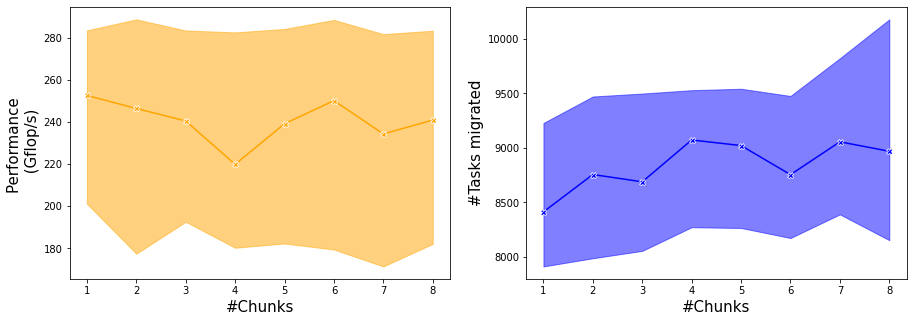

In [147]:



fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=1, ncols=2)

ax0 = fig.add_subplot(gs[0, 0])


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_pass_chunk_avg", ax=ax0, marker="X", linestyle='-', color = 'orange')
ax0.fill_between(sparse_GEMM_selection_chunk['chunk_size'], sparse_GEMM_selection_chunk['single_pass_chunk_min'], sparse_GEMM_selection_chunk['single_pass_chunk_max'], color = 'orange', alpha = 0.5)

ax0.set_xlabel('#Chunks', fontsize=15)
ax0.set_ylabel('Performance \n (Gflop/s)', fontsize=15)
#ax0.legend(loc='upper center', bbox_to_anchor=(0.5, 1.11), ncol=5, fancybox=True, shadow=True)


ax1 = fig.add_subplot(gs[0, 1])

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_pass_chunk_mig_tasks_avg", ax=ax1, marker="X", linestyle='-', color = 'blue')
ax1.fill_between(sparse_GEMM_selection_chunk['chunk_size'], sparse_GEMM_selection_chunk['single_pass_chunk_mig_tasks_min'], sparse_GEMM_selection_chunk['single_pass_chunk_mig_tasks_max'], color = 'blue', alpha = 0.5)


ax1.set_xlabel('#Chunks', fontsize=15)
ax1.set_ylabel('#Tasks migrated', fontsize=15)
#ax1.legend(loc='lower right')





plt.savefig('SPARSE_GEMM_chunk_single_pass.jpeg', dpi=300)

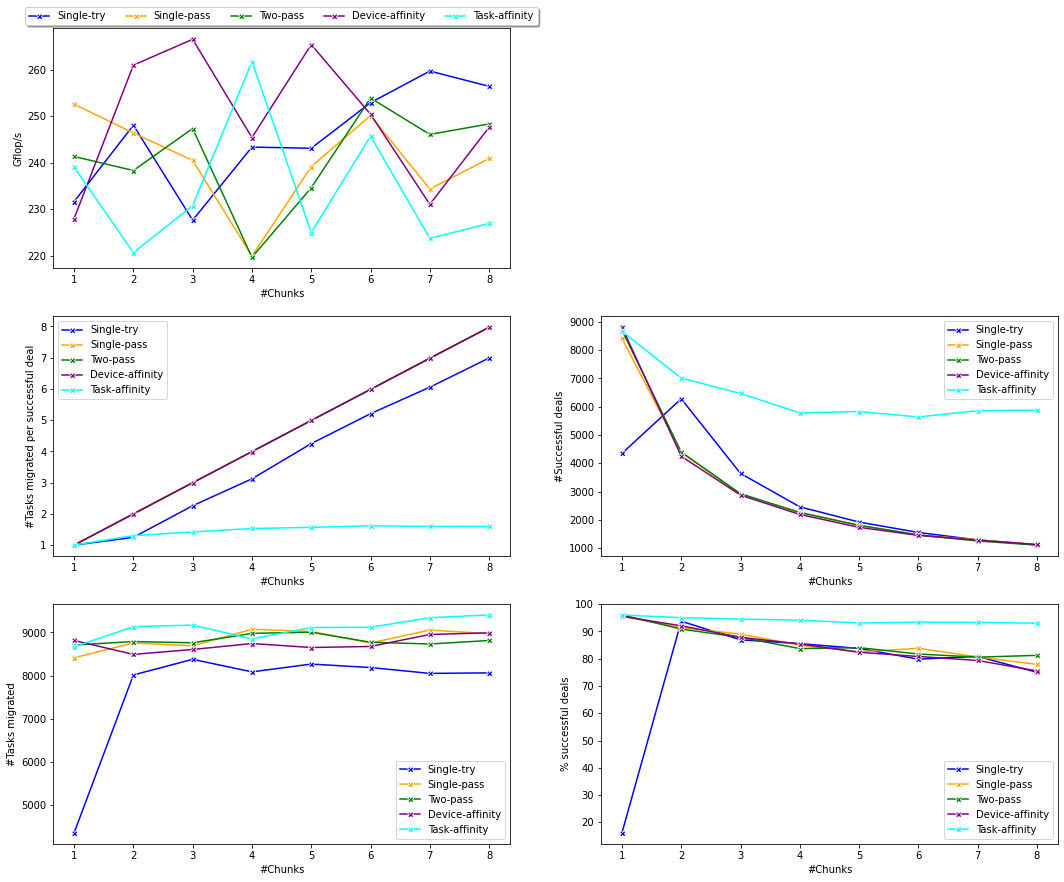

In [123]:



fig = plt.figure(figsize=(18, 15))
gs = GridSpec(nrows=3, ncols=2)

ax0 = fig.add_subplot(gs[0, 0])

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_try_chunk_avg", ax=ax0, marker="X", label='Single-try', linestyle='-', color = 'blue')
#ax0.fill_between(device, sparse_GEMM_selection_chunk['single_try_chunk_min'], sparse_GEMM_selection_chunk['single_try_chunk_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_pass_chunk_avg", ax=ax0, marker="X", label='Single-pass', linestyle='-', color = 'orange')
#ax0.fill_between(device, sparse_GEMM_selection_chunk['single_pass_chunk_min'], sparse_GEMM_selection_chunk['single_pass_chunk_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="two_pass_chunk_avg", ax=ax0, marker="X", label='Two-pass', linestyle='-', color = 'green')
#ax0.fill_between(device, sparse_GEMM_selection_chunk['two_pass_chunk_min'], sparse_GEMM_selection_chunk['two_pass_chunk_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="aff_only_chunk_avg", ax=ax0, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
#ax0.fill_between(device, sparse_GEMM_selection_chunk['aff_only_chunk_min'], sparse_GEMM_selection_chunk['aff_only_chunk_max'], color = 'purple', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="data_reuse_chunk_avg", ax=ax0, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
#ax0.fill_between(device, sparse_GEMM_selection_chunk['data_reuse_chunk_min'], sparse_GEMM_selection_chunk['data_reuse_chunk_max'], color = 'cyan', alpha = 0.5)


ax0.set_xlabel('#Chunks')
ax0.set_ylabel('Gflop/s')
ax0.legend(loc='upper center', bbox_to_anchor=(0.5, 1.11), ncol=5, fancybox=True, shadow=True)

#ax1 = fig.add_subplot(gs[0, 1])

#boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_try_chunk_deal_avg", ax=ax1, marker="X", label='Single-try', linestyle='-', color = 'blue')
#ax1.fill_between(device, sparse_GEMM_selection_chunk['single_try_chunk_deal_min'], sparse_GEMM_selection_chunk['single_try_chunk_deal_max'], color = 'blue', alpha = 0.5)

#boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_pass_chunk_deal_avg", ax=ax1, marker="X", label='Single-pass', linestyle='-', color = 'orange')
#ax1.fill_between(device, sparse_GEMM_selection_chunk['single_pass_chunk_deal_min'], sparse_GEMM_selection_chunk['single_pass_chunk_deal_max'], color = 'green', alpha = 0.5)

#boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="two_pass_chunk_deal_avg", ax=ax1, marker="X", label='Two-pass', linestyle='-', color = 'green')
#ax1.fill_between(device, sparse_GEMM_selection_chunk['two_pass_chunk_deal_min'], sparse_GEMM_selection_chunk['two_pass_chunk_deal_max'], color = 'green', alpha = 0.5)

#boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="aff_only_chunk_deal_avg", ax=ax1, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
#ax1.fill_between(device, sparse_GEMM_selection_chunk['aff_only_chunk_deal_min'], aff_only_chunk_deal_min['aff_only_chunk_max'], color = 'purple', alpha = 0.5)

#boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="data_reuse_chunk_deal_avg", ax=ax1, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
#ax1.fill_between(device, sparse_GEMM_selection_chunk['data_reuse_chunk_min'], sparse_GEMM_selection_chunk['data_reuse_chunk_max'], color = 'cyan', alpha = 0.5)

#ax1.set_xlabel('#Chunks')
#ax1.set_ylabel('#Deals')
#ax1.legend(loc='upper right')

ax2 = fig.add_subplot(gs[1, 0])

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_try_task_per_deal_min", ax=ax2, marker="X", label='Single-try', linestyle='-', color = 'blue')
#ax2.fill_between(device, sparse_GEMM_selection_chunk['single_try_task_per_deal_min'], sparse_GEMM_selection_chunk['single_try_task_per_deal_min'], color = 'blue', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_pass_task_per_deal_avg", ax=ax2, marker="X", label='Single-pass', linestyle='-', color = 'orange')
#ax2.fill_between(device, sparse_GEMM_selection_chunk['single_pass_task_per_deal_min'], sparse_GEMM_selection_chunk['single_pass_task_per_deal_min'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="two_pass_task_per_deal_avg", ax=ax2, marker="X", label='Two-pass', linestyle='-', color = 'green')
#ax2.fill_between(device, sparse_GEMM_selection_chunk['two_pass_task_per_deal_min'], sparse_GEMM_selection_chunk['two_pass_task_per_deal_max'], color = 'green', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="aff_only_task_per_deal_avg", ax=ax2, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
#ax2.fill_between(device, sparse_GEMM_selection_chunk['aff_only_task_per_deal_min'], aff_only_chunk_deal_min['aff_only_task_per_deal_max'], color = 'purple', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="data_reuse_task_per_deal_avg", ax=ax2, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
#ax2.fill_between(device, sparse_GEMM_selection_chunk['data_reuse_task_per_deal_min'], sparse_GEMM_selection_chunk['data_reuse_task_per_deal_max'], color = 'cyan', alpha = 0.5)


ax2.set_xlabel('#Chunks')
ax2.set_ylabel('#Tasks migrated per successful deal')
ax2.legend(loc='upper left')

ax3 = fig.add_subplot(gs[1, 1])


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_try_chunk_succ_deal_avg", ax=ax3, marker="X", label='Single-try', linestyle='-', color = 'blue')
#ax3.fill_between(device, sparse_GEMM_selection_chunk['single_try_chunk_succ_deal_min'], sparse_GEMM_selection_chunk['single_try_chunk_succ_deal_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_pass_chunk_succ_deal_avg", ax=ax3, marker="X", label='Single-pass', linestyle='-', color = 'orange')
#ax3.fill_between(device, sparse_GEMM_selection_chunk['single_pass_chunk_succ_deal_min'], sparse_GEMM_selection_chunk['single_pass_chunk_succ_deal_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="two_pass_chunk_succ_deal_avg", ax=ax3, marker="X", label='Two-pass', linestyle='-', color = 'green')
#ax3.fill_between(device, sparse_GEMM_selection_chunk['two_pass_chunk_succ_deal_min'], sparse_GEMM_selection_chunk['two_pass_chunk_succ_deal_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="aff_only_chunk_succ_deal_avg", ax=ax3, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
#ax3.fill_between(device, sparse_GEMM_selection_chunk['aff_only_chunk_succ_deal_min'], aff_only_chunk_deal_min['aff_only_chunk_succ_deal_max'], color = 'purple', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="data_reuse_chunk_succ_deal_avg", ax=ax3, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
#ax3.fill_between(device, sparse_GEMM_selection_chunk['data_reuse_chunk_succ_deal_min'], sparse_GEMM_selection_chunk['data_reuse_chunk_succ_deal_max'], color = 'cyan', alpha = 0.5)


ax3.set_xlabel('#Chunks')
ax3.set_ylabel('#Successful deals')
ax3.legend(loc='upper right')


ax4 = fig.add_subplot(gs[2, 0])

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_try_chunk_mig_tasks_avg", ax=ax4, marker="X", label='Single-try', linestyle='-', color = 'blue')
#ax4.fill_between(device, sparse_GEMM_selection_chunk['single_try_chunk_mig_tasks_min'], sparse_GEMM_selection_chunk['single_try_chunk_mig_tasks_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_pass_chunk_mig_tasks_avg", ax=ax4, marker="X", label='Single-pass', linestyle='-', color = 'orange')
#ax4.fill_between(device, sparse_GEMM_selection_chunk['single_pass_chunk_mig_tasks_min'], sparse_GEMM_selection_chunk['single_pass_chunk_mig_tasks_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="two_pass_chunk_mig_tasks_avg", ax=ax4, marker="X", label='Two-pass', linestyle='-', color = 'green')
#ax4.fill_between(device, sparse_GEMM_selection_chunk['two_pass_chunk_mig_tasks_min'], sparse_GEMM_selection_chunk['two_pass_chunk_mig_tasks_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="aff_only_chunk_mig_tasks_avg", ax=ax4, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
#ax4.fill_between(device, sparse_GEMM_selection_chunk['aff_only_chunk_mig_tasks_min'], aff_only_chunk_deal_min['aff_only_chunk_mig_tasks_max'], color = 'purple', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="data_reuse_chunk_mig_tasks_avg", ax=ax4, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
#ax4.fill_between(device, sparse_GEMM_selection_chunk['data_reuse_chunk_mig_tasks_min'], sparse_GEMM_selection_chunk['data_reuse_chunk_mig_tasks_max'], color = 'cyan', alpha = 0.5)





ax4.set_xlabel('#Chunks')
ax4.set_ylabel('#Tasks migrated')
ax4.legend(loc='lower right')

ax5 = fig.add_subplot(gs[2, 1])

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_try_chunk_perc_succ_avg", ax=ax5, marker="X", label='Single-try', linestyle='-', color = 'blue')
#ax5.fill_between(device, sparse_GEMM_selection_chunk['single_try_chunk_perc_succ_min'], sparse_GEMM_selection_chunk['single_try_chunk_perc_succ_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_pass_chunk_perc_succ_avg", ax=ax5, marker="X", label='Single-pass', linestyle='-', color = 'orange')
#ax5.fill_between(device, sparse_GEMM_selection_chunk['single_pass_chunk_perc_succ_min'], sparse_GEMM_selection_chunk['single_pass_chunk_perc_succ_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="two_pass_chunk_perc_succ_avg", ax=ax5, marker="X", label='Two-pass', linestyle='-', color = 'green')
#ax5.fill_between(device, sparse_GEMM_selection_chunk['two_pass_chunk_perc_succ_min'], sparse_GEMM_selection_chunk['two_pass_chunk_perc_succ_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="aff_only_chunk_perc_succ_avg", ax=ax5, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
#ax5.fill_between(device, sparse_GEMM_selection_chunk['aff_only_chunk_perc_succ_min'], aff_only_chunk_deal_min['aff_only_chunk_perc_succ_max'], color = 'purple', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="data_reuse_chunk_perc_succ_avg", ax=ax5, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
#ax5.fill_between(device, sparse_GEMM_selection_chunk['data_reuse_chunk_perc_succ_min'], sparse_GEMM_selection_chunk['data_reuse_chunk_perc_succ_max'], color = 'cyan', alpha = 0.5)





ax5.set_xlabel('#Chunks')
ax5.set_ylabel('% successful deals')
ax5.legend(loc='lower right')



plt.savefig('SPARSE_GEMM_chunk_selection.jpeg', dpi=300)

ValueError: operands could not be broadcast together with shapes (7,) (8,) 

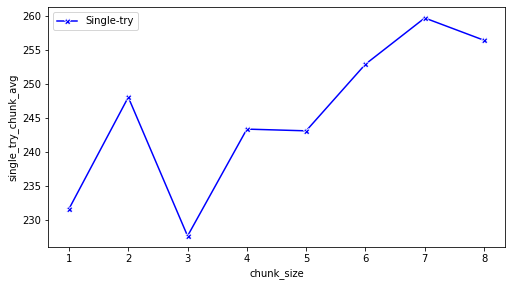

In [125]:



fig = plt.figure(figsize=(18, 15))
gs = GridSpec(nrows=3, ncols=2)

ax0 = fig.add_subplot(gs[0, 0])

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_try_chunk_avg", ax=ax0, marker="X", label='Single-try', linestyle='-', color = 'blue')
ax0.fill_between(device, sparse_GEMM_selection_chunk['single_try_chunk_min'], sparse_GEMM_selection_chunk['single_try_chunk_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_pass_chunk_avg", ax=ax0, marker="X", label='Single-pass', linestyle='-', color = 'orange')
ax0.fill_between(device, sparse_GEMM_selection_chunk['single_pass_chunk_min'], sparse_GEMM_selection_chunk['single_pass_chunk_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="two_pass_chunk_avg", ax=ax0, marker="X", label='Two-pass', linestyle='-', color = 'green')
ax0.fill_between(device, sparse_GEMM_selection_chunk['two_pass_chunk_min'], sparse_GEMM_selection_chunk['two_pass_chunk_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="aff_only_chunk_avg", ax=ax0, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
ax0.fill_between(device, sparse_GEMM_selection_chunk['aff_only_chunk_min'], sparse_GEMM_selection_chunk['aff_only_chunk_max'], color = 'purple', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="data_reuse_chunk_avg", ax=ax0, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
ax0.fill_between(device, sparse_GEMM_selection_chunk['data_reuse_chunk_min'], sparse_GEMM_selection_chunk['data_reuse_chunk_max'], color = 'cyan', alpha = 0.5)


ax0.set_xlabel('#Chunks')
ax0.set_ylabel('Gflop/s')
ax0.legend(loc='upper center', bbox_to_anchor=(0.5, 1.11), ncol=5, fancybox=True, shadow=True)

ax1 = fig.add_subplot(gs[0, 1])

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_try_chunk_deal_avg", ax=ax1, marker="X", label='Single-try', linestyle='-', color = 'blue')
#ax1.fill_between(device, sparse_GEMM_selection_chunk['single_try_chunk_deal_min'], sparse_GEMM_selection_chunk['single_try_chunk_deal_max'], color = 'blue', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_pass_chunk_deal_avg", ax=ax1, marker="X", label='Single-pass', linestyle='-', color = 'orange')
#ax1.fill_between(device, sparse_GEMM_selection_chunk['single_pass_chunk_deal_min'], sparse_GEMM_selection_chunk['single_pass_chunk_deal_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="two_pass_chunk_deal_avg", ax=ax1, marker="X", label='Two-pass', linestyle='-', color = 'green')
#ax1.fill_between(device, sparse_GEMM_selection_chunk['two_pass_chunk_deal_min'], sparse_GEMM_selection_chunk['two_pass_chunk_deal_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="aff_only_chunk_deal_avg", ax=ax1, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
#ax1.fill_between(device, sparse_GEMM_selection_chunk['aff_only_chunk_deal_min'], aff_only_chunk_deal_min['aff_only_chunk_max'], color = 'purple', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="data_reuse_chunk_deal_avg", ax=ax1, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
#ax1.fill_between(device, sparse_GEMM_selection_chunk['data_reuse_chunk_min'], sparse_GEMM_selection_chunk['data_reuse_chunk_max'], color = 'cyan', alpha = 0.5)

ax1.set_xlabel('#Chunks')
ax1.set_ylabel('#Deals')
ax1.legend(loc='upper right')

ax2 = fig.add_subplot(gs[1, 0])

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_try_task_per_deal_min", ax=ax2, marker="X", label='Single-try', linestyle='-', color = 'blue')
#ax2.fill_between(device, sparse_GEMM_selection_chunk['single_try_task_per_deal_min'], sparse_GEMM_selection_chunk['single_try_task_per_deal_min'], color = 'blue', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_pass_task_per_deal_avg", ax=ax2, marker="X", label='Single-pass', linestyle='-', color = 'orange')
#ax2.fill_between(device, sparse_GEMM_selection_chunk['single_pass_task_per_deal_min'], sparse_GEMM_selection_chunk['single_pass_task_per_deal_min'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="two_pass_task_per_deal_avg", ax=ax2, marker="X", label='Two-pass', linestyle='-', color = 'green')
#ax2.fill_between(device, sparse_GEMM_selection_chunk['two_pass_task_per_deal_min'], sparse_GEMM_selection_chunk['two_pass_task_per_deal_max'], color = 'green', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="aff_only_task_per_deal_avg", ax=ax2, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
#ax2.fill_between(device, sparse_GEMM_selection_chunk['aff_only_task_per_deal_min'], aff_only_chunk_deal_min['aff_only_task_per_deal_max'], color = 'purple', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="data_reuse_task_per_deal_avg", ax=ax2, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
#ax2.fill_between(device, sparse_GEMM_selection_chunk['data_reuse_task_per_deal_min'], sparse_GEMM_selection_chunk['data_reuse_task_per_deal_max'], color = 'cyan', alpha = 0.5)


ax2.set_xlabel('#Chunks')
ax2.set_ylabel('#Tasks migrated per successful deal')
ax2.legend(loc='upper left')

ax3 = fig.add_subplot(gs[1, 1])


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_try_chunk_succ_deal_avg", ax=ax3, marker="X", label='Single-try', linestyle='-', color = 'blue')
#ax3.fill_between(device, sparse_GEMM_selection_chunk['single_try_chunk_succ_deal_min'], sparse_GEMM_selection_chunk['single_try_chunk_succ_deal_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_pass_chunk_succ_deal_avg", ax=ax3, marker="X", label='Single-pass', linestyle='-', color = 'orange')
#ax3.fill_between(device, sparse_GEMM_selection_chunk['single_pass_chunk_succ_deal_min'], sparse_GEMM_selection_chunk['single_pass_chunk_succ_deal_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="two_pass_chunk_succ_deal_avg", ax=ax3, marker="X", label='Two-pass', linestyle='-', color = 'green')
#ax3.fill_between(device, sparse_GEMM_selection_chunk['two_pass_chunk_succ_deal_min'], sparse_GEMM_selection_chunk['two_pass_chunk_succ_deal_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="aff_only_chunk_succ_deal_avg", ax=ax3, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
#ax3.fill_between(device, sparse_GEMM_selection_chunk['aff_only_chunk_succ_deal_min'], aff_only_chunk_deal_min['aff_only_chunk_succ_deal_max'], color = 'purple', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="data_reuse_chunk_succ_deal_avg", ax=ax3, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
#ax3.fill_between(device, sparse_GEMM_selection_chunk['data_reuse_chunk_succ_deal_min'], sparse_GEMM_selection_chunk['data_reuse_chunk_succ_deal_max'], color = 'cyan', alpha = 0.5)


ax3.set_xlabel('#Chunks')
ax3.set_ylabel('#Successful deals')
ax3.legend(loc='upper right')


ax4 = fig.add_subplot(gs[2, 0])

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_try_chunk_mig_tasks_avg", ax=ax4, marker="X", label='Single-try', linestyle='-', color = 'blue')
#ax4.fill_between(device, sparse_GEMM_selection_chunk['single_try_chunk_mig_tasks_min'], sparse_GEMM_selection_chunk['single_try_chunk_mig_tasks_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_pass_chunk_mig_tasks_avg", ax=ax4, marker="X", label='Single-pass', linestyle='-', color = 'orange')
#ax4.fill_between(device, sparse_GEMM_selection_chunk['single_pass_chunk_mig_tasks_min'], sparse_GEMM_selection_chunk['single_pass_chunk_mig_tasks_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="two_pass_chunk_mig_tasks_avg", ax=ax4, marker="X", label='Two-pass', linestyle='-', color = 'green')
#ax4.fill_between(device, sparse_GEMM_selection_chunk['two_pass_chunk_mig_tasks_min'], sparse_GEMM_selection_chunk['two_pass_chunk_mig_tasks_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="aff_only_chunk_mig_tasks_avg", ax=ax4, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
#ax4.fill_between(device, sparse_GEMM_selection_chunk['aff_only_chunk_mig_tasks_min'], aff_only_chunk_deal_min['aff_only_chunk_mig_tasks_max'], color = 'purple', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="data_reuse_chunk_mig_tasks_avg", ax=ax4, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
#ax4.fill_between(device, sparse_GEMM_selection_chunk['data_reuse_chunk_mig_tasks_min'], sparse_GEMM_selection_chunk['data_reuse_chunk_mig_tasks_max'], color = 'cyan', alpha = 0.5)





ax4.set_xlabel('#Chunks')
ax4.set_ylabel('#Tasks migrated')
ax4.legend(loc='lower right')

ax5 = fig.add_subplot(gs[2, 1])

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_try_chunk_perc_succ_avg", ax=ax5, marker="X", label='Single-try', linestyle='-', color = 'blue')
#ax5.fill_between(device, sparse_GEMM_selection_chunk['single_try_chunk_perc_succ_min'], sparse_GEMM_selection_chunk['single_try_chunk_perc_succ_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="single_pass_chunk_perc_succ_avg", ax=ax5, marker="X", label='Single-pass', linestyle='-', color = 'orange')
#ax5.fill_between(device, sparse_GEMM_selection_chunk['single_pass_chunk_perc_succ_min'], sparse_GEMM_selection_chunk['single_pass_chunk_perc_succ_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="two_pass_chunk_perc_succ_avg", ax=ax5, marker="X", label='Two-pass', linestyle='-', color = 'green')
#ax5.fill_between(device, sparse_GEMM_selection_chunk['two_pass_chunk_perc_succ_min'], sparse_GEMM_selection_chunk['two_pass_chunk_perc_succ_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="aff_only_chunk_perc_succ_avg", ax=ax5, marker="X", label='Device-affinity', linestyle='-', color = 'purple')
#ax5.fill_between(device, sparse_GEMM_selection_chunk['aff_only_chunk_perc_succ_min'], aff_only_chunk_deal_min['aff_only_chunk_perc_succ_max'], color = 'purple', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_selection_chunk, x="chunk_size", y="data_reuse_chunk_perc_succ_avg", ax=ax5, marker="X", label='Task-affinity', linestyle='-', color = 'cyan')
#ax5.fill_between(device, sparse_GEMM_selection_chunk['data_reuse_chunk_perc_succ_min'], sparse_GEMM_selection_chunk['data_reuse_chunk_perc_succ_max'], color = 'cyan', alpha = 0.5)





ax5.set_xlabel('#Chunks')
ax5.set_ylabel('% successful deals')
ax5.legend(loc='lower right')



plt.savefig('SPARSE_GEMM_chunk_selection.jpeg', dpi=300)

r -c 40 -g 4 -p 1 -q 1 -t 1000 -T 1000 -N 100000 --nruns=2 -- --mca device_cuda_enabled 4 --mca device_show_statistics 1 --mca device_cuda_migrate_statistics 1 --mca device_cuda_migrate_chunk_size 1 --mca device_cuda_migrate_chunk_size 1 --mca device_cuda_migrate_tasks 2 --mca device_cuda_iterative 0 --mca device_cuda_migrate_task_selection 1 --mca device_cuda_max_streams 6 --mca device_cuda_delegate_task_completion 0 --mca device_cuda_unfair_mapping 0
Starting program: /home/mannaparambil/dplasma/build/tests/testing_dgemm -c 40 -g 4 -p 1 -q 1 -t 1000 -T 1000 -N 100000 --nruns=2 -- --mca device_cuda_enabled 4 --mca device_show_statistics 1 --mca device_cuda_migrate_statistics 1 --mca device_cuda_migrate_chunk_size 1 --mca device_cuda_migrate_chunk_size 1 --mca device_cuda_migrate_tasks 2 --mca device_cuda_iterative 0 --mca device_cuda_migrate_task_selection 1 --mca device_cuda_max_streams 6 --mca device_cuda_delegate_task_completion 0 --mca device_cuda_unfair_mapping 0


## Iterative 

In [56]:
device = [1, 2, 3, 4, 5, 6, 7, 8]

gflops_normal_mig_min   = [37.932523, 73.330012, 97.398613, 208.72241842, 141.387142, 183.345503938, 180.469527341, 125.463297]
gflops_normal_mig_max   = [45.904818, 80.477575, 122.56126, 227.93500981, 176.011516, 204.795184533, 186.120396836, 174.822836]
gflops_normal_mig_avg   = [43.809329, 77.510837, 110.39721, 217.81739963, 159.408182, 192.262687345, 183.218919309, 153.171030]

gflops_iter_map_mig_min = [38.025296, 74.601282, 100.422287, 119.421707, 134.175616, 135.773201, 137.407521, 134.861962]
gflops_iter_map_mig_max = [47.945551, 83.293811, 124.363326, 153.396438, 178.223927, 190.727765, 186.489978, 188.933425]
gflops_iter_map_mig_avg = [42.579309, 81.106073, 116.686093, 140.892740, 154.015638, 163.582160, 159.243001, 156.103651]

gflops_iter_map_all_min = [37.747484, 67.668989, 96.973888, 114.798984, 142.439317, 127.015361, 139.694465, 132.289401]
gflops_iter_map_all_max = [47.594601, 81.513454, 123.09664, 155.257183, 177.036449, 176.932945, 182.450452, 184.777709]
gflops_iter_map_all_avg = [45.516775, 77.578621, 115.13413, 140.448289, 159.240508, 160.708795, 167.054872, 152.0688949]


In [57]:

sparse_GEMM_data_iterative = {
                    'device': device,
                    'gflops_normal_mig_min':gflops_normal_mig_min,
                    'gflops_normal_mig_max':gflops_normal_mig_max,
                    'gflops_normal_mig_avg':gflops_normal_mig_avg,
    
                    'gflops_iter_map_mig_min':gflops_iter_map_mig_min,
                    'gflops_iter_map_mig_max':gflops_iter_map_mig_max,
                    'gflops_iter_map_mig_avg':gflops_iter_map_mig_avg,
    
                    'gflops_iter_map_all_min':gflops_iter_map_all_min,
                    'gflops_iter_map_all_max':gflops_iter_map_all_max,
                    'gflops_iter_map_all_avg':gflops_iter_map_all_avg
                    
    
                   
                   }

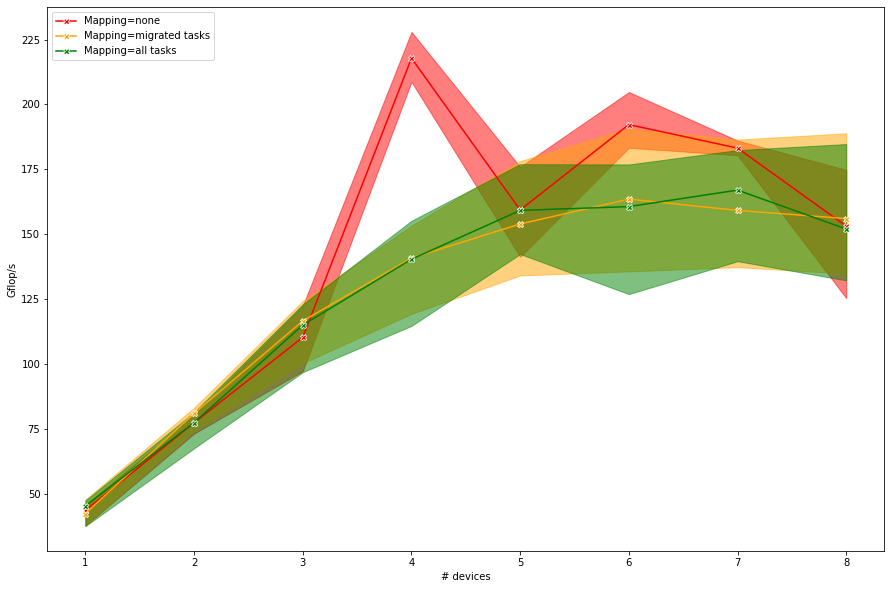

In [58]:
fig,ax = plt.subplots( figsize=(15, 10))


boxplot = sns.lineplot(data=sparse_GEMM_data_iterative, x="device", y="gflops_normal_mig_avg", ax=ax, marker="X", label='Mapping=none', linestyle='-', color = 'red')
ax.fill_between(device, sparse_GEMM_data_iterative['gflops_normal_mig_min'], sparse_GEMM_data_iterative['gflops_normal_mig_max'], color = 'red', alpha = 0.5)

boxplot = sns.lineplot(data=sparse_GEMM_data_iterative, x="device", y="gflops_iter_map_mig_avg", ax=ax, marker="X", label='Mapping=migrated tasks', linestyle='-', color = 'orange')
ax.fill_between(device, sparse_GEMM_data_iterative['gflops_iter_map_mig_min'], sparse_GEMM_data_iterative['gflops_iter_map_mig_max'], color = 'orange', alpha = 0.5)


boxplot = sns.lineplot(data=sparse_GEMM_data_iterative, x="device", y="gflops_iter_map_all_avg", ax=ax, marker="X", label='Mapping=all tasks', linestyle='-', color = 'green')
ax.fill_between(device, sparse_GEMM_data_iterative['gflops_iter_map_all_min'], sparse_GEMM_data_iterative['gflops_iter_map_all_max'], color = 'green', alpha = 0.5)


ax.set_xlabel('# devices')
ax.set_ylabel('Gflop/s')

plt.legend(loc='upper left')

plt.savefig('SPARSE_GEMM_iterative.jpeg', dpi=300)

* imbalance is calculated as std dev. divided by the total number of tasks

### eviction on different selection policy (devices=2, chunk=1)


In [59]:

selection_type =  ['Single-try', 'Single-pass', 'Two-pass', 'Affinity-only', 'Data-reuse', 'No-Mig']
total_eviction  = [48199, 48923, 49429, 50242, 48400, 54870]
total_stagein_init = [121188, 121215, 121239, 121194, 121206, 121188]
total_stagein_req = [56151, 55882, 49429, 57143, 55132, 58581]
perc_eviction_wrt_stagein_init = [39.77, 40.36, 40.76, 41.45, 39.93, 45.2]
perc_eviction_wrt_stagein_req = [85.83, 87.54, 88.38, 87.92, 87.78, 93.66]





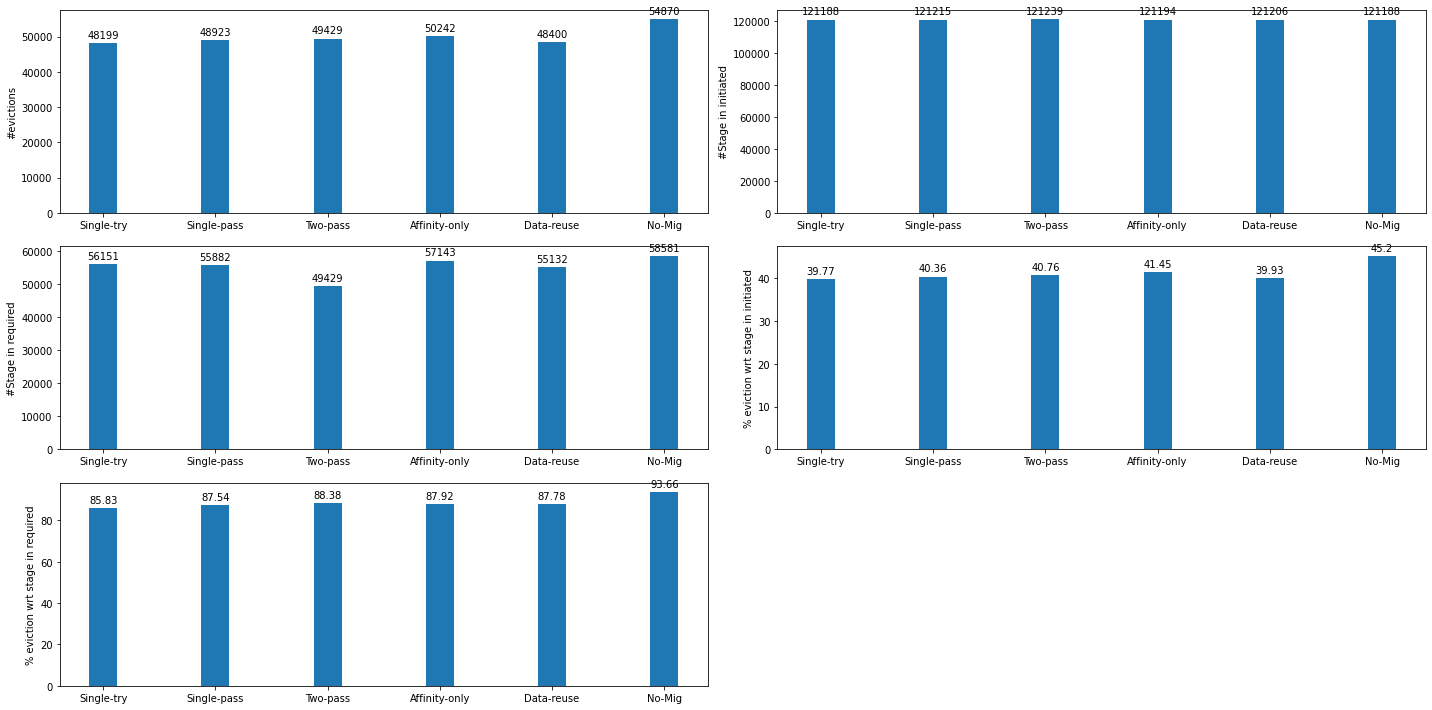

In [60]:
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(nrows=3, ncols=2)

x = np.arange(len(selection_type))  # the label locations
width = 0.35  # the width of the bars

ax0 = fig.add_subplot(gs[0, 0])
rects1 = ax0.bar(x , total_eviction, width = 0.25)
ax0.set_xticks(x, selection_type)
ax0.bar_label(rects1, padding=3)
ax0.set_ylabel('#evictions')

ax1 = fig.add_subplot(gs[0, 1])
rects1 = ax1.bar(x , total_stagein_init, width = 0.25)
ax1.set_xticks(x, selection_type)
ax1.bar_label(rects1, padding=3)
ax1.set_ylabel('#Stage in initiated')

ax2 = fig.add_subplot(gs[1, 0])
rects1 = ax2.bar(x , total_stagein_req, width = 0.25)
ax2.set_xticks(x, selection_type)
ax2.bar_label(rects1, padding=3)
ax2.set_ylabel('#Stage in required')



ax3 = fig.add_subplot(gs[1, 1])
rects1 = ax3.bar(x , perc_eviction_wrt_stagein_init, width = 0.25)
ax3.set_xticks(x, selection_type)
ax3.bar_label(rects1, padding=3)
ax3.set_ylabel('% eviction wrt stage in initiated')

ax3 = fig.add_subplot(gs[2, 0])
rects1 = ax3.bar(x , perc_eviction_wrt_stagein_req, width = 0.25)
ax3.set_xticks(x, selection_type)
ax3.bar_label(rects1, padding=3)
ax3.set_ylabel('% eviction wrt stage in required')

fig.tight_layout()
plt.savefig('Sparse_GEMMevictions.jpeg')



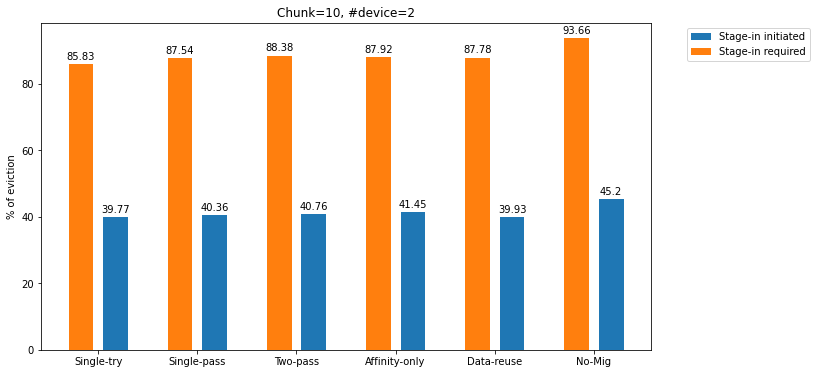

In [61]:
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(nrows=2, ncols=2)


x = np.arange(len(selection_type))  # the label locations
width = 0.35  # the width of the bars

ax0 = fig.add_subplot(gs[0, 0])
rects1 = ax0.bar(x + width/2, perc_eviction_wrt_stagein_init, width = 0.25, label='Stage-in initiated')
rects2 = ax0.bar(x - width/2, perc_eviction_wrt_stagein_req, width = 0.25, label='Stage-in required')
ax0.set_xticks(x, selection_type)
ax0.legend()
ax0.bar_label(rects1, padding=3)
ax0.bar_label(rects2, padding=3)
ax0.set_ylabel('% of eviction')
ax0.set_title('Chunk=10, #device=2')

ax0.legend( bbox_to_anchor=(1.05, 1.0), loc='upper left')

fig.tight_layout()
plt.savefig('Sparse_GEMM_evictions.jpeg')



* eviction does not seem to differ by much

### Effect of selection avg task migrated (devices=2, chunk=10)

In [62]:
selection_type =  ['Single-try', 'Single-pass', 'Two-pass', 'Affinity-only', 'Data-reuse']
avg_task_per_deal = [9.17, 9.01, 9.40, 8.92, 1.69]
avg_task_per_success_deal = [9.47, 9.98, 9.99, 9.98, 1.72]


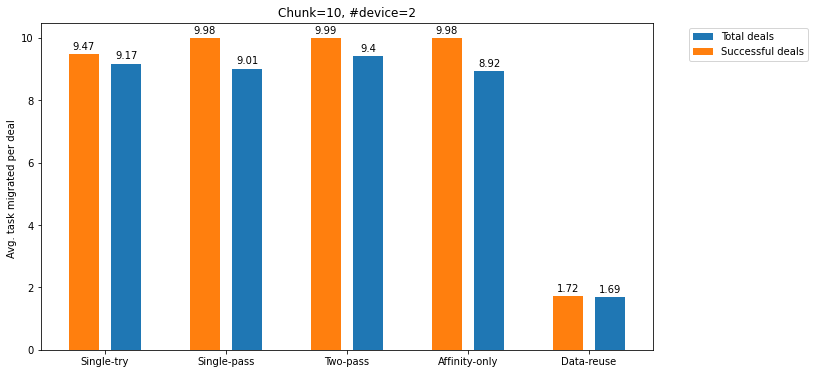

In [63]:
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(nrows=2, ncols=2)


x = np.arange(len(selection_type))  # the label locations
width = 0.35  # the width of the bars

ax0 = fig.add_subplot(gs[0, 0])
rects1 = ax0.bar(x + width/2, avg_task_per_deal, width = 0.25, label='Total deals')
rects2 = ax0.bar(x - width/2, avg_task_per_success_deal, width = 0.25, label='Successful deals')
ax0.set_xticks(x, selection_type)
ax0.legend()
ax0.bar_label(rects1, padding=3)
ax0.bar_label(rects2, padding=3)
ax0.set_ylabel('Avg. task migrated per deal ')
ax0.set_title('Chunk=10, #device=2')

ax0.legend( bbox_to_anchor=(1.05, 1.0), loc='upper left')

fig.tight_layout()
plt.savefig('Sparse_GEMM_avg_task_mig.jpeg')

* avg task migrated is very low for data reuse

### delegation of Migration

In [64]:
selection_type =  ['Single-try', 'Single-pass', 'Two-pass', 'Affinity-only', 'Data-reuse']

migration_delegated_chunk_1 = [131.270954, 125.484183, 114.025156, 130.951687, 130.544260]
migration_no_delegated_chunk_1 = [135.270010, 118.064186, 131.403639, 118.395494, 120.682181]

migration_delegated_chunk_5 = [140.084339, 130.612200, 130.950042, 120.812464, 120.812464]
migration_no_delegated_chunk_5 = [141.798821, 129.226476, 127.256073, 117.050999, 120.608852]

migration_delegated_chunk_10 = [125.509208, 121.079270, 130.624015,142.806640, 117.631480]
migration_no_delegated_chunk_10 = [137.360990, 130.484843, 131.828211, 121.835254, 124.068023]

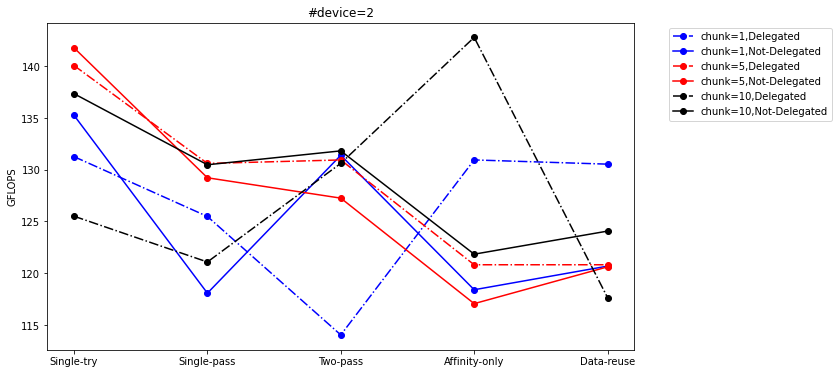

In [65]:
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(nrows=2, ncols=2)


x = np.arange(len(selection_type))  # the label locations
width = 0.35  # the width of the bars

ax0 = fig.add_subplot(gs[0, 0])

rects1 = ax0.plot(x, migration_delegated_chunk_1, linestyle='-.', marker='o', color='blue', label='chunk=1,Delegated')
rects2 = ax0.plot(x, migration_no_delegated_chunk_1, linestyle='-', marker='o', color='blue', label='chunk=1,Not-Delegated')

rects3 = ax0.plot(x, migration_delegated_chunk_5, linestyle='-.', marker='o', color='red', label='chunk=5,Delegated')
rects4 = ax0.plot(x, migration_no_delegated_chunk_5,  linestyle='-', marker='o', color='red',label='chunk=5,Not-Delegated')

rects5 = ax0.plot(x, migration_delegated_chunk_10, linestyle='-.', marker='o', color='black', label='chunk=10,Delegated')
rects6 = ax0.plot(x, migration_no_delegated_chunk_10, linestyle='-', marker='o', color='black', label='chunk=10,Not-Delegated')

ax0.set_xticks(x, selection_type)
ax0.legend()
#ax0.bar_label(rects1, padding=3)
#ax0.bar_label(rects2, padding=3)
ax0.set_ylabel('GFLOPS')
ax0.set_title('#device=2')

ax0.legend( bbox_to_anchor=(1.05, 1.0), loc='upper left')

fig.tight_layout()
plt.savefig('Sparse_GEMM_delagted_mig.jpeg')

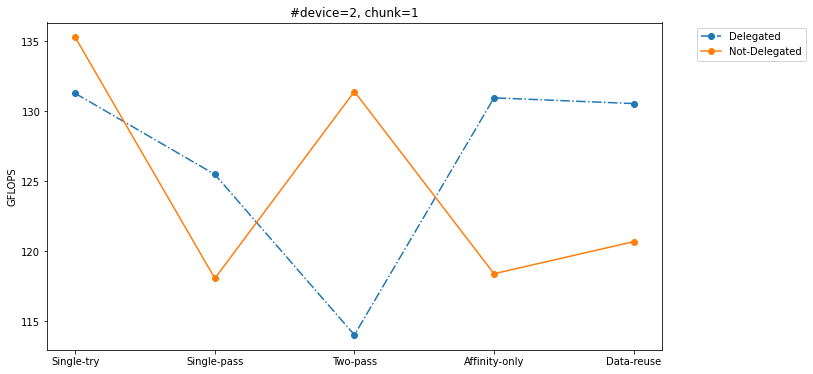

In [66]:
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(nrows=2, ncols=2)


x = np.arange(len(selection_type))  # the label locations
width = 0.35  # the width of the bars

ax0 = fig.add_subplot(gs[0, 0])

rects1 = ax0.plot(x, migration_delegated_chunk_1, linestyle='-.', marker='o', label='Delegated')
rects2 = ax0.plot(x, migration_no_delegated_chunk_1, linestyle='-', marker='o', label='Not-Delegated')

ax0.set_xticks(x, selection_type)
ax0.legend()
#ax0.bar_label(rects1, padding=3)
#ax0.bar_label(rects2, padding=3)
ax0.set_ylabel('GFLOPS')
ax0.set_title('#device=2, chunk=1')

ax0.legend( bbox_to_anchor=(1.05, 1.0), loc='upper left')

fig.tight_layout()
plt.savefig('Sparse_GEMM_delagted_mig.jpeg')

* Delegating task migration, to a different thread, does not seem to imrprove performance
* GFLOPS variation is within the observed limit 
* Why 
 * When there is contention for queues, master thread is idle without progressing a task. 
 * This is equivalant to master thread not progressing a task while it is migrating tasks

## variation in No-MIG 

In [67]:
nomig = [71.071880, 82.884131, 82.056498, 78.987838, 71.337245, 67.583333, 71.571296, 72.026433, 71.318324, 70.851745]


### confidence interval: Method 1

In [68]:
m = np.mean(nomig) 
print('Mean')
print(m)
s = np.std(nomig) 
print('Stddev')
print(s)
dof = len(nomig)-1 
confidence = 0.95

Mean
73.9688723
Stddev
5.024320989713498


In [69]:
t_crit = np.abs(t.ppf((1-confidence)/2,dof))

In [70]:
conf_intrvl = list( (m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))) )
print(conf_intrvl)

[68.88593035496186, 79.05181424503814]


### confidence interval: Method 2

In [71]:
np.percentile(nomig,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])


array([68.319, 82.698])

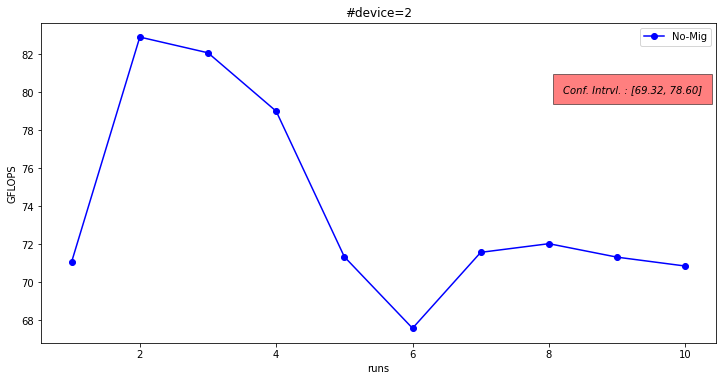

In [72]:
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(nrows=2, ncols=2)


x = np.arange(1, len(nomig)+1)  # the label locations
width = 0.35  # the width of the bars

ax0 = fig.add_subplot(gs[0, 0])

rects1 = ax0.plot(x, nomig, linestyle='-', marker='o', color='blue', label='No-Mig')

ax0.set_ylabel('GFLOPS')
ax0.set_xlabel('runs')
ax0.set_title('#device=2')
ax0.legend()
ax0.text(8.2, 80, 'Conf. Intrvl. : [69.32, 78.60]', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

fig.tight_layout()
plt.savefig('Sparse_GEMM_delagted_nomig.jpeg')

## variation in MIG 

In [73]:
#chunk=1,select=1try,migration=delegated
mig = [119.394076, 130.380272, 133.383638, 119.554375, 130.035792, 131.245002, 134.798143, 135.199316, 135.007015, 134.156841]

### confidence interval: Method 1

In [74]:
m = np.mean(mig) 
print('Mean')
print(m)
s = np.std(mig) 
print('Stddev')
print(s)
dof = len(mig)-1 
confidence = 0.95

Mean
130.315447
Stddev
5.7109644616160775


In [75]:
t_crit = np.abs(t.ppf((1-confidence)/2,dof))

In [76]:
conf_intrvl = list( (m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))) )
print(conf_intrvl)

[126.23006913273323, 134.40082486726678]


### confidence interval: Method 2

In [77]:
np.percentile(mig,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])

array([119.43 , 135.156])

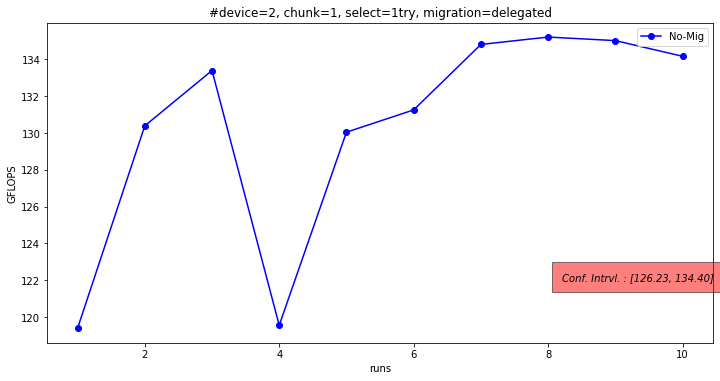

In [78]:
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(nrows=2, ncols=2)


x = np.arange(1, len(mig)+1)  # the label locations
width = 0.35  # the width of the bars

ax0 = fig.add_subplot(gs[0, 0])

rects1 = ax0.plot(x, mig, linestyle='-', marker='o', color='blue', label='No-Mig')

ax0.set_ylabel('GFLOPS')
ax0.set_xlabel('runs')
ax0.set_title('#device=2, chunk=1, select=1try, migration=delegated')
ax0.legend()
ax0.text(8.2, 122, 'Conf. Intrvl. : [126.23, 134.40]', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

fig.tight_layout()
plt.savefig('Sparse_GEMM_delagted_mig.jpeg')

## Matrix Market

In [79]:
# https://sparse.tamu.edu/Rajat/rajat14

In [80]:
dev_8_tasks = [34500, 32920, 31684, 33168, 32676, 31320, 9564, 13292 ]
mean = np.mean(dev_8_tasks)
print('mean')
print(mean)
      
std = np.std(dev_8_tasks)
print('std')
print(std)
      
imb = std/mean
print('imb')
print(imb)

mean
27390.5
std
9306.337182264568
imb
0.33976514420198856


In [81]:
MM_mig = [1132.089493, 1083.245866, 1141.566118, 1200.357953]
MM_nomig = [949.532391,  1064.582067, 677.274285, 887.427574]

In [82]:
perf_nomig = np.mean(MM_nomig)
perf_mig = np.mean(MM_mig)

In [83]:
speedup = perf_mig / perf_nomig
print(speedup)

1.273398527985978


# Real Matrix

In [84]:
dev_2_tasks = [1855430, 1831188]
mean = np.mean(dev_2_tasks)
print('mean')
print(mean)
      
std = np.std(dev_2_tasks)
print('std')
print(std)
      
imb_2 = std/mean
print('imb')
print(imb_2)

mean
1843309.0
std
12121.0
imb
0.006575674507095663


In [85]:
dev_3_tasks = [1199076, 1227052, 1260490]
mean = np.mean(dev_3_tasks)
print('mean')
print(mean)
      
std = np.std(dev_3_tasks)
print('std')
print(std)
      
imb_3 = std/mean
print('imb')
print(imb_3)

mean
1228872.6666666667
std
25105.191618910663
imb
0.020429449120232143


In [86]:
dev_4_tasks = [926392, 949628, 871602, 938996]
mean = np.mean(dev_4_tasks)
print('mean')
print(mean)
      
std = np.std(dev_4_tasks)
print('std')
print(std)
      
imb_4 = std/mean
print('imb')
print(imb_4)

mean
921654.5
std
30045.5528614469
imb
0.03259958353314273


In [87]:
dev_5_tasks = [741922, 734590, 742538, 731690, 735878]
mean = np.mean(dev_5_tasks)
print('mean')
print(mean)
      
std = np.std(dev_5_tasks)
print('std')
print(std)
      
imb_5 = std/mean
print('imb')
print(imb_5)

mean
737323.6
std
4234.029456675993
imb
0.005742430401896797


In [88]:
dev_6_tasks = [616850, 615986, 615342, 606806, 595002, 636632]
mean = np.mean(dev_6_tasks)
print('mean')
print(mean)
      
std = np.std(dev_6_tasks)
print('std')
print(std)
      
imb_6 = std/mean
print('imb')
print(imb_6)

mean
614436.3333333334
std
12500.736000554349
imb
0.020345046870417844


In [89]:
dev_7_tasks = [512312, 525910, 533804, 540652, 533608, 527328, 513004]
mean = np.mean(dev_7_tasks)
print('mean')
print(mean)
      
std = np.std(dev_7_tasks)
print('std')
print(std)
      
imb_7 = std/mean
print('imb')
print(imb_7)

mean
526659.7142857143
std
9917.140050211563
imb
0.018830261326636212


In [90]:
dev_8_tasks = [475730, 443724, 479598, 472868, 440894, 459352, 456180, 458272]
mean = np.mean(dev_8_tasks)
print('mean')
print(mean)
      
std = np.std(dev_8_tasks)
print('std')
print(std)
      
imb_8 = std/mean
print('imb')
print(imb_8)

mean
460827.25
std
13414.408706219592
imb
0.02910940858254279


In [91]:
devices = [2, 3, 4, 5, 6, 7, 8]
imb = [imb_2, imb_3, imb_4, imb_5, imb_6, imb_7, imb_8]

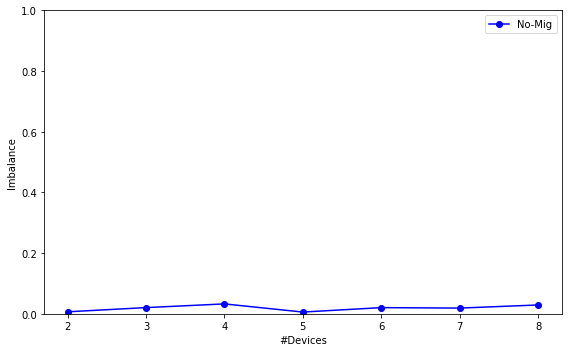

In [92]:
fig = plt.figure(figsize=(8, 5))
gs = GridSpec(nrows=1, ncols=1)


ax0 = fig.add_subplot(gs[0, 0])

rects1 = ax0.plot(devices, imb, linestyle='-', marker='o', color='blue', label='No-Mig')

ax0.set_ylabel('Imbalance')
ax0.set_xlabel('#Devices')
ax0.set_ylim([0, 1])
ax0.legend()

fig.tight_layout()
plt.savefig('Sparse_Imba_orig.jpeg')

# AxAT

In [93]:
devices = [2, 4, 6, 8]

In [94]:
aat_data_range = {
    'devices' : [2, 4, 6, 8],
    
    'mig_perf_min' : [2295.63319, 3723.198546, 3946.002643, 4776.733435], 
    'mig_perf_max' : [2339.76220, 4424.108752, 4767.888678, 5388.677258],
    'mig_perf_avg' : [2308.94889, 4124.117313, 4350.001374, 5104.516026],
    
    'nomig_perf_min' : [2219.075271, 3861.876948, 4040.48201, 4530.552954], 
    'nomig_perf_max' : [2264.662584, 4092.220482, 4266.48526, 5019.562659],
    'nomig_perf_avg' : [2232.314716, 3949.371301, 4174.17725, 4794.962525]
    
    

}

speedup_list = []
for mig, nomig in zip(aat_data_range['mig_perf_max'], aat_data_range['nomig_perf_max']):
        speedup = mig / nomig
        speedup_list.append(speedup)
print(speedup_list)     

[1.0331615034091983, 1.081102245458142, 1.1175214227741173, 1.0735352109487433]


In [95]:
print(aat_data_range['devices'])

[2, 4, 6, 8]


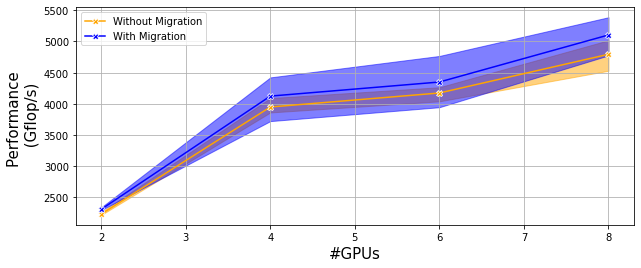

In [96]:
fig,ax = plt.subplots( figsize=(10, 4))


boxplot = sns.lineplot(data=aat_data_range, x="devices", y="nomig_perf_avg", ax=ax, marker="X", label='Without Migration', linestyle='-', color = 'orange')
ax.fill_between(devices, aat_data_range['nomig_perf_min'], aat_data_range['nomig_perf_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=aat_data_range, x="devices", y="mig_perf_avg", ax=ax, marker="X", label='With Migration', linestyle='-', color = 'blue')
ax.fill_between(devices, aat_data_range['mig_perf_min'], aat_data_range['mig_perf_max'], color = 'blue', alpha = 0.5)





ax.set_xlabel('#GPUs', fontsize=15)
ax.set_ylabel('Performance \n (Gflop/s)', fontsize=15)
ax.grid()

plt.legend(loc='upper left')

plt.savefig('SPARSE_GEMM_AAT_perf.jpeg', dpi=300)

In [97]:
dev_2 = [321550, 374500]
dev_3 = [238355, 300935, 156760]
dev_4 = [174395, 153210, 169730, 198715]
dev_5 = [170295, 165965, 130330, 142565, 86895]
dev_6 = [121900, 103185, 108515, 113725, 161830, 86895]
dev_7 = [113035, 94995, 82290, 90575, 104700, 91910, 118545]
dev_8 = [90825, 90445, 84135, 70405, 80970, 91240, 87075, 100955]


In [98]:
task_count = [dev_2, dev_3, dev_4, dev_5, dev_6, dev_7, dev_8]

In [99]:
imbalance = []
for l in task_count:
    std = np.std(l)
    mean = np.mean(l)
    imbalance.append(std/mean)
    

In [100]:
print(imbalance)

[0.07607212125565692, 0.2544196049402011, 0.09361340117390303, 0.21571899354409388, 0.1993121269080576, 0.12179300958766169, 0.09609106060489418]


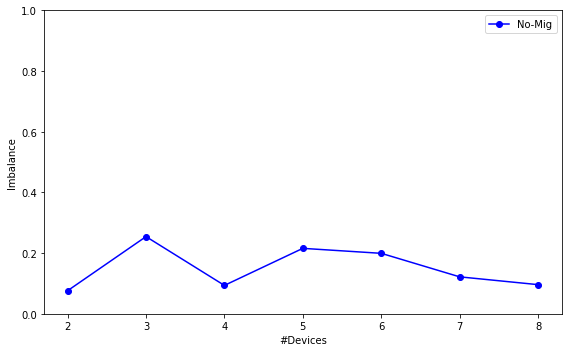

In [101]:
fig = plt.figure(figsize=(8, 5))
gs = GridSpec(nrows=1, ncols=1)


ax0 = fig.add_subplot(gs[0, 0])

devices = [2, 3, 4, 5, 6, 7, 8]
rects1 = ax0.plot(devices, imbalance, linestyle='-', marker='o', color='blue', label='No-Mig')

ax0.set_ylabel('Imbalance')
ax0.set_xlabel('#Devices')
ax0.set_ylim([0, 1])
ax0.legend()

fig.tight_layout()
plt.savefig('Sparse_Imb_aat.jpeg')

# no_advice

In [102]:
# existing parsec distribution

normal_dist_data_range = {
    'devices' : [2, 3, 4, 5, 6, 7, 8],
    
    'normal_dist_nomig_perf_min' : [1366.257199, 1923.948257, 2238.839483, 2192.70644, 2248.832322, 2356.495357, 2314.671887],
    'normal_dist_nomig_perf_max' : [1867.198575, 2417.470837, 3228.460167, 2963.31528, 3072.607298, 3077.290836, 2948.348486],
    'normal_dist_nomig_perf_avg' : [1625.362099, 2126.974198, 2603.370484, 2521.08149, 2617.044581, 2772.750741, 2687.302693],
    
    'normal_dist_mig_perf_min' : [1733.45011, 2179.513668, 2317.775625, 2349.5173, 2313.18237, 2469.100957, 2160.355249], 
    'normal_dist_mig_perf_max' : [2014.54262, 2747.356554, 3346.152228, 3105.3511, 3176.057416, 3164.310103, 3156.376531],
    'normal_dist_mig_perf_avg' : [1877.27056, 2435.962747, 2896.572780, 2797.5010, 2713.889557, 2704.333481, 2589.553976],
    
    
    
    

}

speedup_list = []
for mig, nomig in zip(normal_dist_data_range['normal_dist_mig_perf_avg'], normal_dist_data_range['normal_dist_nomig_perf_avg']):
        speedup = mig / nomig
        speedup_list.append(speedup)
print(speedup_list)     

[1.1549860558179534, 1.1452714138660183, 1.1126241147013018, 1.1096432269628858, 1.0370054743060564, 0.9753251314702291, 0.9636257138972026]


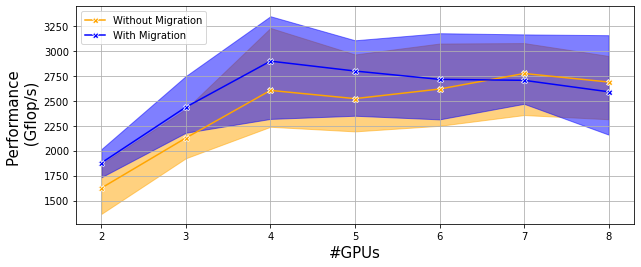

In [103]:
fig,ax = plt.subplots( figsize=(10, 4))


boxplot = sns.lineplot(data=normal_dist_data_range, x="devices", y="normal_dist_nomig_perf_avg", ax=ax, marker="X", label='Without Migration', linestyle='-', color = 'orange')
ax.fill_between(devices, normal_dist_data_range['normal_dist_nomig_perf_min'], normal_dist_data_range['normal_dist_nomig_perf_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=normal_dist_data_range, x="devices", y="normal_dist_mig_perf_avg", ax=ax, marker="X", label='With Migration', linestyle='-', color = 'blue')
ax.fill_between(devices, normal_dist_data_range['normal_dist_mig_perf_min'], normal_dist_data_range['normal_dist_mig_perf_max'], color = 'blue', alpha = 0.5)





ax.set_xlabel('#GPUs', fontsize=15)
ax.set_ylabel('Performance \n (Gflop/s)', fontsize=15)
ax.grid()

plt.legend(loc='upper left')

plt.savefig('SPARSE_GEMM_normal_dist_perf.jpeg', dpi=300)

In [104]:
# L shaped sitribution i introduices

skew_dist_data_range = {
    'devices' : [2, 3, 4, 5, 6, 7, 8],
    
    'skew_dist_nomig_perf_min' :  [121.175102, 172.252975, 165.984289, 184.184985, 216.146064, 226.018794, 235.817325],
    'skew_dist_nomig_perf_max' :  [150.726876, 221.121477, 283.522919, 316.198217, 331.782432, 358.500779, 360.690386],
    'skew_dist_nomig_perf_avg' : [137.497354, 198.847529, 221.964691, 260.7344979, 279.8984182, 274.988646, 306.044615],
    
    'skew_dist_mig_perf_min' : [129.929477, 187.644897, 175.788574, 208.737053, 249.268511, 259.159877, 242.456881], 
    'skew_dist_mig_perf_max' : [154.351959, 226.564039, 292.677422, 335.816058, 367.865434, 380.773444, 407.648403],
    'skew_dist_mig_perf_avg' : [143.697136, 210.889766, 236.305785, 271.976006, 321.422746, 315.3532437, 317.8885024],
    
    'skew_dist_nomig_with_advice_min' : [79.006139, 138.16195,   185.058955, 234.950544, 230.143469, 231.234735, 222.369834],
    'skew_dist_nomig_with_advice_max' : [ 94.667888, 159.362428,  235.927368, 297.367079, 322.126292, 336.722495, 320.653993],
    'skew_dist_nomig_with_advice_avg' : [ 91.612945, 154.3190997, 215.840499, 263.153500, 277.145535, 273.345186, 263.296506]

    
    
    
    
    
    

}

speedup_list = []
for mig, nomig in zip(skew_dist_data_range['skew_dist_mig_perf_avg'], skew_dist_data_range['skew_dist_nomig_perf_avg']):
        speedup = mig / nomig
        speedup_list.append(speedup)
print(speedup_list)     

[1.0450901913356092, 1.0605601541068181, 1.0646097986818994, 1.043114770736289, 1.1483549927400056, 1.1467864156835041, 1.038699871912466]


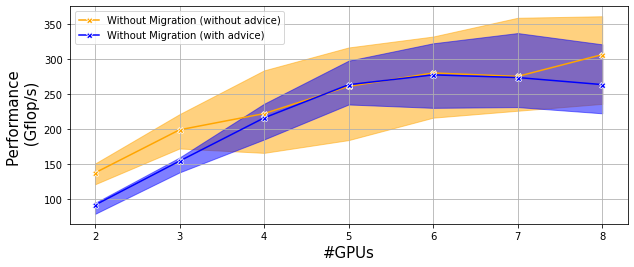

In [105]:
fig,ax = plt.subplots( figsize=(10, 4))


boxplot = sns.lineplot(data=skew_dist_data_range, x="devices", y="skew_dist_nomig_perf_avg", ax=ax, marker="X", label='Without Migration (without advice)', linestyle='-', color = 'orange')
ax.fill_between(devices, skew_dist_data_range['skew_dist_nomig_perf_min'], skew_dist_data_range['skew_dist_nomig_perf_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=skew_dist_data_range, x="devices", y="skew_dist_nomig_with_advice_avg", ax=ax, marker="X", label='Without Migration (with advice)', linestyle='-', color = 'blue')
ax.fill_between(devices, skew_dist_data_range['skew_dist_nomig_with_advice_min'], skew_dist_data_range['skew_dist_nomig_with_advice_max'], color = 'blue', alpha = 0.5)





ax.set_xlabel('#GPUs', fontsize=15)
ax.set_ylabel('Performance \n (Gflop/s)', fontsize=15)
ax.grid()

plt.legend(loc='upper left')

plt.savefig('SPARSE_GEMM_skew_nomig.jpeg', dpi=300)

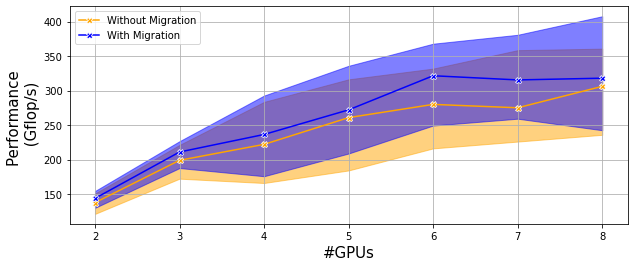

In [106]:
fig,ax = plt.subplots( figsize=(10, 4))


boxplot = sns.lineplot(data=skew_dist_data_range, x="devices", y="skew_dist_nomig_perf_avg", ax=ax, marker="X", label='Without Migration', linestyle='-', color = 'orange')
ax.fill_between(devices, skew_dist_data_range['skew_dist_nomig_perf_min'], skew_dist_data_range['skew_dist_nomig_perf_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=skew_dist_data_range, x="devices", y="skew_dist_mig_perf_avg", ax=ax, marker="X", label='With Migration', linestyle='-', color = 'blue')
ax.fill_between(devices, skew_dist_data_range['skew_dist_mig_perf_min'], skew_dist_data_range['skew_dist_mig_perf_max'], color = 'blue', alpha = 0.5)





ax.set_xlabel('#GPUs', fontsize=15)
ax.set_ylabel('Performance \n (Gflop/s)', fontsize=15)
ax.grid()

plt.legend(loc='upper left')

plt.savefig('SPARSE_GEMM_skew_dist_perf.jpeg', dpi=300)

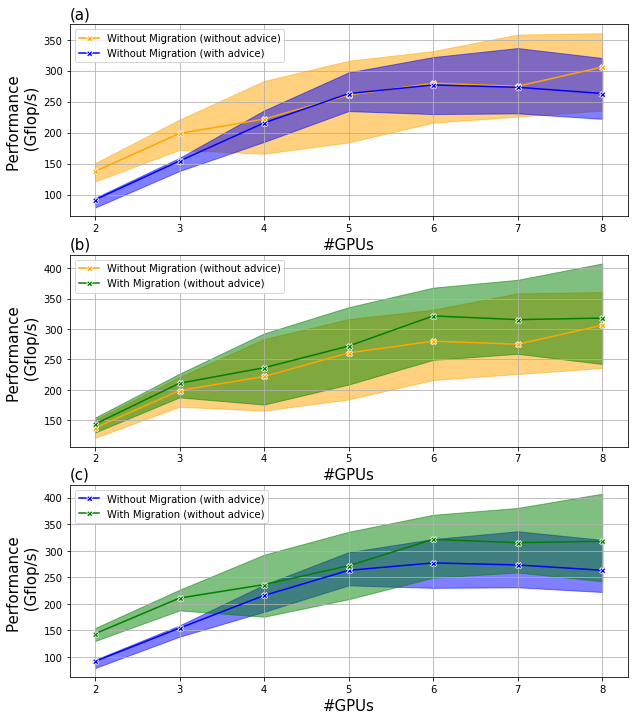

In [107]:

fig = plt.figure(figsize=(10, 12))
gs = GridSpec(nrows=3, ncols=1)


ax0 = fig.add_subplot(gs[0, 0])

boxplot = sns.lineplot(data=skew_dist_data_range, x="devices", y="skew_dist_nomig_perf_avg", ax=ax0, marker="X", label='Without Migration (without advice)', linestyle='-', color = 'orange')
ax0.fill_between(devices, skew_dist_data_range['skew_dist_nomig_perf_min'], skew_dist_data_range['skew_dist_nomig_perf_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=skew_dist_data_range, x="devices", y="skew_dist_nomig_with_advice_avg", ax=ax0, marker="X", label='Without Migration (with advice)', linestyle='-', color = 'blue')
ax0.fill_between(devices, skew_dist_data_range['skew_dist_nomig_with_advice_min'], skew_dist_data_range['skew_dist_nomig_with_advice_max'], color = 'blue', alpha = 0.5)

ax0.set_xlabel('#GPUs', fontsize=15)
ax0.set_ylabel('Performance \n (Gflop/s)', fontsize=15)
ax0.grid()
ax0.legend(loc='upper left')
ax0.set_title('(a)', fontsize=15, loc='left')


ax1 = fig.add_subplot(gs[1, 0])

boxplot = sns.lineplot(data=skew_dist_data_range, x="devices", y="skew_dist_nomig_perf_avg", ax=ax1, marker="X", label='Without Migration (without advice)', linestyle='-', color = 'orange')
ax1.fill_between(devices, skew_dist_data_range['skew_dist_nomig_perf_min'], skew_dist_data_range['skew_dist_nomig_perf_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=skew_dist_data_range, x="devices", y="skew_dist_mig_perf_avg", ax=ax1, marker="X", label='With Migration (without advice)', linestyle='-', color = 'green')
ax1.fill_between(devices, skew_dist_data_range['skew_dist_mig_perf_min'], skew_dist_data_range['skew_dist_mig_perf_max'], color = 'green', alpha = 0.5)

ax1.set_xlabel('#GPUs', fontsize=15)
ax1.set_ylabel('Performance \n (Gflop/s)', fontsize=15)
ax1.grid()
ax1.legend(loc='upper left')
ax1.set_title('(b)', fontsize=15, loc='left')





ax2 = fig.add_subplot(gs[2, 0])

boxplot = sns.lineplot(data=skew_dist_data_range, x="devices", y="skew_dist_nomig_with_advice_avg", ax=ax2, marker="X", label='Without Migration (with advice)', linestyle='-', color = 'blue')
ax2.fill_between(devices, skew_dist_data_range['skew_dist_nomig_with_advice_min'], skew_dist_data_range['skew_dist_nomig_with_advice_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=skew_dist_data_range, x="devices", y="skew_dist_mig_perf_avg", ax=ax2, marker="X", label='With Migration (without advice)', linestyle='-', color = 'green')
ax2.fill_between(devices, skew_dist_data_range['skew_dist_mig_perf_min'], skew_dist_data_range['skew_dist_mig_perf_max'], color = 'green', alpha = 0.5)

ax2.set_xlabel('#GPUs', fontsize=15)
ax2.set_ylabel('Performance \n (Gflop/s)', fontsize=15)
ax2.grid()
ax2.legend(loc='upper left')
ax2.set_title('(c)', fontsize=15, loc='left')




plt.savefig('SPARSE_GEMM_no_advice_comb.jpeg', dpi=300)

In [108]:
dev_2  = [19336, 19379]
dev_3  = [13161, 13041, 13044 ]
dev_4  = [10097, 9773, 9872, 9780]
dev_5  = [7961, 7860, 7962, 7949, 7961]
dev_6  = [6758, 6564, 6574, 6684, 6568, 6662]
dev_7  = [5636, 5645, 5645, 5837, 5851, 5639, 5638]
dev_8  = [5047, 5145, 4939, 4940, 4956, 5042, 4943, 4940]

In [109]:
mean_ = [  np.mean(dev_2), np.mean(dev_3), np.mean(dev_4), 
          np.mean(dev_5),np.mean(dev_6), np.mean(dev_7), np.mean(dev_8)]
device = [2, 3, 4, 5, 6, 7, 8]

print(mean_)




[19357.5, 13082.0, 9880.5, 7938.6, 6635.0, 5698.714285714285, 4994.0]


In [110]:
stddev = [ np.std(dev_2), np.std(dev_3), np.std(dev_4), 
          np.std(dev_5), np.std(dev_6), np.std(dev_7), np.std(dev_8)]

[0.0011106806147488054, 0.004271125223879833, 0.013254285009670042, 0.004987139803891957, 0.010922137740913735, 0.016146911561481892, 0.014302820527375708]


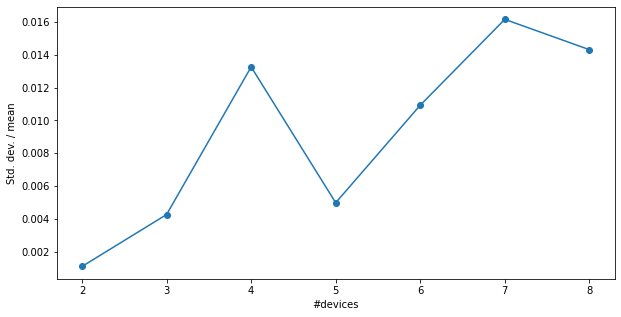

In [111]:
result = [a/b for a,b in zip(stddev,mean_)]
print(result)

fig,ax = plt.subplots( figsize=(10, 5))

ax.plot(device, result, marker='o')

ax.set_xlabel('#devices')
ax.set_ylabel('Std. dev. / mean')
ax.set_title('')
plt.savefig('Sparse_GEMM_imbalance_stddev.jpeg')

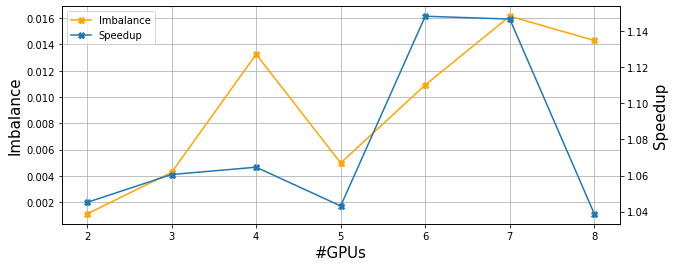

In [112]:
fig,ax = plt.subplots(1, 1, figsize=(10, 4))


lns1 = ax.plot(device, result, marker="X", color='orange', label='Imbalance')

ax.set_xlabel('#GPUs', fontsize=15)
#ax.set_ylabel('Overall Imbalance \n (Std.dev / Mean)')
ax.set_ylabel('Imbalance', fontsize=15)
ax.set_title('')

ax2 = ax.twinx()

lns2 = ax2.plot(device, speedup_list, marker="X", label='Speedup')

ax2.set_ylabel('Speedup', fontsize=15)

#ax.figure.legend()
#plt.legend(loc='upper right')
ax.grid()

#ax2.legend(loc=0)
#ax.legend(loc=3)
#plt.tight_layout()

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)



#plt.savefig('SPARSE_GEMM_combined_speedup_imb.jpeg', dpi=300)


# Sinlge GPU

In [113]:
# task only mapped to a single GPU and then migrated.

In [114]:
single_GPU_data_range = {
    'devices' : [2, 3, 4, 5, 6, 7, 8],
    

    'single_GPU_mig_perf_min' : [144.737538, 199.130241, 186.165309, 198.051342, 208.020017, 196.419266, 190.055614], 
    'single_GPU_mig_perf_max' : [176.306342, 223.585593, 234.506762, 236.928762, 231.814921, 226.317854, 232.356586],
    'single_GPU_mig_perf_avg' : [158.372643, 209.297811, 214.942661, 214.221919, 219.257096, 217.483594, 215.805991],
    
    'single_GPU_baseline_min' : [144.737538, 144.737538, 144.737538, 144.737538, 144.737538, 144.737538, 144.737538], 
    'single_GPU_baseline_max' : [176.306342, 176.306342, 176.306342, 176.306342, 176.306342, 176.306342, 176.306342],
    'single_GPU_baseline_avg' : [158.372643, 158.372643, 158.372643, 158.372643, 158.372643, 158.372643, 158.372643],


    
    
    
    

}

speedup_list = []
for mig, nomig in zip(skew_dist_data_range['skew_dist_mig_perf_avg'], skew_dist_data_range['skew_dist_nomig_perf_avg']):
        speedup = mig / nomig
        speedup_list.append(speedup)
print(speedup_list)     

[1.0450901913356092, 1.0605601541068181, 1.0646097986818994, 1.043114770736289, 1.1483549927400056, 1.1467864156835041, 1.038699871912466]


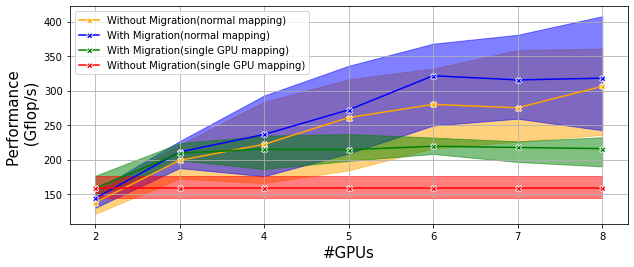

In [115]:
fig,ax = plt.subplots( figsize=(10, 4))


boxplot = sns.lineplot(data=skew_dist_data_range, x="devices", y="skew_dist_nomig_perf_avg", ax=ax, marker="X", label='Without Migration(normal mapping)', linestyle='-', color = 'orange')
ax.fill_between(devices, skew_dist_data_range['skew_dist_nomig_perf_min'], skew_dist_data_range['skew_dist_nomig_perf_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=skew_dist_data_range, x="devices", y="skew_dist_mig_perf_avg", ax=ax, marker="X", label='With Migration(normal mapping)', linestyle='-', color = 'blue')
ax.fill_between(devices, skew_dist_data_range['skew_dist_mig_perf_min'], skew_dist_data_range['skew_dist_mig_perf_max'], color = 'blue', alpha = 0.5)


boxplot = sns.lineplot(data=single_GPU_data_range, x="devices", y="single_GPU_mig_perf_avg", ax=ax, marker="X", label='With Migration(single GPU mapping)', linestyle='-', color = 'green')
ax.fill_between(devices, single_GPU_data_range['single_GPU_mig_perf_min'], single_GPU_data_range['single_GPU_mig_perf_max'], color = 'green', alpha = 0.5)

boxplot = sns.lineplot(data=single_GPU_data_range, x="devices", y="single_GPU_baseline_avg", ax=ax, marker="X", label='Without Migration(single GPU mapping)', linestyle='-', color = 'red')
ax.fill_between(devices, single_GPU_data_range['single_GPU_baseline_min'], single_GPU_data_range['single_GPU_baseline_max'], color = 'red', alpha = 0.5)






ax.set_xlabel('#GPUs', fontsize=15)
ax.set_ylabel('Performance \n (Gflop/s)', fontsize=15)
ax.grid()

plt.legend(loc='upper left')

plt.savefig('SPARSE_GEMM_single_GPU_perf.jpeg', dpi=300)

# No load balancing in parsec

In [116]:
no_load_bal_data_range = {
    'devices' : [2, 3, 4, 5, 6, 7, 8],
    

    'no_load_bal_mig_perf_min' : [90.721176, 103.218029, 108.111918, 114.175372, 119.570079, 124.763329, 121.022741], 
    'no_load_bal_mig_perf_max' : [94.963887, 125.585447, 143.839854, 154.080609, 163.860576, 171.651206, 172.402521],
    'no_load_bal_mig_perf_avg' : [93.956597, 118.507582, 130.152226, 137.173928, 135.021203, 157.468161, 152.852411],
    
    'no_load_bal_nomig_perf_min' : [145.692247, 207.765757, 205.857959, 218.935293, 206.189172, 208.435569, 225.694954], 
    'no_load_bal_nomig_perf_max' : [177.398295, 223.36642 , 250.507489, 279.749651, 273.227169, 336.474717, 293.483308],
    'no_load_bal_nomig_perf_avg' : [160.753286, 214.817073, 218.258005, 241.732254, 256.451526, 251.732023, 252.101118],


}

    

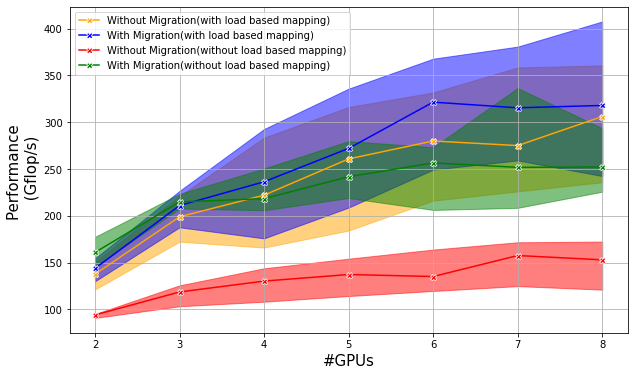

In [117]:
fig,ax = plt.subplots( figsize=(10, 6))


boxplot = sns.lineplot(data=skew_dist_data_range, x="devices", y="skew_dist_nomig_perf_avg", ax=ax, marker="X", label='Without Migration(with load based mapping)', linestyle='-', color = 'orange')
ax.fill_between(devices, skew_dist_data_range['skew_dist_nomig_perf_min'], skew_dist_data_range['skew_dist_nomig_perf_max'], color = 'orange', alpha = 0.5)

boxplot = sns.lineplot(data=skew_dist_data_range, x="devices", y="skew_dist_mig_perf_avg", ax=ax, marker="X", label='With Migration(with load based mapping)', linestyle='-', color = 'blue')
ax.fill_between(devices, skew_dist_data_range['skew_dist_mig_perf_min'], skew_dist_data_range['skew_dist_mig_perf_max'], color = 'blue', alpha = 0.5)

boxplot = sns.lineplot(data=no_load_bal_data_range, x="devices", y="no_load_bal_mig_perf_avg", ax=ax, marker="X", label='Without Migration(without load based mapping)', linestyle='-', color = 'red')
ax.fill_between(devices, no_load_bal_data_range['no_load_bal_mig_perf_min'], no_load_bal_data_range['no_load_bal_mig_perf_max'], color = 'red', alpha = 0.5)


boxplot = sns.lineplot(data=no_load_bal_data_range, x="devices", y="no_load_bal_nomig_perf_avg", ax=ax, marker="X", label='With Migration(without load based mapping)', linestyle='-', color = 'green')
ax.fill_between(devices, no_load_bal_data_range['no_load_bal_nomig_perf_min'], no_load_bal_data_range['no_load_bal_nomig_perf_max'], color = 'green', alpha = 0.5)




ax.set_xlabel('#GPUs', fontsize=15)
ax.set_ylabel('Performance \n (Gflop/s)', fontsize=15)
ax.grid()

plt.legend(loc='upper left')

plt.savefig('SPARSE_GEMM_no_load_perf.jpeg', dpi=300)